In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path = ["../"] + sys.path

print(sys.path)

%autoreload 2
from pIMZ.regions import SpectraRegion, ProteinWeights
%autoreload 2
from pIMZ.imzml import IMZMLExtract
%autoreload 2
from pIMZ.comparative import CombinedSpectra

import pIMZ

print(pIMZ.__file__)



['../', '/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/mjoppich/.local/lib/python3.8/site-packages', '/home/mjoppich/.local/lib/python3.8/site-packages/pIMZ-1.0-py3.8-linux-x86_64.egg', '/home/mjoppich/.local/lib/python3.8/site-packages/progressbar-2.5-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython']
../pIMZ/__init__.py


In [2]:
loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

Load an imzML file

In [3]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")

Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML
0 356 400 215 273
1 436 478 632 687
2 1572 1612 608 666
3 1149 1197 142 205
4 618 666 211 266
5 633 684 630 688
6 1357 1400 628 686


Explore which regions are there?

0 ((356, 400, 215, 273), 2655)
1 ((436, 478, 632, 687), 2408)
2 ((1572, 1612, 608, 666), 2419)
3 ((1149, 1197, 142, 205), 3136)
4 ((618, 666, 211, 266), 2744)
5 ((633, 684, 630, 688), 3068)
6 ((1357, 1400, 628, 686), 2596)


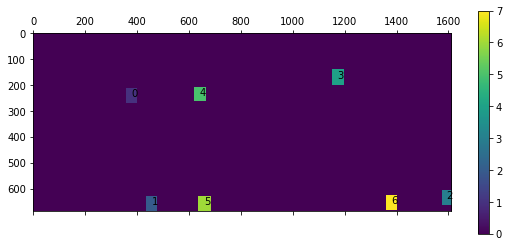

{0: ((356, 400, 215, 273), 2655),
 1: ((436, 478, 632, 687), 2408),
 2: ((1572, 1612, 608, 666), 2419),
 3: ((1149, 1197, 142, 205), 3136),
 4: ((618, 666, 211, 266), 2744),
 5: ((633, 684, 630, 688), 3068),
 6: ((1357, 1400, 628, 686), 2596)}

In [4]:
imze.list_regions()

Start with prozessing the first region , region 0

In [5]:
spectra0_orig = imze.get_region_array(0, makeNullLine=True)
spectra0_intra = imze.normalize_region_array(spectra0_orig, normalize="intra_median")
spectra0 = imze.normalize_region_array(spectra0_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 0 with shape (45, 59, 17900)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.14000733569264412
100% |########################################################################|
Got 2655 median-enabled pixels
5-Number stats for medians: (2655, 2655, 0.2905536462232088, 0.5712127712945096, 0.6654297160132764, 0.7571640240536153, 1.119313296797138)
Started Log Value: 0.21725614592432976
100% |########################################################################|
Got a total of 47524500 fold changes
Median elements [23762250]
Median elements
Global Median 0.64579


In [6]:
spectra1_orig = imze.get_region_array(1, makeNullLine=True)
spectra1_intra = imze.normalize_region_array(spectra1_orig, normalize="intra_median")
spectra1 = imze.normalize_region_array(spectra1_intra, normalize="inter_median")

Fetching region range
Fetching region shape
Found region 1 with shape (43, 56, 17900)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.17063884288072587
100% |########################################################################|
Got 2408 median-enabled pixels
5-Number stats for medians: (2408, 2408, 0.3039763115205163, 0.5889737648019792, 0.6580512343895084, 0.7246390240951075, 1.0161616910876121)
Started Log Value: 0.2648863598704338
100% |########################################################################|
Got a total of 43103200 fold changes
Median elements [21551600]
Median elements
Global Median 0.64556


Started Log Value: 0.14000733569264412
Pixel (5, 30): (17900, 17378, 0.0, 0.3000152855836411, 0.5135824924264395, 0.7344595654119753, 2.2611690493488)
Pixel (10, 30): (17900, 17415, 0.0, 0.39868049486880436, 0.6664889512482384, 0.9484701114184119, 3.3750518583494378)
Pixel (20, 30): (17900, 17383, 0.0, 0.30503601128090446, 0.5314185949485604, 0.7923220497239329, 6.235906349286949)
Pixel (25, 30): (17900, 17428, 0.0, 0.3950999459189633, 0.6885953705312867, 1.0240869960679142, 9.995899992013957)
Pixel (35, 30): (17900, 17418, 0.0, 0.4646819976734369, 0.7766157701380663, 1.1079077863432891, 3.830067904466957)
Pixel (40, 30): (17900, 17481, 0.0, 0.46623002417433723, 0.7784697915953906, 1.1195665739896818, 2.987418624579341)


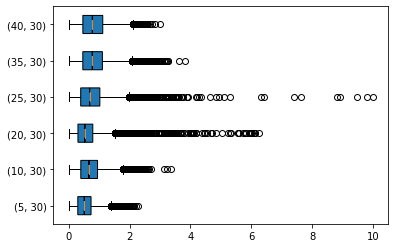

In [7]:
imze.plot_fcs(spectra0_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.21725614592432976
Pixel (5, 30): (17900, 17378, 0.0, 0.37675724844892067, 0.6453180876809363, 0.9261143633247905, 2.831509828912601)
Pixel (10, 30): (17900, 17415, 0.0, 0.3856033876806081, 0.6457432895466224, 0.9189111654645739, 3.336080855033527)
Pixel (20, 30): (17900, 17383, 0.0, 0.3701320966161331, 0.6460637676616463, 0.9644029829947063, 7.795461219782701)
Pixel (25, 30): (17900, 17428, 0.0, 0.37031708224993964, 0.6447782875497908, 0.9626202807074953, 9.664760037736253)
Pixel (35, 30): (17900, 17418, 0.0, 0.38559963415332804, 0.6451473899885882, 0.9213887462593586, 3.263557276825085)
Pixel (40, 30): (17900, 17481, 0.0, 0.3861231456557213, 0.6451822294317222, 0.9298251075901888, 2.45048607225067)


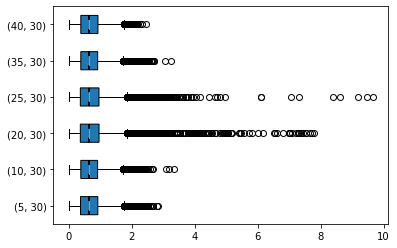

In [8]:
imze.plot_fcs(spectra0_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.3364191856862599


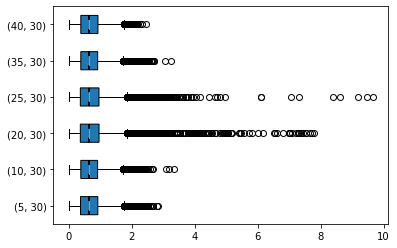

In [9]:
imze.plot_fcs(spectra0, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.17063884288072587


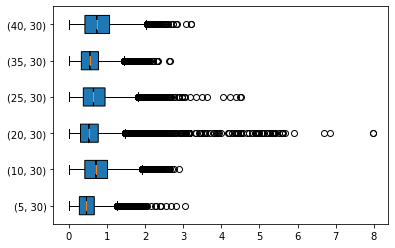

In [10]:
imze.plot_fcs(spectra1_orig, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

Started Log Value: 0.2648863598704338


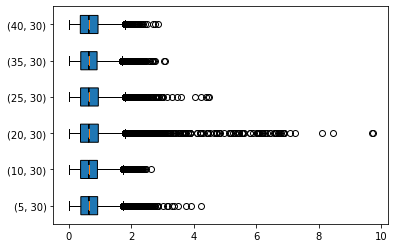

In [11]:
imze.plot_fcs(spectra1_intra, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

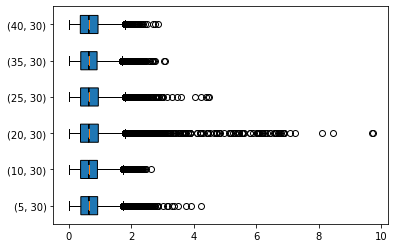

In [120]:
imze.plot_fcs(spectra1, [(5,30),(10,30),(20,30),(25,30),(35,30),(40,30)])

We can now ensure that the normalized spectra are indeed comparable.

Where are the highest peaks? This may give a hint on whether or not a normalization by max intensity would also have worked. => here: most probably yes!

3454.87441091502 39
3456.383544128344 278
3457.8926773416683 2332
4965.516757452595 2
14980.124761072322 2
14981.633894285647 2


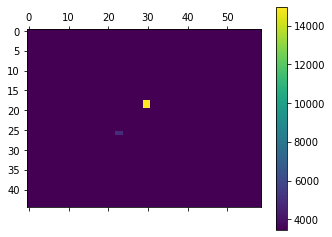

2655 45.060471276429595 282.8224196423905 133.18045036950951


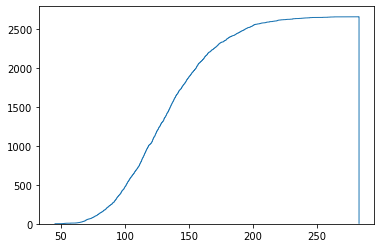

In [13]:
imze.list_highest_peaks(spectra0, counter=True)

Let's plot the norm of each spectrum

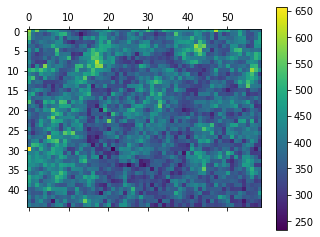

In [14]:
imze.plot_tnc(spectra0)

It can be seen that the norm of the spectra differs. However, given that intensities should be comparable, and that there was sample everywhere => just continue

In [15]:
spec = SpectraRegion(spectra0, imze.mzValues)

In [16]:
spec.calculate_similarity(mode="spectra_log")

2020-12-08 11:46:58,428  SpectraRegion  INFO: dimensions inputarray: 17900
2020-12-08 11:46:58,429  SpectraRegion  INFO: Creating C++ obj
2020-12-08 11:46:58,429  SpectraRegion  INFO: 17900 (45, 59, 17900)
2020-12-08 11:46:58,430  SpectraRegion  INFO: dimensions 17900
2020-12-08 11:46:58,430  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-12-08 11:46:58,431  SpectraRegion  INFO: Switching to dot mode
2020-12-08 11:46:58,486  SpectraRegion  INFO: Starting calc similarity c++
2020-12-08 11:47:06,888  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-12-08 11:47:06,889  SpectraRegion  INFO: Calculating spectra similarity
2020-12-08 11:47:06,922  SpectraRegion  INFO: Calculating spectra similarity done


array([[1.        , 0.97618073, 0.9691782 , ..., 0.83840245, 0.8406169 ,
        0.85142994],
       [0.97618073, 1.        , 0.98342717, ..., 0.88986284, 0.8919327 ,
        0.90145195],
       [0.9691782 , 0.98342717, 1.        , ..., 0.90628433, 0.9039524 ,
        0.91665334],
       ...,
       [0.83840245, 0.88986284, 0.90628433, ..., 1.        , 0.9589327 ,
        0.96420807],
       [0.8406169 , 0.8919327 , 0.9039524 , ..., 0.9589327 , 1.        ,
        0.9649949 ],
       [0.85142994, 0.90145195, 0.91665334, ..., 0.96420807, 0.9649949 ,
        1.        ]], dtype=float32)

There are various (unsupervised) clustering techniques. Like UMAP+HDBSCAN

In [17]:
spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=1000)

2020-12-08 11:47:06,946  SpectraRegion  INFO: Calculating clusters
2020-12-08 11:47:06,947  SpectraRegion  INFO: Elem Matrix of shape: (2655, 17900)
2020-12-08 11:47:07,031  SpectraRegion  INFO: UMAP reduction
2020-12-08 11:47:30,625  SpectraRegion  INFO: HDBSCAN reduction
2020-12-08 11:47:30,625  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (1000, 2)
2020-12-08 11:47:30,649  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-12-08 11:47:30,943  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 22)
2020-12-08 11:47:30,944  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 22)
2020-12-08 11:47:30,945  SpectraRegion  INFO: HDBSCAN Labeling
2020-12-08 11:47:30,950  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-12-08 11:47:30,950  SpectraRegion  INFO: Cluster Reduction
2020-12-08 11:47:30,951  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 11:47:30,977  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 11:47:30

[[9.59784896e-01 1.04341410e-19 3.85717126e-20 ... 6.79489272e-20
  6.83371386e-20 6.43617176e-20]
 [9.99999996e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.60455929e-01 4.40528144e-02 1.65898939e-02 ... 2.98110504e-02
  2.97504451e-02 2.78718698e-02]
 ...
 [5.70740411e-10 6.49911632e-09 4.37473431e-09 ... 5.03893583e-02
  6.29723704e-02 7.56736913e-02]
 [1.00498333e-27 1.13672907e-26 7.93517276e-27 ... 8.86951673e-20
  1.09369400e-19 1.32308622e-19]
 [1.16269932e-13 8.22354028e-12 4.75778349e-12 ... 5.18725023e-02
  6.61122376e-02 8.07358834e-02]]


array([[15, 15, 15, ..., 12, 12, 13],
       [15, 15, 14, ..., 10, 10,  8],
       [15, 15, 14, ..., 10, 12,  8],
       ...,
       [15, 14, 14, ..., 10, 10,  9],
       [15, 14, 14, ..., 10, 10, 10],
       [15, 14, 14, ..., 13, 10, 10]], dtype=int16)

In [18]:
spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=9, num_samples=500)

2020-12-08 11:47:31,073  SpectraRegion  INFO: HDBSCAN reduction
2020-12-08 11:47:31,074  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (500, 2)
2020-12-08 11:47:31,085  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (2655, 2)
2020-12-08 11:47:31,390  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (2655, 11)
2020-12-08 11:47:31,390  SpectraRegion  INFO: HDBSCAN Soft Clusters: (2655, 11)
2020-12-08 11:47:31,391  SpectraRegion  INFO: HDBSCAN Labeling


[[0.03402914 0.09324846 0.03327541 ... 0.05903353 0.04837559 0.05248047]
 [0.03722097 0.10540587 0.03635643 ... 0.0645923  0.05290735 0.05748424]
 [0.03448738 0.09150899 0.0337739  ... 0.06049223 0.04933135 0.05348599]
 ...
 [0.01223096 0.02041379 0.01422619 ... 0.09987608 0.09425508 0.10768559]
 [0.01126438 0.01810089 0.01303995 ... 0.08774332 0.0849287  0.0954383 ]
 [0.01435649 0.06282879 0.0422578  ... 0.08547541 0.07904288 0.09258118]]


In [19]:
len(spec.dimred_labels)

2655

2020-12-08 11:47:31,456  SpectraRegion  INFO: Pixels    : 2655
2020-12-08 11:47:31,457  SpectraRegion  INFO: Unassigned: 0


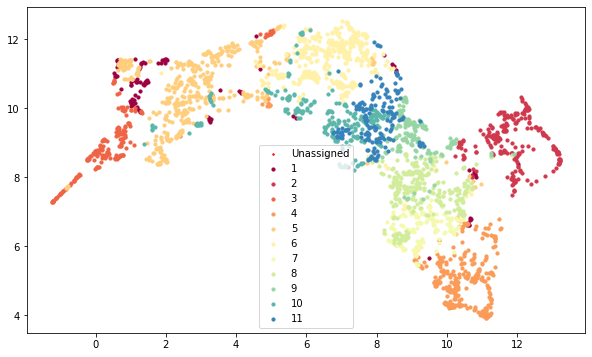

In [20]:
mpl.rcParams['figure.figsize'] = (10,6)
spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

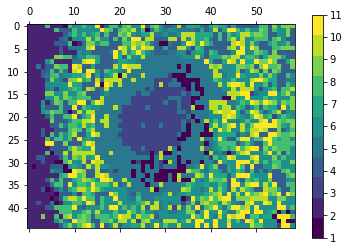

In [21]:
spec.plot_segments()

In [22]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-12-08 11:47:31,768  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 6, 8, 9, 11}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

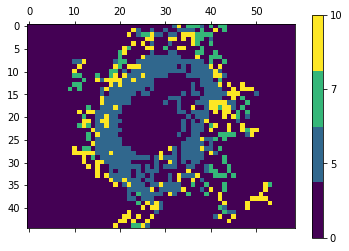

In [23]:
spec.plot_segments()

Which may or may not work well - more robustly, and maybe faster is a classic clustering of the similarity scores:

In [24]:
spec.segment(method="WARD", number_of_regions=15)

2020-12-08 11:47:31,894  SpectraRegion  INFO: Calculating clusters
2020-12-08 11:47:31,997  SpectraRegion  INFO: Calculating clusters done
2020-12-08 11:47:32,011  SpectraRegion  INFO: Calculating clusters saved


array([[6, 6, 6, ..., 2, 2, 4],
       [6, 6, 7, ..., 2, 4, 4],
       [6, 6, 7, ..., 1, 4, 4],
       ...,
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 6, ..., 4, 4, 4],
       [6, 6, 7, ..., 4, 4, 4]], dtype=int16)

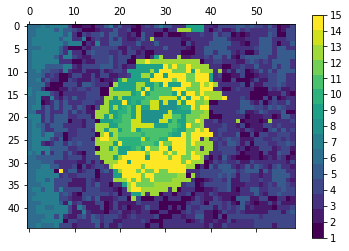

In [25]:
spec.plot_segments()

In [26]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')
spec.filter_clusters(method='remove_islands')

2020-12-08 11:47:32,160  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

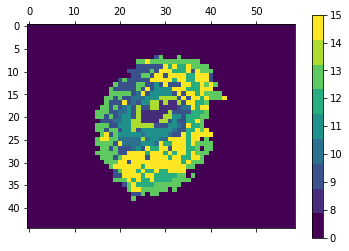

In [27]:
spec.plot_segments()

A manual curation of the segmentation is still possible!

In [28]:
spec.segmented[0:6,] = 0

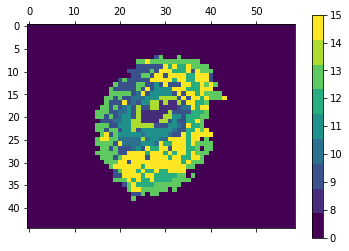

In [29]:
spec.plot_segments()

In [30]:
help(np.save)

Help on function save in module numpy:

save(file, arr, allow_pickle=True, fix_imports=True)
    Save an array to a binary file in NumPy ``.npy`` format.
    
    Parameters
    ----------
    file : file, str, or pathlib.Path
        File or filename to which the data is saved.  If file is a file-object,
        then the filename is unchanged.  If file is a string or Path, a ``.npy``
        extension will be appended to the filename if it does not already
        have one.
    arr : array_like
        Array data to be saved.
    allow_pickle : bool, optional
        Allow saving object arrays using Python pickles. Reasons for disallowing
        pickles include security (loading pickled data can execute arbitrary
        code) and portability (pickled objects may not be loadable on different
        Python installations, for example if the stored objects require libraries
        that are not available, and not all pickled data is compatible between
        Python 2 and Python 3).
  

In [31]:
with open("slided_0.spectra.npy", 'wb') as f:
    np.save(f, spectra0)
    
with open("slided_0.mzval.npy", 'wb') as f:
    np.save(f, imze.mzValues)
    
with open("slided_0.segments.npy", 'wb') as f:
    np.save(f, spec.segmented)

In [32]:
with open('slided_0.spectra.npy', 'rb') as f:
    spectra0 = np.load(f)
    
with open('slided_0.mzval.npy', 'rb') as f:
    mzValues = np.load(f)
    
with open('slided_0.segments.npy', 'rb') as f:
    segmented = np.load(f)

Consensus Analysis

In [33]:
spec.consensus_spectra()

2020-12-08 11:47:34,564  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 11:47:34,592  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 11:47:34,593  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.67580456, 0.67580456, 0.67580456, ..., 0.28381686, 0.28381686,
        0.28381686]),
 9: array([0.65775871, 0.65775871, 0.65775871, ..., 0.3040875 , 0.3040875 ,
        0.3040875 ]),
 13: array([0.57613317, 0.57613317, 0.57613317, ..., 0.32186837, 0.32186837,
        0.32186837]),
 15: array([0.59695091, 0.59695091, 0.59695091, ..., 0.31012577, 0.31012577,
        0.31012577]),
 12: array([0.75340538, 0.75340538, 0.75340538, ..., 0.28799026, 0.28799026,
        0.28799026]),
 11: array([1.03077652, 1.03077652, 1.03077652, ..., 0.27485947, 0.27485947,
        0.27485947]),
 10: array([0.64412435, 0.64412435, 0.64412435, ..., 0.26182433, 0.26182433,
        0.26182433]),
 14: array([0.79604846, 0.79604846, 0.79604846, ..., 0.22558753, 0.22558753,
        0.22558753]),
 8: array([0.92792216, 0.92792216, 0.92792216, ..., 0.25138255, 0.25138255,
        0.25138255])}

In [34]:
spec.consensus_similarity()

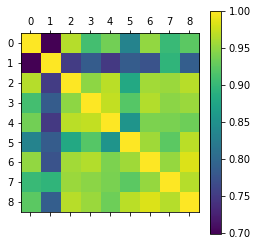

In [35]:
spec.plot_consensus_similarity()

2020-12-08 11:47:34,792  SpectraRegion  INFO: Found clusterLabels [0, 8, 9, 10, 11, 12, 13, 14, 15]
2020-12-08 11:47:34,793  SpectraRegion  INFO: Processing clusterLabel 0
2020-12-08 11:47:35,339  SpectraRegion  INFO: Processing clusterLabel 8
2020-12-08 11:47:35,339  SpectraRegion  INFO: Processing clusterLabel 9
2020-12-08 11:47:35,342  SpectraRegion  INFO: Processing clusterLabel 10
2020-12-08 11:47:35,342  SpectraRegion  INFO: Processing clusterLabel 11
2020-12-08 11:47:35,343  SpectraRegion  INFO: Processing clusterLabel 12
2020-12-08 11:47:35,344  SpectraRegion  INFO: Processing clusterLabel 13
2020-12-08 11:47:35,347  SpectraRegion  INFO: Processing clusterLabel 14
2020-12-08 11:47:35,348  SpectraRegion  INFO: Processing clusterLabel 15


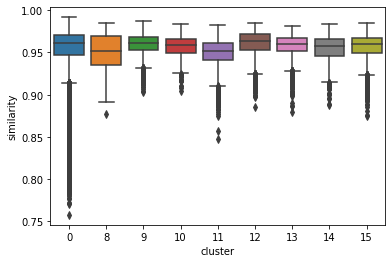

In [36]:
spec.plot_consensus_similarity(mode="spectra")

All clusters hare a 95% similarity in median. Cluster 0 (background) is the most heterogeneous one.

In [37]:
#spec.plot_inter_consensus_similarity()

2020-12-08 11:47:36,456  SpectraRegion  INFO: Processing Mass 12478 with best existing mass 12477.981893380715


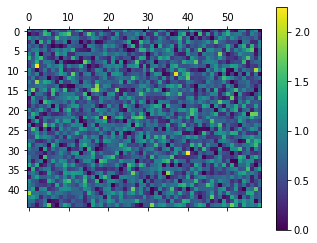

array([[0.89098611, 0.42600214, 0.63789896, ..., 0.84346678, 1.08623662,
        0.03814456],
       [0.        , 0.30615459, 0.20707593, ..., 0.98815546, 0.76648459,
        0.39656919],
       [1.14467647, 0.76193964, 0.86135823, ..., 0.49728898, 0.78187405,
        0.28662613],
       ...,
       [1.08764609, 1.26740949, 0.95459563, ..., 1.08937334, 0.59542704,
        0.6711442 ],
       [0.82855809, 0.81543693, 0.37041644, ..., 1.1150713 , 0.0438142 ,
        0.63432558],
       [0.68790783, 0.48452746, 0.14090304, ..., 1.03100806, 0.84850002,
        1.37623054]])

In [38]:
spec.mass_heatmap(12478)
#dfobj = spec.mass_dabest(12476)

2020-12-08 11:47:36,586  SpectraRegion  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


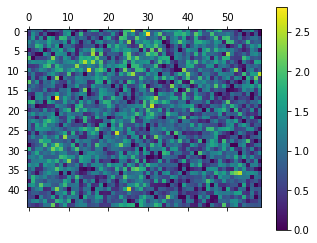

2020-12-08 11:47:36,689  SpectraRegion  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


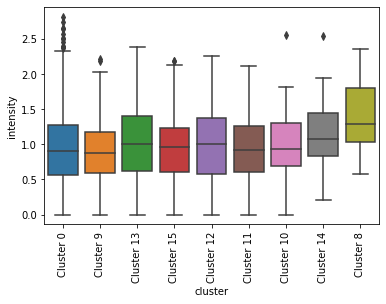

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


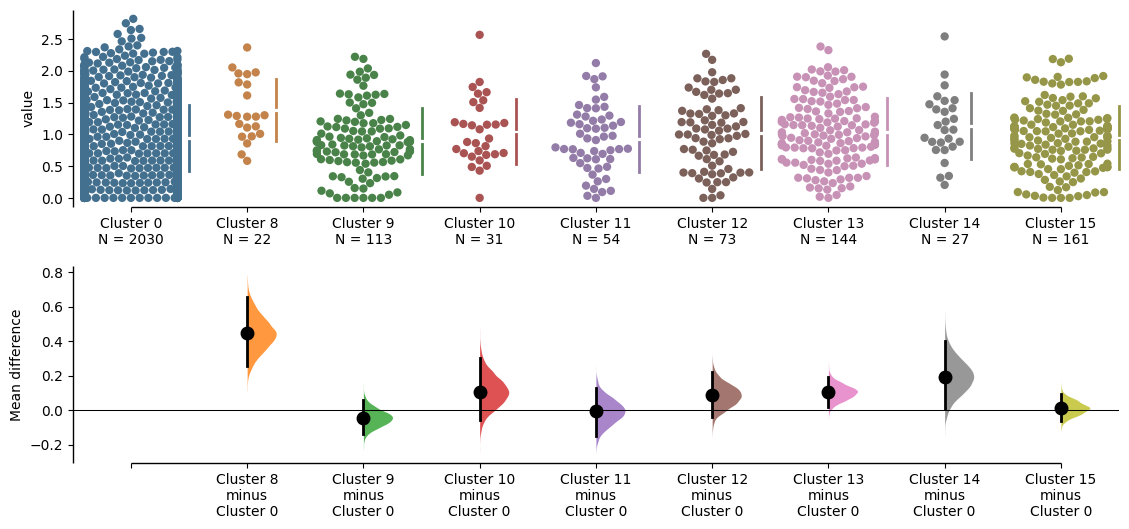

In [39]:
spec.mass_heatmap(14195)
dfobj = spec.mass_dabest(14195)

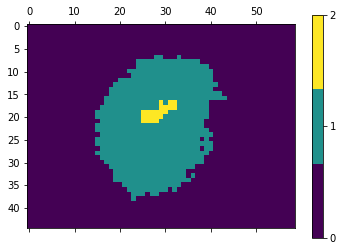

In [40]:
spec.plot_segments(highlight=[8])

# Differential Analysis

One of the stand-alone features of pyIMS is the integration with differential expression analysis. Here several key-features are presented.

First, single masses are looked at:

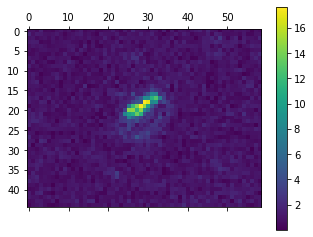

array([[0.82385149, 0.86264522, 0.49721109, ..., 0.24492729, 0.86041828,
        0.65921243],
       [1.87043287, 0.78807366, 1.3411693 , ..., 0.4120491 , 0.9107944 ,
        1.00745731],
       [0.95879405, 1.16647921, 0.54069431, ..., 0.90882606, 0.74983204,
        1.82300519],
       ...,
       [1.20795686, 0.93115886, 0.90644756, ..., 0.73014098, 1.17134226,
        1.13743474],
       [0.62210889, 0.69715361, 1.27652689, ..., 1.65667113, 0.7134432 ,
        1.15874405],
       [0.26637443, 0.77544398, 1.02433959, ..., 0.29809782, 0.75653545,
        1.09764161]])

In [41]:
spec.mass_heatmap(14954, min_cut_off=0.0025)

The mass with m/z-value 14954 apparently is most active within the aorta structure (center of the image). Is this specific to a specific cluster

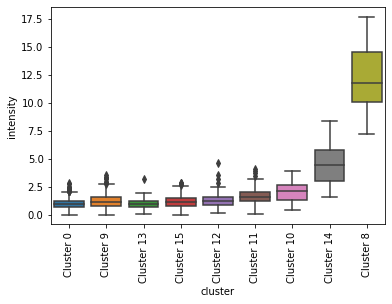

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


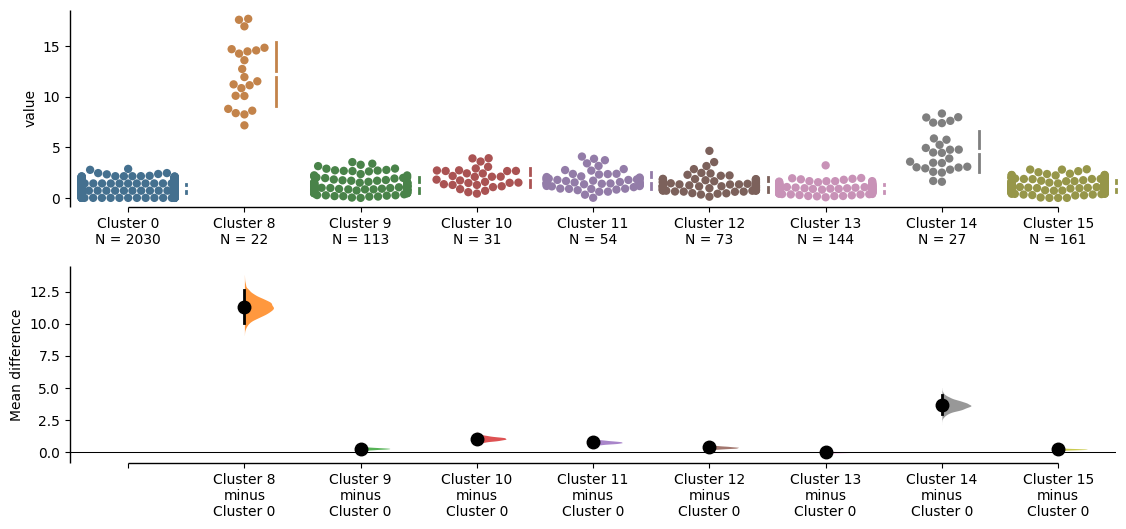

In [42]:
dfobj = spec.mass_dabest(14954)

The DABEST-Plot also clearly reveals that in contrast to the background, cluster 8 intensity values for this mass are quite higher than for all other clusters.

Abviously this mass is most intense in Cluster 8, but also cluster 14. We can now take a look at this mass by setting cluster 14 as reference cluster

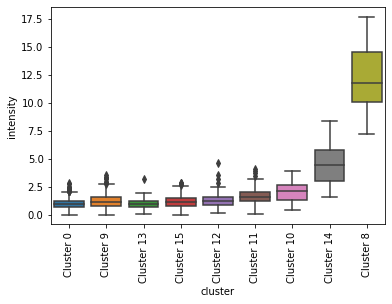

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


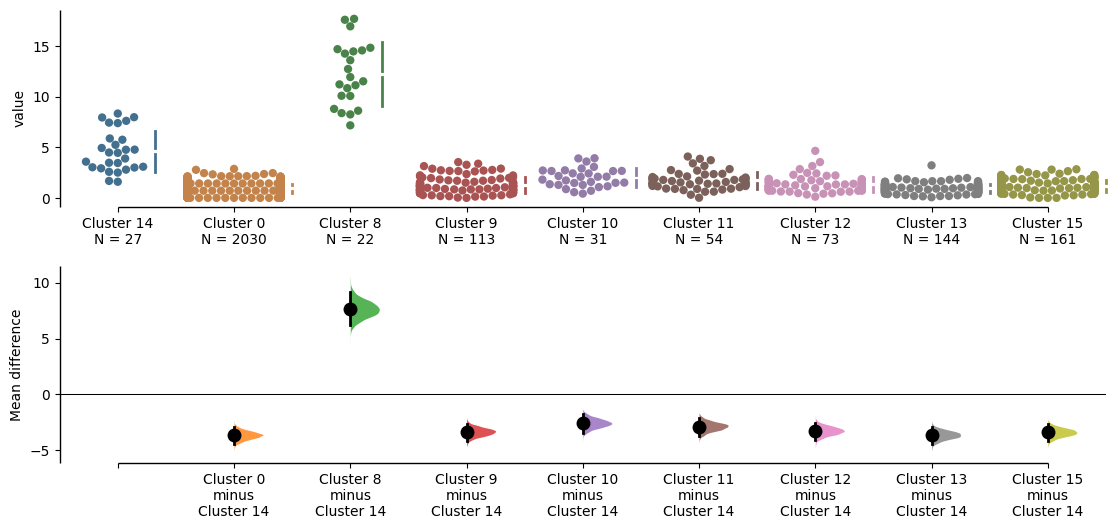

In [43]:
spec.mass_dabest(14954, background=14)

Not knowing where this cluster 8 is, we can highlight it specifically:

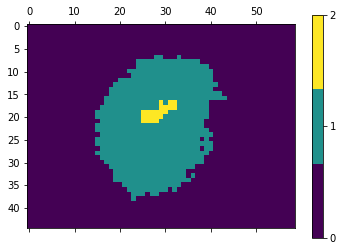

In [44]:
spec.plot_segments(highlight=8)

Or together with cluster 14, where this mass is also prevalent.

On a sidenote: background is set to 0, other regions == 1, and the target region is set to 2

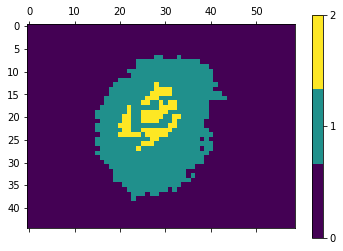

In [45]:
spec.plot_segments(highlight=[8,11])

Just for the sake of clarity: we now remove all differential expression results!

In [46]:
spec.clear_de_results()

## Protein m/z to name

For any combination of sequencing results with these IMS analyses, knowing which protein was measured is of interest.

Using a previously performed LC-MS/MS experiment, which delivers detected proteins together with the masses, allows an easy translation of m/z values to protein name.
This work is done in the ProteinWeights object.

In [47]:
pw_theo = ProteinWeights("protein_weights.theo.tsv", max_mass=30010)

In [48]:
pw_theo.print_collisions(print_proteins=False)

In [49]:
pw_theo.print_collisions(maxdist=1.0, print_proteins=False)

In [50]:
pwlog = logging.getLogger('ProteinWeights')

In [51]:
from importlib import reload  # Not needed in Python 2
import logging
reload(logging)

<module 'logging' from '/usr/lib/python3.8/logging/__init__.py'>

In [52]:
logging.getLogger().setLevel(logging.INFO)
pwlog.handlers = []
pwlog.setLevel(logging.INFO)

#consoleHandler = logging.StreamHandler()
#onsoleHandler.setLevel(logging.INFO)

#wlog.addHandler(consoleHandler)


In [53]:
pwlog.info("test")
pwlog.getEffectiveLevel()

20

With the m/z->protein object we can now find all marker masses for the 15 detected regions

For example we can also try to find out, which protein corresponds to mass 14954 ! (it's Ifitm3 ...)

In [54]:
pw_theo.get_protein_from_mass(14954)

[('Ifitm3', 14954.185999999994), ('Tnfrsf12a', 14952.97469999999)]

19494.35879999999 [('Ccl27a', 19494.35879999999)]


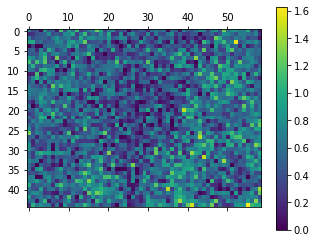

10099.632999999985 [('Ccl27a', 10099.632999999985), ('Chchd7', 10101.449999999995)]


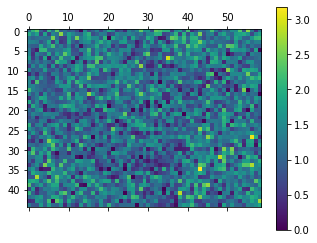

14651.815799999984 [('Ccl27a', 14651.815799999984), ('Vbp1', 14652.91139999998)]


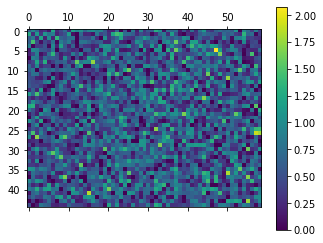

12579.54569999998 [('Ccl19', 12579.54569999998)]


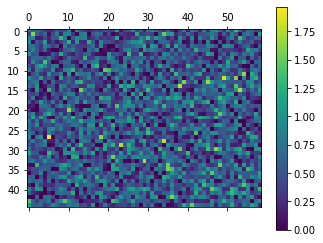

14557.82079999998 [('Ccl21a', 14557.82079999998)]


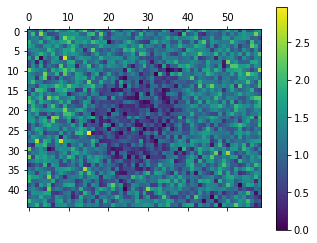

15271.877899999985 [('Il11', 15271.877899999985)]


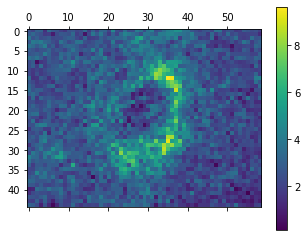

13065.960899999984 [('Il7', 13065.960899999984)]


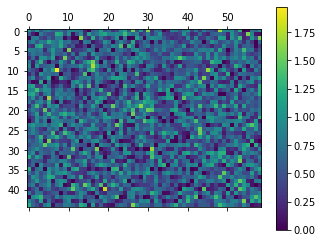

4892.7843 [('Il2ra', 4892.7843)]


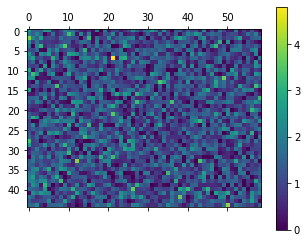

12904.570899999993 [('Il15ra', 12904.570899999993), ('Cav2', 12905.530399999985)]


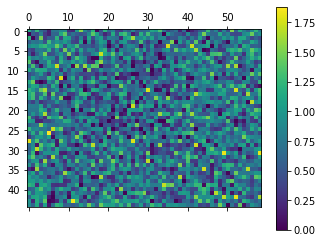

18122.08549999999 [('Il15ra', 18122.08549999999), ('Msh3', 18122.3698)]


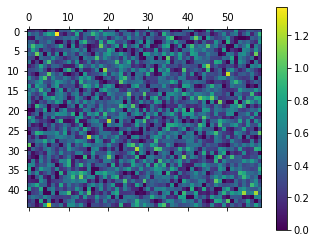

21365.61989999999 [('Il15ra', 21365.61989999999), ('Epo', 21364.868400000014)]


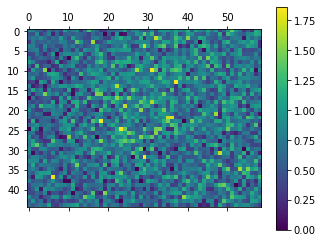

11161.56199999999 [('Il15ra', 11161.56199999999), ('Rbis', 11162.921699999992)]


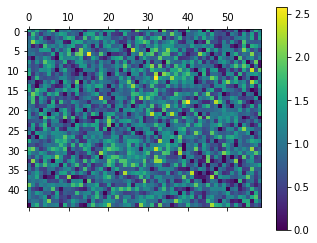

21687.485200000006 [('Il3ra', 21687.485200000006)]


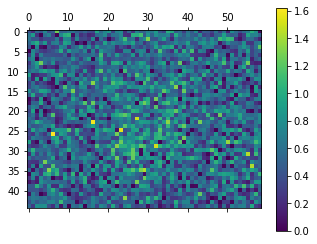

26612.208100000018 [('Il22ra2', 26612.208100000018)]


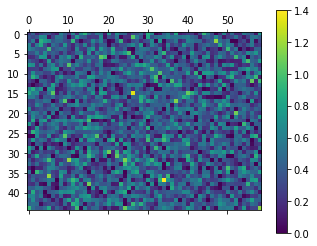

17490.081799999993 [('Il17a', 17490.081799999993)]


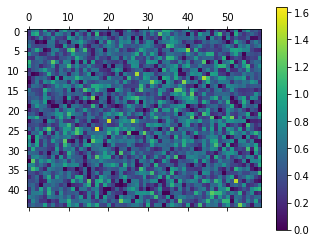

18279.695999999993 [('Il1rn', 18279.695999999993)]


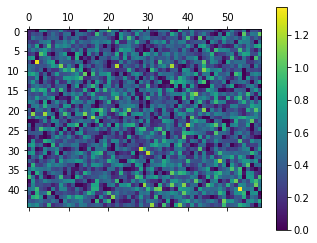

5903.754799999999 [('Il1rn', 5903.754799999999)]


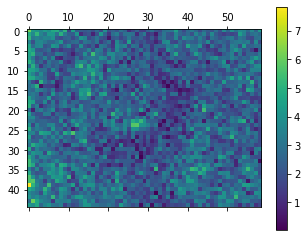

13626.99059999998 [('Cxcl17', 13626.99059999998), ('Wfdc10', 13626.576499999985)]


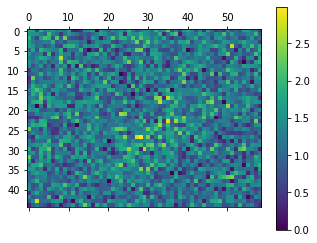

18202.5728 [('Il17rd', 18202.5728)]


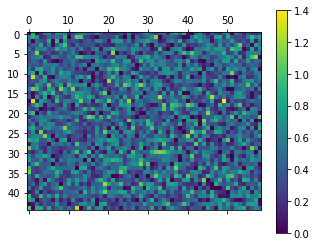

23928.884999999987 [('Ilrun', 23928.884999999987), ('Stradb', 23930.18550000001)]


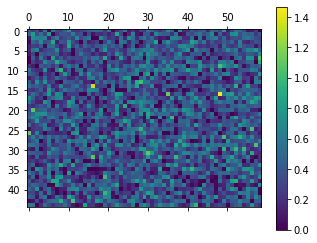

24900.095199999996 [('Ilrun', 24900.095199999996)]


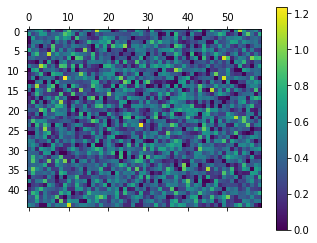

29990.628199999992 [('Il33', 29990.628199999992), ('Gnas', 29991.278499999975)]


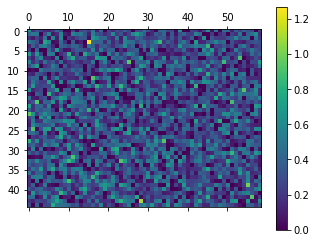

23789.840400000016 [('Il6', 23789.840400000016)]


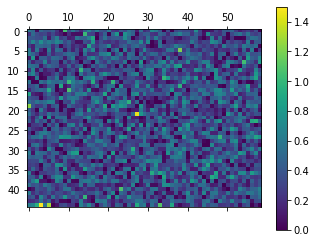

24383.67730000004 [('Il6', 24383.67730000004), ('Trappc4', 24384.7599)]


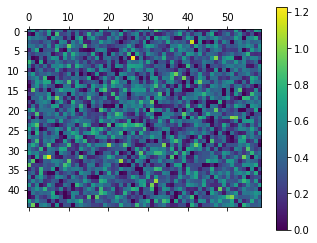

19399.816999999995 [('Il2', 19399.816999999995)]


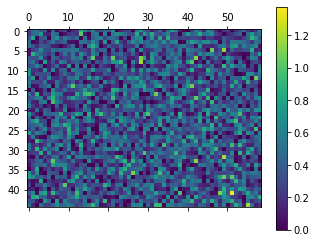

16810.60699999999 [('Il21', 16810.60699999999)]


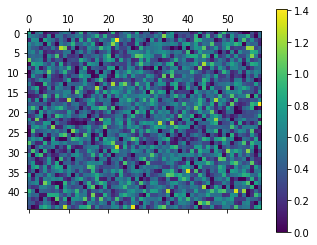

8872.763199999998 [('Il18', 8872.763199999998), ('Ss18l2', 8873.036699999993)]


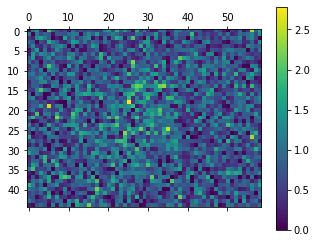

22149.901800000007 [('Il18', 22149.901800000007), ('Bhlha15', 22149.542699999965)]


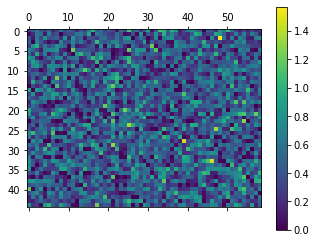

5272.061099999999 [('Il4', 5272.061099999999)]


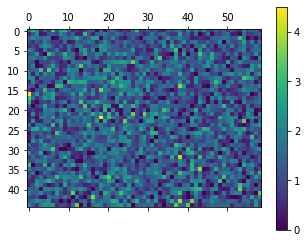

14107.345999999974 [('Il13', 14107.345999999974), ('Tnfrsf18', 14106.149199999985)]


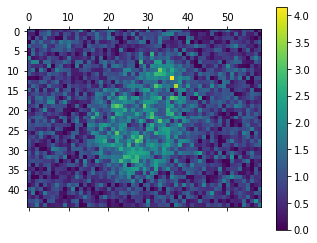

15409.923999999985 [('Il5', 15409.923999999985)]


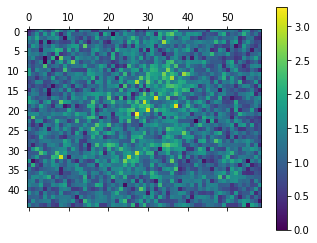

18540.14679999999 [('Il3', 18540.14679999999)]


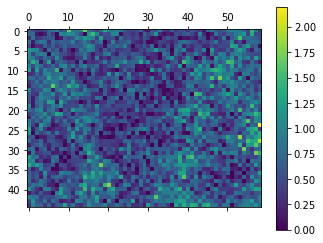

6986.472600000002 [('Cxcl14', 6986.472600000002)]


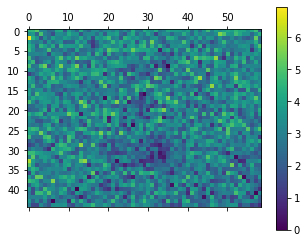

22348.43089999998 [('Il17d', 22348.43089999998), ('Fgf7', 22346.767500000016)]


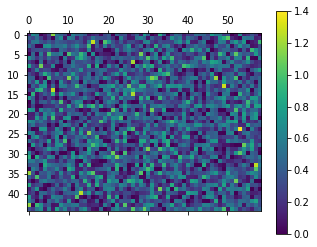

20308.54879999999 [('Il17b', 20308.54879999999), ('Il17c', 20308.787899999992)]


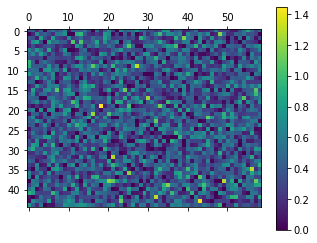

24178.823800000006 [('Il12a', 24178.823800000006), ('Ankrd55', 24177.100800000022)]


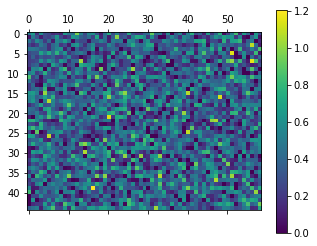

26204.00270000001 [('Il12a', 26204.00270000001), ('Prss2', 26203.25329999999)]


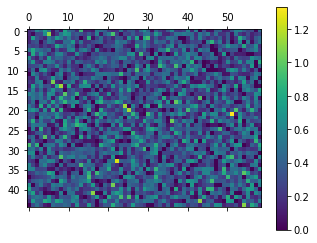

26895.941099999996 [('Cxcl16', 26895.941099999996)]


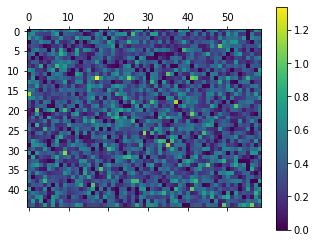

16325.812299999983 [('Ccl2', 16325.812299999983), ('Fam183b', 16327.27959999999)]


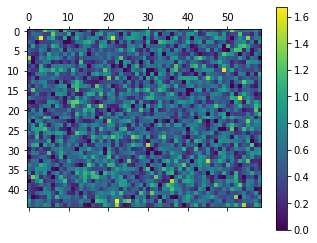

10892.872099999986 [('Ccl11', 10892.872099999986), ('Fam216b', 10891.48299999999)]


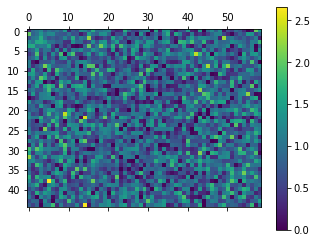

11658.704599999988 [('Ccl12', 11658.704599999988), ('Pate3', 11659.626499999986)]


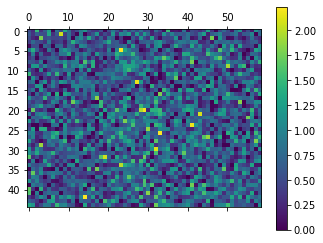

11017.193999999998 [('Ccl8', 11017.193999999998), ('Eif4ebp3', 11018.495599999993)]


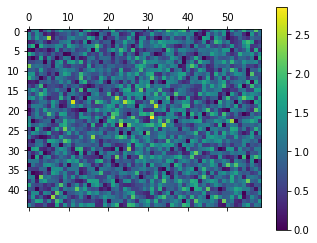

10754.69929999999 [('Ccl20', 10754.69929999999)]


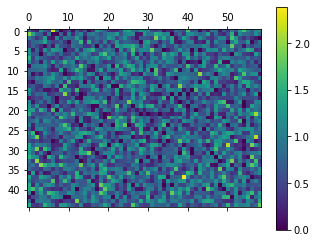

13870.752799999982 [('Ccl9', 13870.752799999982)]


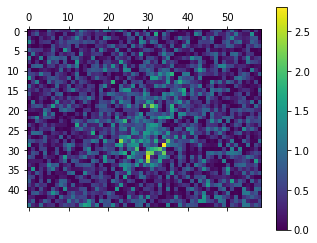

10167.716399999996 [('Ccl4', 10167.716399999996), ('Rad54b', 10169.499699999991)]


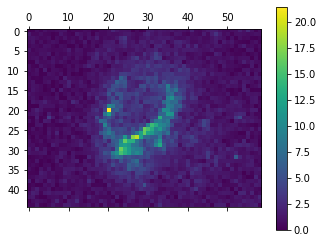

10254.250199999993 [('Cxcl1', 10254.250199999993)]


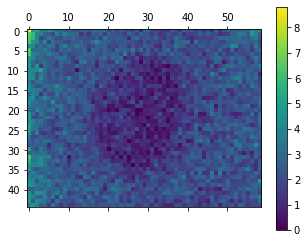

10620.574399999989 [('Cxcl2', 10620.574399999989), ('Gm525', 10620.183199999994)]


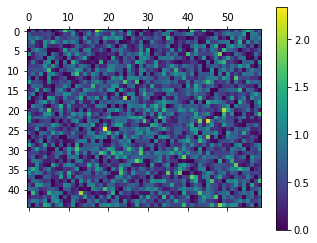

10788.802299999987 [('Cxcl10', 10788.802299999987), ('Zfp866', 10789.753199999994)]


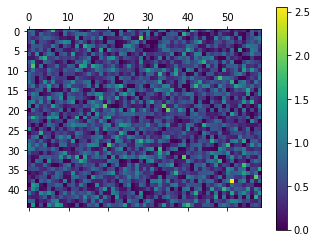

11152.35079999999 [('Cxcl11', 11152.35079999999)]


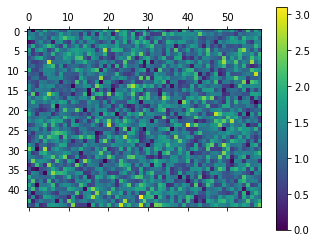

11538.699599999984 [('Ccl17', 11538.699599999984), ('Crem', 11537.28529999999)]


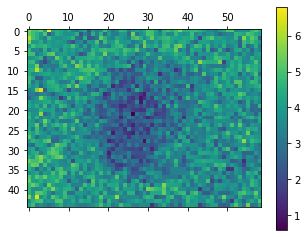

21899.871200000005 [('Il18bp', 21899.871200000005), ('Psmb1', 21900.825699999972)]


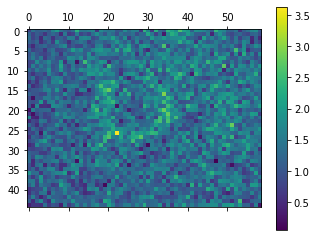

26763.888900000027 [('Il34', 26763.888900000027)]


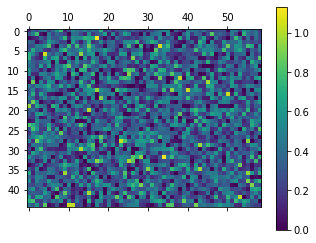

18538.088100000008 [('Il6st', 18538.088100000008), ('Mfap5', 18537.995099999996)]


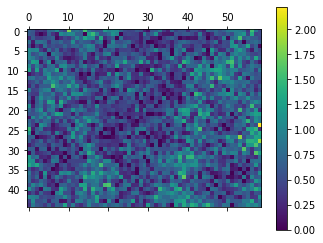

7292.779600000001 [('Il6st', 7292.779600000001)]


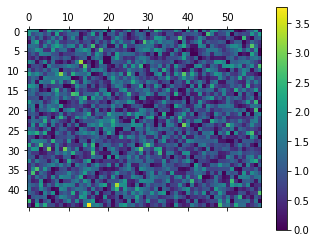

10560.59809999999 [('Cxcl12', 10560.59809999999), ('Mrps21', 10561.238699999993)]


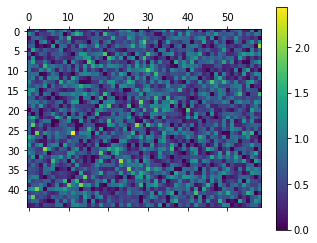

13634.183899999978 [('Cxcl12', 13634.183899999978), ('Ube2a', 13635.07789999999)]


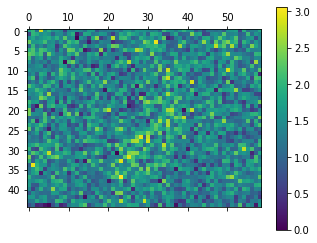

10031.886499999991 [('Cxcl12', 10031.886499999991), ('Tnfrsf12a', 10032.82969999999)]


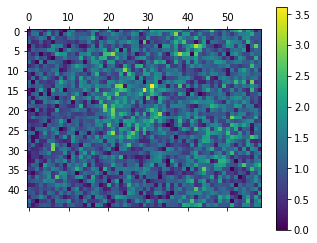

14569.692699999976 [('Ccl28', 14569.692699999976), ('Trmt2b', 14568.390499999981)]


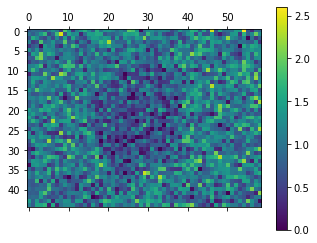

20308.787899999992 [('Il17c', 20308.787899999992), ('Il17b', 20308.54879999999)]


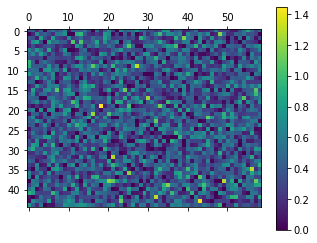

11199.70799999999 [('Il31', 11199.70799999999), ('Ss18l2', 11201.606299999994)]


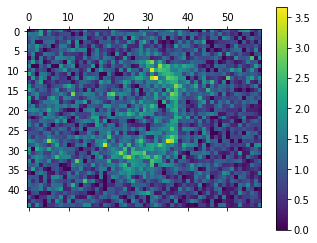

18119.635499999997 [('Il31', 18119.635499999997), ('Tpo', 18119.2567)]


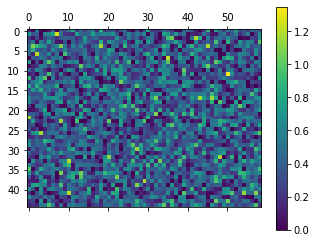

20872.213499999998 [('Il24', 20872.213499999998)]


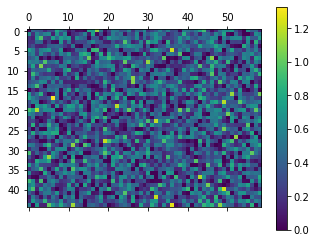

17542.508099999995 [('Il20', 17542.508099999995), ('Arl14epl', 17540.928299999996)]


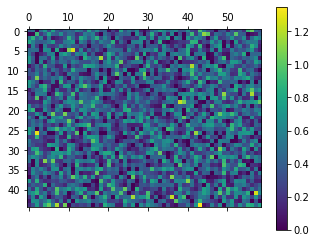

11672.063399999986 [('Il19', 11672.063399999986)]


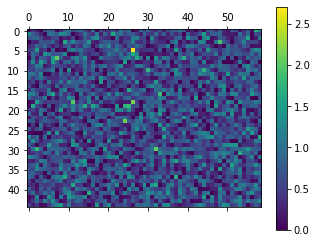

20287.34260000001 [('Il19', 20287.34260000001)]


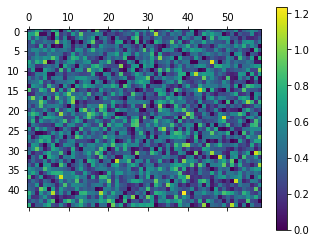

22536.800200000012 [('Ildr2', 22536.800200000012), ('Sult2a2', 22538.584699999978)]


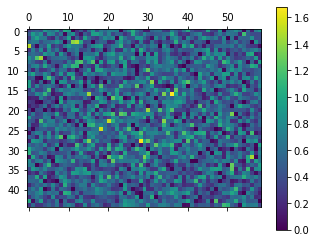

In [55]:
for y in pw_theo.protein2mass:
    if not y.startswith(("Ccl", "Ccr", "Cxc", "Il")):
        continue
    for x in pw_theo.get_masses_for_protein(y):
        massprots = pw_theo.get_protein_from_mass(x)
        
        if len(massprots) <= 2:
            print(x, massprots)
            spec.mass_heatmap(x)
            

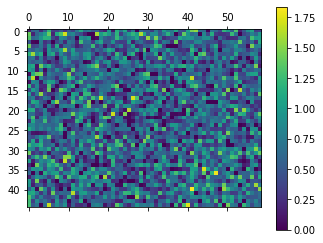

array([[0.15911348, 0.58806038, 0.63223016, ..., 1.07430517, 0.3203809 ,
        0.33869636],
       [1.41281837, 0.16918355, 0.60298909, ..., 0.81337169, 0.61448859,
        0.97462662],
       [1.34459427, 0.58818775, 0.67495202, ..., 1.28008504, 0.9795073 ,
        1.03705852],
       ...,
       [1.33123876, 0.85568952, 0.41028622, ..., 0.4987944 , 0.5094899 ,
        0.64913371],
       [1.25764988, 0.34326605, 0.89063464, ..., 0.57050332, 0.83675058,
        0.52411961],
       [1.27915034, 0.51406766, 0.70691507, ..., 0.41371866, 0.71941221,
        0.63945306]])

In [56]:
spec.mass_heatmap("Mif", pw=pw_theo)

Marker masses/proteins/genes are genes which are differentially regulated when compared to the specific cluster and all other clusters (including or excluding the background cluster).

Making the distinction regarding the background cluster might be required if the target tissue is embedded in another tissue. Excluding the background might then deliver more sensitive results.

In [57]:
mgenes = spec.find_all_markers(pw_theo, includeBackground=False, backgroundCluster=[0],
                               replaceExisting=False,
                               outdirectory="./deresults/",
                               use_methods=["ttest"]) #, "rank"

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100% |########################################################################|
100% |########################################################################|


In [58]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15)))]

In [59]:
for x in spec.df_results_all:
    for y in spec.df_results_all[x]:
        if x != "ttest":
            continue
        
        print(x,y)
        
        spec.export_deres(x, y, "./deresults/deres.{}.{}.html".format("_".join([str(j) for j in y[0]]), "_".join([str(j) for j in y[1]])))
        

ttest ((9,), (8, 10, 11, 12, 13, 14, 15))
ttest ((13,), (8, 9, 10, 11, 12, 14, 15))
ttest ((15,), (8, 9, 10, 11, 12, 13, 14))
ttest ((12,), (8, 9, 10, 11, 13, 14, 15))
ttest ((11,), (8, 9, 10, 12, 13, 14, 15))
ttest ((10,), (8, 9, 11, 12, 13, 14, 15))
ttest ((14,), (8, 9, 10, 11, 12, 13, 15))
ttest ((8,), (9, 10, 11, 12, 13, 14, 15))


In [60]:
mgenes_bg = spec.find_all_markers(pw_theo, includeBackground=True, replaceExisting=False, use_methods = ["ttest"])#, "rank"

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
100% |########################################################################|


In [61]:
def judge_de_masses(so, row):
    prot = row["gene"]
    mass = float(row["gene_mass"])
    massIdx = spec.idx_for_mass(mass)

    bgMass = spec.consensus[0][massIdx]
    allMedianMasses = [spec.consensus[x][massIdx] for x in sorted(spec.consensus)]
    allMedienPercs = sorted([abs((x/bgMass)-1.0) for x in allMedianMasses if not x == bgMass])
    
    
    if max(allMedianMasses) == bgMass and allMedienPercs[0] > 0.1: #  and 
        #print(prot, mass,bgMass, allMedienPercs[0], allMedianMasses)
        return False
    
    return True

spec.judge_de_masses( judge_de_masses )

After both find_all_markers runs we can list all DE results, which are then printed.
Each row shows one contained DE results beginning with the test performed and then a tuple of two region/cluster IDs. In the first row here:

a t-test was performed on cluster 9 versus clusters 8,10,11,12,13,14,15 .

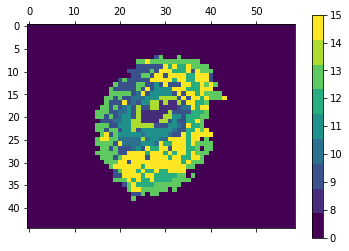

In [62]:
spec.plot_segments()

In [63]:
spec.list_de_results()

[('ttest', ((9,), (8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((0,), (8, 9, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((9,), (0, 8, 10, 11, 12, 13, 14, 15))),
 ('ttest', ((13,), (0, 8, 9, 10, 11, 12, 14, 15))),
 ('ttest', ((15,), (0, 8, 9, 10, 11, 12, 13, 14))),
 ('ttest', ((12,), (0, 8, 9, 10, 11, 13, 14, 15))),
 ('ttest', ((11,), (0, 8, 9, 10, 12, 13, 14, 15))),
 ('ttest', ((10,), (0, 8, 9, 11, 12, 13, 14, 15))),
 ('ttest', ((14,), (0, 8, 9, 10, 11, 12, 13, 15))),
 ('ttest', ((8,), (0, 9, 10, 11, 12, 13, 14, 15)))]

It's also easy to save the result to disk:

In [64]:
markerGenes = pd.DataFrame()

for comp in spec.df_results_all["ttest"]:
    
    if 0 in comp[0] or 0 in comp[1]:
        print("skip", comp)
        continue
    
    resDF = spec.df_results_all["ttest"][comp]
    resDF = resDF.loc[resDF.de_judge == True,]
    markerGenes = pd.concat([markerGenes, resDF], sort=False)

markerGenes.to_csv("deresults/marker_genes.tsv", sep="\t", index=False)

skip ((0,), (8, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (0, 8, 10, 11, 12, 13, 14, 15))
skip ((13,), (0, 8, 9, 10, 11, 12, 14, 15))
skip ((15,), (0, 8, 9, 10, 11, 12, 13, 14))
skip ((12,), (0, 8, 9, 10, 11, 13, 14, 15))
skip ((11,), (0, 8, 9, 10, 12, 13, 14, 15))
skip ((10,), (0, 8, 9, 11, 12, 13, 14, 15))
skip ((14,), (0, 8, 9, 10, 11, 12, 13, 15))
skip ((8,), (0, 9, 10, 11, 12, 13, 14, 15))


In [65]:
markerGenes

clusterID               gene_ident     gene_mass  de_judge    gene  \
0            9   mass_3447_328744848399   3447.328745      True   Fxyd3   
1            9   mass_3448_837878061723   3448.837878      True   Fxyd3   
6            9   mass_3456_383544128344   3456.383544      True   Rpl41   
7            9  mass_3457_8926773416683   3457.892677      True   Rpl41   
8            9  mass_3536_3676044345293   3536.367604      True  Ggnbp1   
...        ...                      ...           ...       ...     ...   
3948         8   mass_29947_70797082224  29947.707971      True  Capn10   
3949         8  mass_29949_217104035568  29949.217104      True  Exosc8   
3950         8  mass_29949_217104035568  29949.217104      True  Tollip   
3951         8   mass_29950_72623724889  29950.726237      True  Exosc8   
3952         8   mass_29950_72623724889  29950.726237      True  Tollip   

      protein_mass  avg_logFC        qvalue  num  anum        mean  \
0        3450.0089   0.515087  5.697727e-14  113   113    5.209013   
1        3450.0089   0.548282  6.445610e-16  113   113    5.374649   
6        3456.3183   0.540669  4.165329e-30  113   113  131.544631   
7        3456.3183   0.513741  1.361453e-27  113   113  152.614760   
8        3538.0160   0.523572  1.479116e-13  113   113    4.065103   
...            ...        ...           ...  ...   ...         ...   
3948    29946.0126   0.759363  4.251159e-03   22    22    0.532271   
3949    29948.9162   0.692339  1.219412e-02   22    22    0.512144   
3950    29948.0327   0.692339  1.219412e-02   22    22    0.512144   
3951    29948.9162   0.638204  2.212891e-02   22    22    0.499968   
3952    29948.0327   0.638204  2.212891e-02   22    22    0.499968   

          median  num_bg  anum_bg     mean_bg   median_bg  
0       5.202022     512      512    3.645011    3.657542  
1       5.412235     512      512    3.675370    3.560427  
6     123.444582     512      512   90.430570   89.349045  
7     144.543150     512      512  106.891950  104.068272  
8       4.047986     512      512    2.827879    2.793763  
...          ...     ...      ...         ...         ...  
3948    0.524174     603      564    0.314443    0.302384  
3949    0.526945     603      568    0.316940    0.297317  
3950    0.526945     603      568    0.316940    0.297317  
3951    0.485754     603      569    0.321236    0.290991  
3952    0.485754     603      569    0.321236    0.290991  

[9721 rows x 16 columns]

In [66]:
markerGenesBG = pd.DataFrame()

for comp in spec.df_results_all["ttest"]:
    if not (0 in comp[0] or 0 in comp[1]):
        continue
    
    resDF = spec.df_results_all["ttest"][comp]
    resDF = resDF.loc[resDF.de_judge == True,]
    markerGenesBG = pd.concat([markerGenesBG, resDF], sort=False)

markerGenesBG.to_csv("deresults/marker_genes_bg.tsv", sep="\t", index=False)

In [67]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 1769


In [68]:
print("Number of unique, differentially detected proteins (from masses): {}".format(len(set(mgenes_bg["ttest"]["gene"]))))

Number of unique, differentially detected proteins (from masses): 2709


In order to save the results, the SpectraRegion object can be pickled:

In [69]:
with open("slideD_region_0.spec.pickle", "wb") as fout:
    pickle.dump(spec, fout)

# Cell-type detection

Cell-type detection requires analyseMarkers.py from https://github.com/mjoppich/scrnaseq_celltype_prediction .

One (obvious) question is: what can I do with those marker proteins? Well, a lot!

First, these are the proteins which you are interested in: these define your clusters, because they are present.

Second, these proteins give a clue about which cell types might be present, if cell-type specific genes were found.

Using the scrnaseq-celltype-prediction tool, this can be analysed! Let's download it first (requires wget, python3 and several other libraries - maybe).
Did you know? This tool achieves better predictions than SingleR :)

Because we know what kind of sample we got (aorta embedded in liver), we can specify organs to specifically check for cell types.
Organs to be considered are "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver".
This allows a context-specific evaluation!

In [70]:
! ls analyseMarkers.py

analyseMarkers.py


In [71]:
! wget https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py

--2020-12-08 12:07:23--  https://raw.githubusercontent.com/mjoppich/scrnaseq_celltype_prediction/master/analyseMarkers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20292 (20K) [text/plain]
Saving to: ‘analyseMarkers.py.1’

analyseMarkers.py.1 100%[===================>]  19.82K  --.-KB/s    in 0.005s  

2020-12-08 12:07:24 (3.99 MB/s) - ‘analyseMarkers.py.1’ saved [20292/20292]



In [72]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes.tsv -n 3

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IFITM3', 'IL1RN'}	{'LY6C1', 'IFITM3', 'RGS2', 'IL1RN'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'ELK3', 'APLN', 'RBP7', 'IFI27', 'CLIC4', 'GLYCAM1'}	{'ELK3', 'LY6C1', 'APLN', 'ID1', 'RBP7', 'IFI27', 'CLIC4', 'GLYCAM1'}
8	Hepatocytes;Liver	5.704189582427714	11	13	6	8	{'OCIAD1', 'TM7SF2', 'APOA5', 'ANG', 'GRP', 'MRPS18C'}	{'OCIAD1', 'TM7SF2', 'APOA5', 'GRP', 'ANG', 'APOC3', 'SAT2', 'MRPS18C', 'TTR', 'SLPI', 'HSD11B1'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'S100A14', 'HEBP2'}
9	T me

This is quite interesting. For cluster 8 this tool predicts mainly monocytes or gamma delta t cells - cells which do not migrate into other tissues.

This makes sense, because one would expect these cell-types in the inner of the vessel.

H2AFX is known to be upregulated in lymphoblasts (check wikipedia ;) ).
Ifitm3 is highly expressed in both, Liver and Monocytes: https://www.proteinatlas.org/ENSG00000142089-IFITM3/tissue (Consensus dataset)spec.plot_segments(highlight=(10))

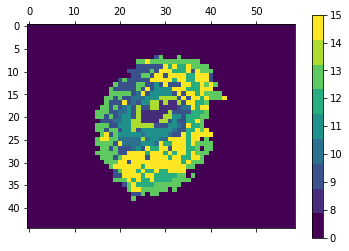

In [73]:
spec.plot_segments()

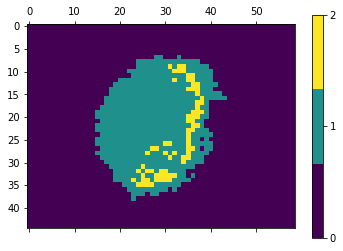

In [74]:
spec.plot_segments(highlight=(12))

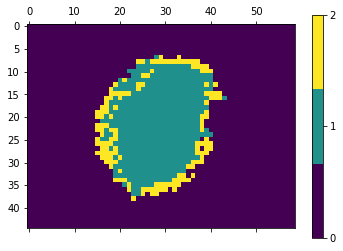

In [75]:
spec.plot_segments(highlight=(13))

In [76]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" "Liver" --pvaladj qvalue --markers deresults/marker_genes_bg.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 9 clusters.
Starting analysis
Loaded Databases
known genes 493
known (celltype, organ) 147
0	Mast cells;Immune system	0.28310110562942586	5	16	1	5	{'SLC31A2'}	{'PCP4L1', 'RGS13', 'FCER1A', 'IL4', 'SLC31A2'}
0	Basophils;Immune system	0.1255634596929066	5	11	1	3	{'DEFB40'}	{'DEFB40', 'FCER1A', 'IL4', 'CCL4', 'CCL9'}
8	Hepatocytes;Liver	20.2528741770176	13	17	8	10	{'OCIAD1', 'SLBP', 'APOA5', 'GRP', 'TM7SF2', 'ANG', 'APOA2', 'MRPS18C'}	{'OCIAD1', 'SLPI', 'TTR', 'HSD11B1', 'APOC3', 'SLBP', 'APOA5', 'GRP', 'SAT2', 'TM7SF2', 'ANG', 'APOA2', 'MRPS18C'}
8	Macrophages;Immune system	9.998087912449986	17	19	3	3	{'TYROBP', 'HILPDA', 'CD209F'}	{'H2-DMA', 'NMB', 'TREML4', 'RAB7B', 'CCL6', 'LGALS2', 'HILPDA', 'CYTH4', 'RETNLA', 'LY6C1', 'CD209A', 'WFDC

In this analysis, the background was kept in. More differential genes are found, but also more liver-related cell types are found.

This suggests that the analysis which includes the liver background has influenced the found differential proteins too much.

Nonetheless, the results remain consistent. For cluster 8, the missing monocytes are replaced by hepatocytes, which are monocyte-like cells residing in the liver.

Cluster 9 showing high amounds of cardiomyocytes is also not unlikely, given its location at the outer area of the aorta.

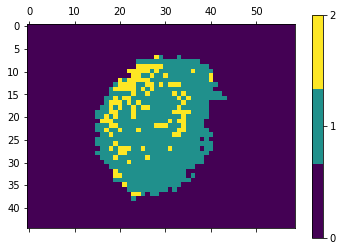

In [77]:
spec.plot_segments(highlight=(9))

Finally the SpectraRegion can also be exported to Aorta3D.

In [78]:
#spec.to_aorta3d("./slided_test/", "slided", 0, protWeights=pw, nodf=False, pathPrefix="../data/test_msi/")

In [79]:
!ls slided_test

slided.0.0.tsv	 slided.0.12.tsv  slided.0.15.tsv  slided.0.info
slided.0.10.tsv  slided.0.13.tsv  slided.0.8.tsv   slided.0.upgma.png
slided.0.11.tsv  slided.0.14.tsv  slided.0.9.tsv


# Preparations for CombinedSpectra - A comparative analysis

So far the results were only for one IMS sample.

Now the idea is to integrate multiple samples, in order to compare the different samples which were measured on the same slide.

Hence the remaining samples are processed, all in the same fashion. With the inter and intro normalization, the sample are made comparable.

In [80]:
# this uses theo!
pw = ProteinWeights("protein_weights.theo.tsv")

def judge_de_masses(spec, row):
    prot = row["gene"]
    mass = float(row["gene_mass"])
    massIdx = spec.idx_for_mass(mass)

    bgMass = spec.consensus[0][massIdx]
    allMedianMasses = [spec.consensus[x][massIdx] for x in sorted(spec.consensus)]
    allMedienPercs = sorted([abs((x/bgMass)-1.0) for x in allMedianMasses if not x == bgMass])
    
    
    if max(allMedianMasses) == bgMass and allMedienPercs[0] > 0.1: #  and 
        #print(prot, mass,bgMass, allMedienPercs[0], allMedianMasses)
        return False
    
    return True


def process_imzeregion(imze, regionID, basename):
    
    print("Processing regionID", regionID, "for basename", basename)
    
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    rspec = SpectraRegion(spectra, imze.mzValues, name=basename + "_" + str(regionID))
    rspec.calculate_similarity(mode="spectra_log_dist")
    rspec.segment(method="WARD", number_of_regions=15)
    rspec.plot_segments()
    
    rspec.filter_clusters(method='remove_singleton')
    rspec.filter_clusters(method='merge_background')
    rspec.filter_clusters(method='remove_islands')
    rspec.filter_clusters(method='remove_islands', minIslandSize=15)
    rspec.plot_segments()
    
    rspec.consensus_spectra()
    #rspec.consensus_similarity()
    #rspec.plot_consensus_similarity()

    mgenes = rspec.find_all_markers(pw, includeBackground=False, replaceExisting=False, use_methods = ["ttest"])
    mgenes_bg = rspec.find_all_markers(pw, includeBackground=True, replaceExisting=False, use_methods = ["ttest"])
    
    rspec.judge_de_masses( judge_de_masses )

    
    markerGenes = pd.DataFrame()
    for comp in spec.df_results_all["ttest"]:

        if 0 in comp[0] or 0 in comp[1]:
            print("skip", comp)
            continue

        resDF = spec.df_results_all["ttest"][comp]
        resDF = resDF.loc[resDF.de_judge == True,]
        markerGenes = pd.concat([markerGenes, resDF], sort=False)
        

    markerGenesBG = pd.DataFrame()
    for comp in spec.df_results_all["ttest"]:

        if not (0 in comp[0] or 0 in comp[1]):
            print("skip", comp)
            continue

        resDF = spec.df_results_all["ttest"][comp]
        resDF = resDF.loc[resDF.de_judge == True,]
        markerGenesBG = pd.concat([markerGenesBG, resDF], sort=False)
    
    return rspec, markerGenes, markerGenesBG
    

2020-12-08 12:07:27,982  ProteinWeights  INFO: Loaded a total of 21506 proteins with 36368 masses


First set the logging level to warn, to remove too many messages ...

In [81]:
#loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
#for logger in loggers:
#    logger.setLevel(logging.WARN)

Processing regionID 0 for basename slideD


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
2020-12-08 12:07:51,025  SpectraRegion  INFO: dimensions inputarray: 17900
2020-12-08 12:07:51,025  SpectraRegion  INFO: Creating C++ obj
2020-12-08 12:07:51,026  SpectraRegion  INFO: 17900 (45, 59, 17900)
2020-12-08 12:07:51,026  SpectraRegion  INFO: dimensions 17900
2020-12-08 12:07:51,027  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-12-08 12:07:51,027  SpectraRegion  INFO: Switching to dot mode
2020-12-08 12:07:51,087  SpectraRegion  INFO: Starting calc similarity c++
2020-12-08 12:07:59,277  SpectraRegion  INFO: outclust dimensions (2655, 2655)
2020-12-08 12:07:59,278  SpectraRegion  INFO: Calculating spectra similarity
2020-12-08 12:07:59,316  SpectraR

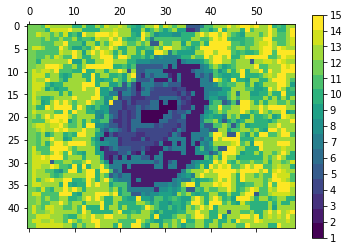

2020-12-08 12:08:33,905  SpectraRegion  INFO: Assigning clusters to background: {10, 11, 12, 13, 14, 15}


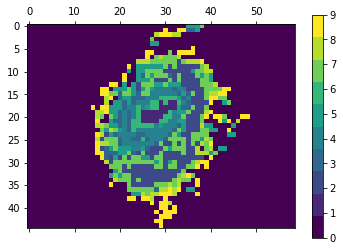

2020-12-08 12:08:33,992  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 12:08:34,021  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 12:08:34,022  SpectraRegion  INFO: Calculating consensus spectra done
2020-12-08 12:08:34,025  SpectraRegion  INFO: DE data for case: [5]
2020-12-08 12:08:34,025  SpectraRegion  INFO: DE data for control: [7, 9, 3, 8, 2, 4, 6, 1]
2020-12-08 12:08:34,026  SpectraRegion  INFO: Running [5] against [7, 9, 3, 8, 2, 4, 6, 1]
2020-12-08 12:08:34,026  SpectraRegion  INFO: DE result key: ((5,), (1, 2, 3, 4, 6, 7, 8, 9))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |####################

skip ((0,), (8, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (0, 8, 10, 11, 12, 13, 14, 15))
skip ((13,), (0, 8, 9, 10, 11, 12, 14, 15))
skip ((15,), (0, 8, 9, 10, 11, 12, 13, 14))
skip ((12,), (0, 8, 9, 10, 11, 13, 14, 15))
skip ((11,), (0, 8, 9, 10, 12, 13, 14, 15))
skip ((10,), (0, 8, 9, 11, 12, 13, 14, 15))
skip ((14,), (0, 8, 9, 10, 11, 12, 13, 15))
skip ((8,), (0, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (8, 10, 11, 12, 13, 14, 15))
skip ((13,), (8, 9, 10, 11, 12, 14, 15))
skip ((15,), (8, 9, 10, 11, 12, 13, 14))
skip ((12,), (8, 9, 10, 11, 13, 14, 15))
skip ((11,), (8, 9, 10, 12, 13, 14, 15))
skip ((10,), (8, 9, 11, 12, 13, 14, 15))
skip ((14,), (8, 9, 10, 11, 12, 13, 15))
skip ((8,), (9, 10, 11, 12, 13, 14, 15))
Processing regionID 1 for basename slideD


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
2020-12-08 12:18:43,185  SpectraRegion  INFO: dimensions inputarray: 17900
2020-12-08 12:18:43,186  SpectraRegion  INFO: Creating C++ obj
2020-12-08 12:18:43,186  SpectraRegion  INFO: 17900 (43, 56, 17900)
2020-12-08 12:18:43,187  SpectraRegion  INFO: dimensions 17900
2020-12-08 12:18:43,187  SpectraRegion  INFO: input dimensions (43, 56, 17900)
2020-12-08 12:18:43,189  SpectraRegion  INFO: Switching to dot mode
2020-12-08 12:18:43,242  SpectraRegion  INFO: Starting calc similarity c++
2020-12-08 12:18:50,011  SpectraRegion  INFO: outclust dimensions (2408, 2408)
2020-12-08 12:18:50,013  SpectraRegion  INFO: Calculating spectra similarity
2020-12-08 12:18:50,044  SpectraR

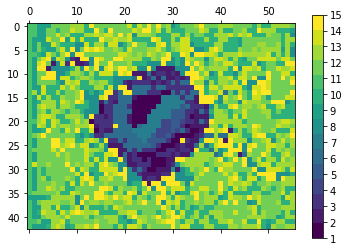

2020-12-08 12:19:18,877  SpectraRegion  INFO: Assigning clusters to background: {8, 9, 10, 11, 12, 13, 14}


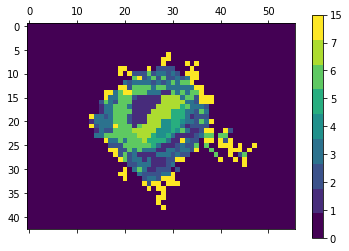

2020-12-08 12:19:18,964  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 12:19:18,991  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 12:19:18,992  SpectraRegion  INFO: Calculating consensus spectra done
2020-12-08 12:19:18,994  SpectraRegion  INFO: DE data for case: [15]
2020-12-08 12:19:18,994  SpectraRegion  INFO: DE data for control: [2, 6, 3, 1, 7, 5, 4]
2020-12-08 12:19:18,995  SpectraRegion  INFO: Running [15] against [2, 6, 3, 1, 7, 5, 4]
2020-12-08 12:19:18,995  SpectraRegion  INFO: DE result key: ((15,), (1, 2, 3, 4, 5, 6, 7))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |##########################

skip ((0,), (8, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (0, 8, 10, 11, 12, 13, 14, 15))
skip ((13,), (0, 8, 9, 10, 11, 12, 14, 15))
skip ((15,), (0, 8, 9, 10, 11, 12, 13, 14))
skip ((12,), (0, 8, 9, 10, 11, 13, 14, 15))
skip ((11,), (0, 8, 9, 10, 12, 13, 14, 15))
skip ((10,), (0, 8, 9, 11, 12, 13, 14, 15))
skip ((14,), (0, 8, 9, 10, 11, 12, 13, 15))
skip ((8,), (0, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (8, 10, 11, 12, 13, 14, 15))
skip ((13,), (8, 9, 10, 11, 12, 14, 15))
skip ((15,), (8, 9, 10, 11, 12, 13, 14))
skip ((12,), (8, 9, 10, 11, 13, 14, 15))
skip ((11,), (8, 9, 10, 12, 13, 14, 15))
skip ((10,), (8, 9, 11, 12, 13, 14, 15))
skip ((14,), (8, 9, 10, 11, 12, 13, 15))
skip ((8,), (9, 10, 11, 12, 13, 14, 15))


In [82]:
slided_0, slided0_mgenes, slided0_mgenes_bg = process_imzeregion(imze=imze, regionID= 0, basename="slideD")
slided_1, slided1_mgenes, slided1_mgenes_bg = process_imzeregion(imze=imze, regionID= 1, basename="slideD")

Processing regionID 4 for basename slideD


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
2020-12-08 12:26:59,013  SpectraRegion  INFO: dimensions inputarray: 17900
2020-12-08 12:26:59,013  SpectraRegion  INFO: Creating C++ obj
2020-12-08 12:26:59,014  SpectraRegion  INFO: 17900 (49, 56, 17900)
2020-12-08 12:26:59,014  SpectraRegion  INFO: dimensions 17900
2020-12-08 12:26:59,015  SpectraRegion  INFO: input dimensions (49, 56, 17900)
2020-12-08 12:26:59,016  SpectraRegion  INFO: Switching to dot mode
2020-12-08 12:26:59,075  SpectraRegion  INFO: Starting calc similarity c++
2020-12-08 12:27:08,159  SpectraRegion  INFO: outclust dimensions (2744, 2744)
2020-12-08 12:27:08,160  SpectraRegion  INFO: Calculating spectra similarity
2020-12-08 12:27:08,199  SpectraR

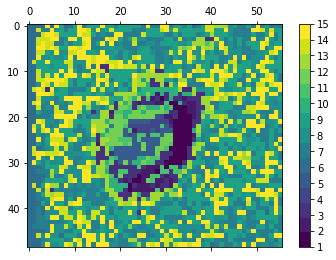

2020-12-08 12:27:45,065  SpectraRegion  INFO: Assigning clusters to background: {6, 7, 8, 9, 14, 15}


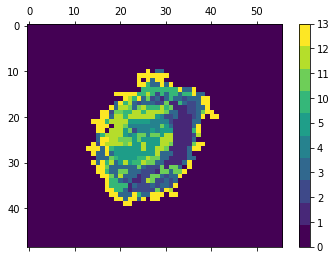

2020-12-08 12:27:45,147  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 12:27:45,178  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 12:27:45,179  SpectraRegion  INFO: Calculating consensus spectra done
2020-12-08 12:27:45,181  SpectraRegion  INFO: DE data for case: [13]
2020-12-08 12:27:45,181  SpectraRegion  INFO: DE data for control: [3, 10, 12, 2, 11, 1, 5, 4]
2020-12-08 12:27:45,182  SpectraRegion  INFO: Running [13] against [3, 10, 12, 2, 11, 1, 5, 4]
2020-12-08 12:27:45,182  SpectraRegion  INFO: DE result key: ((13,), (1, 2, 3, 4, 5, 10, 11, 12))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########

skip ((0,), (8, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (0, 8, 10, 11, 12, 13, 14, 15))
skip ((13,), (0, 8, 9, 10, 11, 12, 14, 15))
skip ((15,), (0, 8, 9, 10, 11, 12, 13, 14))
skip ((12,), (0, 8, 9, 10, 11, 13, 14, 15))
skip ((11,), (0, 8, 9, 10, 12, 13, 14, 15))
skip ((10,), (0, 8, 9, 11, 12, 13, 14, 15))
skip ((14,), (0, 8, 9, 10, 11, 12, 13, 15))
skip ((8,), (0, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (8, 10, 11, 12, 13, 14, 15))
skip ((13,), (8, 9, 10, 11, 12, 14, 15))
skip ((15,), (8, 9, 10, 11, 12, 13, 14))
skip ((12,), (8, 9, 10, 11, 13, 14, 15))
skip ((11,), (8, 9, 10, 12, 13, 14, 15))
skip ((10,), (8, 9, 11, 12, 13, 14, 15))
skip ((14,), (8, 9, 10, 11, 12, 13, 15))
skip ((8,), (9, 10, 11, 12, 13, 14, 15))
Processing regionID 5 for basename slideD


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
2020-12-08 12:38:29,019  SpectraRegion  INFO: dimensions inputarray: 17900
2020-12-08 12:38:29,020  SpectraRegion  INFO: Creating C++ obj
2020-12-08 12:38:29,020  SpectraRegion  INFO: 17900 (52, 59, 17900)
2020-12-08 12:38:29,020  SpectraRegion  INFO: dimensions 17900
2020-12-08 12:38:29,021  SpectraRegion  INFO: input dimensions (52, 59, 17900)
2020-12-08 12:38:29,021  SpectraRegion  INFO: Switching to dot mode
2020-12-08 12:38:29,114  SpectraRegion  INFO: Starting calc similarity c++
2020-12-08 12:38:40,307  SpectraRegion  INFO: outclust dimensions (3068, 3068)
2020-12-08 12:38:40,308  SpectraRegion  INFO: Calculating spectra similarity
2020-12-08 12:38:40,358  SpectraR

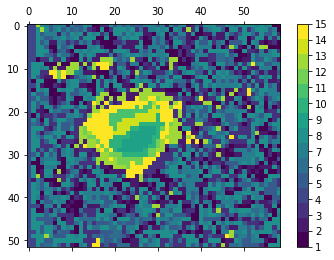

2020-12-08 12:39:26,344  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5, 6, 7, 8, 13}


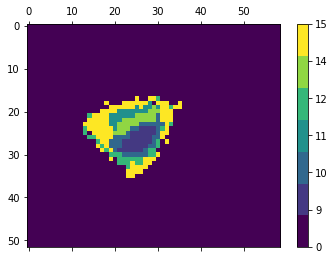

2020-12-08 12:39:26,422  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 12:39:26,455  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 12:39:26,456  SpectraRegion  INFO: Calculating consensus spectra done
2020-12-08 12:39:26,458  SpectraRegion  INFO: DE data for case: [15]
2020-12-08 12:39:26,459  SpectraRegion  INFO: DE data for control: [12, 11, 14, 10, 9]
2020-12-08 12:39:26,459  SpectraRegion  INFO: Running [15] against [12, 11, 14, 10, 9]
2020-12-08 12:39:26,460  SpectraRegion  INFO: DE result key: ((15,), (9, 10, 11, 12, 14))
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |################################

skip ((0,), (8, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (0, 8, 10, 11, 12, 13, 14, 15))
skip ((13,), (0, 8, 9, 10, 11, 12, 14, 15))
skip ((15,), (0, 8, 9, 10, 11, 12, 13, 14))
skip ((12,), (0, 8, 9, 10, 11, 13, 14, 15))
skip ((11,), (0, 8, 9, 10, 12, 13, 14, 15))
skip ((10,), (0, 8, 9, 11, 12, 13, 14, 15))
skip ((14,), (0, 8, 9, 10, 11, 12, 13, 15))
skip ((8,), (0, 9, 10, 11, 12, 13, 14, 15))
skip ((9,), (8, 10, 11, 12, 13, 14, 15))
skip ((13,), (8, 9, 10, 11, 12, 14, 15))
skip ((15,), (8, 9, 10, 11, 12, 13, 14))
skip ((12,), (8, 9, 10, 11, 13, 14, 15))
skip ((11,), (8, 9, 10, 12, 13, 14, 15))
skip ((10,), (8, 9, 11, 12, 13, 14, 15))
skip ((14,), (8, 9, 10, 11, 12, 13, 15))
skip ((8,), (9, 10, 11, 12, 13, 14, 15))


In [83]:
slided_4, slided4_mgenes, slided4_mgenes_bg = process_imzeregion(imze=imze, regionID= 4, basename="slideD")
slided_5, slided5_mgenes, slided5_mgenes_bg = process_imzeregion(imze=imze, regionID= 5, basename="slideD")

In [84]:
#loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
#for logger in loggers:
#    logger.setLevel(logging.INFO)
[x for x in slided0_mgenes]

['clusterID',
 'gene_ident',
 'gene_mass',
 'de_judge',
 'gene',
 'protein_mass',
 'avg_logFC',
 'qvalue',
 'num',
 'anum',
 'mean',
 'median',
 'num_bg',
 'anum_bg',
 'mean_bg',
 'median_bg']

In [85]:
slided0_mgenes

clusterID               gene_ident     gene_mass  de_judge    gene  \
0            9   mass_3447_328744848399   3447.328745      True   Fxyd3   
1            9   mass_3448_837878061723   3448.837878      True   Fxyd3   
6            9   mass_3456_383544128344   3456.383544      True   Rpl41   
7            9  mass_3457_8926773416683   3457.892677      True   Rpl41   
8            9  mass_3536_3676044345293   3536.367604      True  Ggnbp1   
...        ...                      ...           ...       ...     ...   
3948         8   mass_29947_70797082224  29947.707971      True  Capn10   
3949         8  mass_29949_217104035568  29949.217104      True  Exosc8   
3950         8  mass_29949_217104035568  29949.217104      True  Tollip   
3951         8   mass_29950_72623724889  29950.726237      True  Exosc8   
3952         8   mass_29950_72623724889  29950.726237      True  Tollip   

      protein_mass  avg_logFC        qvalue  num  anum        mean  \
0        3450.0089   0.515087  5.697727e-14  113   113    5.209013   
1        3450.0089   0.548282  6.445610e-16  113   113    5.374649   
6        3456.3183   0.540669  4.165329e-30  113   113  131.544631   
7        3456.3183   0.513741  1.361453e-27  113   113  152.614760   
8        3538.0160   0.523572  1.479116e-13  113   113    4.065103   
...            ...        ...           ...  ...   ...         ...   
3948    29946.0126   0.759363  4.251159e-03   22    22    0.532271   
3949    29948.9162   0.692339  1.219412e-02   22    22    0.512144   
3950    29948.0327   0.692339  1.219412e-02   22    22    0.512144   
3951    29948.9162   0.638204  2.212891e-02   22    22    0.499968   
3952    29948.0327   0.638204  2.212891e-02   22    22    0.499968   

          median  num_bg  anum_bg     mean_bg   median_bg  
0       5.202022     512      512    3.645011    3.657542  
1       5.412235     512      512    3.675370    3.560427  
6     123.444582     512      512   90.430570   89.349045  
7     144.543150     512      512  106.891950  104.068272  
8       4.047986     512      512    2.827879    2.793763  
...          ...     ...      ...         ...         ...  
3948    0.524174     603      564    0.314443    0.302384  
3949    0.526945     603      568    0.316940    0.297317  
3950    0.526945     603      568    0.316940    0.297317  
3951    0.485754     603      569    0.321236    0.290991  
3952    0.485754     603      569    0.321236    0.290991  

[9721 rows x 16 columns]

In [86]:
markerGenes0 = slided0_mgenes
markerGenes0.to_csv("deresults/marker_genes_region_0.tsv", sep="\t", index=False)
markerGenes1 = slided1_mgenes
markerGenes1.to_csv("deresults/marker_genes_region_1.tsv", sep="\t", index=False)
markerGenes4 = slided4_mgenes
markerGenes4.to_csv("deresults/marker_genes_region_4.tsv", sep="\t", index=False)
markerGenes5 = slided5_mgenes
markerGenes5.to_csv("deresults/marker_genes_region_5.tsv", sep="\t", index=False)


In [87]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv --aorta3d --output deresults/marker_genes_region_0.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv --aorta3d --output deresults/marker_genes_region_1.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv --aorta3d --output deresults/marker_genes_region_4.pred.tsv 
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv --aorta3d --output deresults/marker_genes_region_5.pred.tsv 

Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
Setting number of predictions to 1
Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from n

In [88]:
slided_0.to_aorta3d("./aorta3d/slided/", "slided", 0, protWeights=pw, ctpred="deresults/marker_genes_region_0.pred.tsv")
slided_1.to_aorta3d("./aorta3d/slided/", "slided", 1, protWeights=pw, ctpred="deresults/marker_genes_region_1.pred.tsv")
slided_4.to_aorta3d("./aorta3d/slided/", "slided", 4, protWeights=pw, ctpred="deresults/marker_genes_region_4.pred.tsv")
slided_5.to_aorta3d("./aorta3d/slided/", "slided", 5, protWeights=pw, ctpred="deresults/marker_genes_region_5.pred.tsv")

2020-12-08 13:22:16,685  SpectraRegion  INFO: Cell-type assigned: 8 -> Monocytes;Immune system
2020-12-08 13:22:16,686  SpectraRegion  INFO: Cell-type assigned: 9 -> B cells;Immune system
2020-12-08 13:22:16,686  SpectraRegion  INFO: Cell-type assigned: 10 -> Smooth muscle cells;Smooth muscle
2020-12-08 13:22:16,686  SpectraRegion  INFO: Cell-type assigned: 11 -> Macrophages;Immune system
2020-12-08 13:22:16,687  SpectraRegion  INFO: Cell-type assigned: 12 -> Satellite cells;Skeletal muscle
2020-12-08 13:22:16,687  SpectraRegion  INFO: Cell-type assigned: 13 -> Mast cells;Immune system
2020-12-08 13:22:16,688  SpectraRegion  INFO: Cell-type assigned: 14 -> B cells naive;Immune system
2020-12-08 13:22:16,688  SpectraRegion  INFO: Cell-type assigned: 15 -> Basal cells;Epithelium
2020-12-08 13:22:16,694  SpectraRegion  INFO: Segment Image: ./aorta3d/slided/slided.0.clustering.png
2020-12-08 13:22:16,723  SpectraRegion  INFO: Segment Matrix: /mnt/f/dev/git/pyIMS/examples/aorta3d/slided/sli

In [89]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_0.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IL1RN', 'IFITM3'}	{'IL1RN', 'IFITM3', 'LY6C1', 'RGS2'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'ELK3', 'CLIC4', 'GLYCAM1', 'RBP7', 'IFI27', 'APLN'}	{'ELK3', 'CLIC4', 'GLYCAM1', 'RBP7', 'IFI27', 'LY6C1', 'APLN', 'ID1'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'MSRB3', 'SEC24D'}	{'MSRB3', 'SEC24D', 'RGS5'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'LST1', 'MIF', 'CLEC9A',

In [90]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_1.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IL1RN', 'IFITM3'}	{'IL1RN', 'IFITM3', 'LY6C1', 'RGS2'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'GLYCAM1', 'CLIC4', 'APLN', 'ELK3', 'IFI27', 'RBP7'}	{'ID1', 'GLYCAM1', 'CLIC4', 'APLN', 'ELK3', 'IFI27', 'LY6C1', 'RBP7'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'MSRB3', 'SEC24D'}	{'RGS5', 'MSRB3', 'SEC24D'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'MIF', 'H2-DMA', 'CLEC9A

In [91]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_4.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IFITM3', 'IL1RN'}	{'LY6C1', 'IFITM3', 'IL1RN', 'RGS2'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'ELK3', 'IFI27', 'RBP7', 'CLIC4', 'APLN', 'GLYCAM1'}	{'ELK3', 'IFI27', 'RBP7', 'CLIC4', 'ID1', 'LY6C1', 'APLN', 'GLYCAM1'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'S100A14', 'HEBP2'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'SEC24D', 'MSRB3'}	{'RGS5', 'SEC24D', 'MSRB3'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'LST1', 'CLEC9A', 'H2-DM

In [92]:
! python3 analyseMarkers.py --organs "Connective tissue" "Vasculature" "Heart" "Skeletal Muscle" "Smooth muscle" "Immune system" "Blood" "Epithelium" --pvaladj qvalue --markers deresults/marker_genes_region_5.tsv -n 2

Taking value gene from gene
Taking value cluster from clusterID
Taking value logfc from avg_logFC
Taking value pvaladj from qvalue
Taking value expr-mean from mean
Taking value expressing-cell-count from num
Taking value cluster-cell-count from anum
Got 8 clusters.
Starting analysis
Loaded Databases
known genes 327
known (celltype, organ) 136
8	Monocytes;Immune system	7.024700643179011	4	6	2	2	{'IL1RN', 'IFITM3'}	{'LY6C1', 'RGS2', 'IL1RN', 'IFITM3'}
8	Endothelial cells;Vasculature	6.615677160578961	8	10	6	6	{'GLYCAM1', 'CLIC4', 'RBP7', 'ELK3', 'IFI27', 'APLN'}	{'GLYCAM1', 'LY6C1', 'CLIC4', 'RBP7', 'ELK3', 'IFI27', 'APLN', 'ID1'}
9	B cells;Immune system	0.36137190148268017	1	9	1	2	{'POLD4'}	{'POLD4'}
9	Basal cells;Epithelium	0.08356622137122802	2	5	1	2	{'HEBP2'}	{'HEBP2', 'S100A14'}
10	Smooth muscle cells;Smooth muscle	6.30809942596703	3	9	2	3	{'MSRB3', 'SEC24D'}	{'MSRB3', 'RGS5', 'SEC24D'}
10	Dendritic cells;Immune system	1.4120186433259918	4	12	1	3	{'CLEC9A'}	{'MIF', 'H2-DMA', 'CLEC9A

From these cell type predictions it can be seen that mostly atherosclerosis relates cell types are showing up.

# Creating a CombinedSpectra

In [93]:
slided_0.name = "slided_0"
slided_1.name = "slided_1"
slided_4.name = "slided_4"
slided_5.name = "slided_5"

In [ ]:
#slided_0 = SpectraRegion.from_pickle("slideD_region_0.pickle")
#slided_1 = SpectraRegion.from_pickle("slideD_region_1.pickle")
#slided_4 = SpectraRegion.from_pickle("slideD_region_4.pickle")
#slided_5 = SpectraRegion.from_pickle("slideD_region_5pickle")

Of course a SpectraRegion can also be re-processed to yield a more realistic clustering.

2020-12-08 13:51:06,192  SpectraRegion  INFO: Calculating clusters
2020-12-08 13:51:06,465  SpectraRegion  INFO: Calculating clusters done
2020-12-08 13:51:06,493  SpectraRegion  INFO: Calculating clusters saved


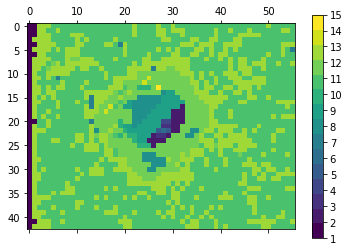

2020-12-08 13:51:06,636  SpectraRegion  INFO: Assigning clusters to background: {1, 11, 13}


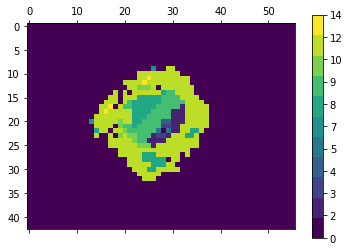

In [94]:
slided_1.segment(method="WPGMA", number_of_regions=15)
slided_1.plot_segments()

slided_1.filter_clusters(method='remove_singleton')
slided_1.filter_clusters(method='merge_background')
slided_1.filter_clusters(method='remove_islands')
slided_1.filter_clusters(method='remove_islands', minIslandSize=15)



slided_1.plot_segments()

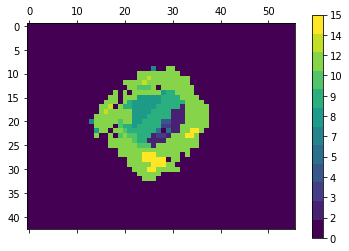

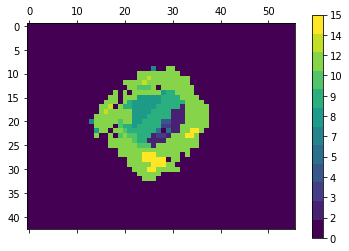

In [96]:
mask = slided_1.segmented == 8
mask[0:22,: ] = False
mask[:,0:22 ] = False
slided_1.segmented[mask] = 15
slided_1.plot_segments()
slided_1.plot_segments()

2020-12-08 13:51:32,020  SpectraRegion  INFO: Calculating clusters
2020-12-08 13:51:32,344  SpectraRegion  INFO: Calculating clusters done
2020-12-08 13:51:32,362  SpectraRegion  INFO: Calculating clusters saved


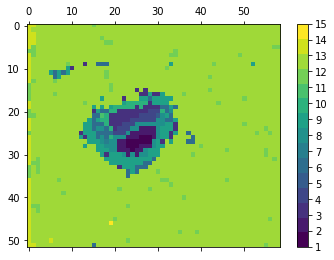

2020-12-08 13:51:32,529  SpectraRegion  INFO: Assigning clusters to background: {12, 13, 14}


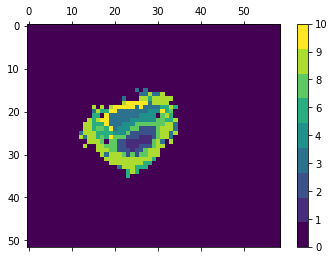

In [97]:
slided_5.segment(method="WPGMA", number_of_regions=15)
slided_5.plot_segments()

slided_5.filter_clusters(method='remove_singleton')
slided_5.filter_clusters(method='merge_background')
slided_5.filter_clusters(method='remove_islands')
slided_5.filter_clusters(method='remove_islands', minIslandSize=15)
slided_5.plot_segments()

In [98]:
#slided_0.to_pickle("deresults/slideD_region_0.pickle")
#slided_1.to_pickle("deresults/slideD_region_1.pickle")

In [99]:
#slided_4.to_pickle("deresults/slideD_region_4.pickle")
#slided_5.to_pickle("deresults/slideD_region_5.pickle")

In [100]:
#slided_0.to_aorta3d("./aorta3d/slided/", "slided", 0, protWeights=pw, ctpred="deresults/marker_genes_region_0.pred.tsv")
#slided_1.to_aorta3d("./aorta3d/slided/", "slided", 1, protWeights=pw, ctpred="deresults/marker_genes_region_1.pred.tsv")
#slided_4.to_aorta3d("./aorta3d/slided/", "slided", 4, protWeights=pw, ctpred="deresults/marker_genes_region_4.pred.tsv")
#slided_5.to_aorta3d("./aorta3d/slided/", "slided", 5, protWeights=pw, ctpred="deresults/marker_genes_region_5.pred.tsv")

In [101]:
! python3 /mnt/f/dev/git/Aorta3D/files2model/register/register_pimz.py --id slided \
--files \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.1.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.0.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.4.info \
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.5.info \
--output /mnt/f/dev/git/pyIMS/examples/aorta3d/slided/registered/slided_server.conf

2020-12-08 13:52:28.110515: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2020-12-08 13:52:28.110589: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
<frozen importlib._bootstrap>:219: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.1.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.0.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.4.info
['region', 'path_upgma', 'info', 'segment_file', 'hdf5_file']
/mnt/f/dev/git/pyIMS/examples/aorta3d/slided/slided.

Here a CombinedSpectra is creates. This class allows to compare multiple SpectraRegions

In [102]:
combSpec = CombinedSpectra({0: slided_0, 1: slided_1, 4: slided_4, 5: slided_5})

The consensus_smilarity() function calculates the similarity between all the contained spectra's regions using the average cluster/region spectra.

In [103]:
combSpec.consensus_similarity()

2020-12-08 13:52:38,069  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 13:52:38,105  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 13:52:38,106  SpectraRegion  INFO: Calculating consensus spectra done
2020-12-08 13:52:38,106  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 13:52:38,144  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 13:52:38,145  SpectraRegion  INFO: Calculating consensus spectra done
2020-12-08 13:52:38,146  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 13:52:38,182  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 13:52:38,183  SpectraRegion  INFO: Calculating consensus spectra done
2020-12-08 13:52:38,184  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 13:52:38,227  SpectraRegion  INFO: Setting consensus spectra
2020-12-08 13:52:38,228  SpectraRegion  INFO: Calculating consensus spectra done


In [104]:
combSpec.consensus_similarity_matrix

(slided_0, 0)  (slided_0, 1)  (slided_0, 2)  (slided_0, 3)  \
(slided_0, 0)        1.000000       0.695436       0.863977       0.925801   
(slided_0, 1)        0.695436       1.000000       0.790356       0.791118   
(slided_0, 2)        0.863977       0.790356       1.000000       0.958977   
(slided_0, 3)        0.925801       0.791118       0.958977       1.000000   
(slided_0, 4)        0.934721       0.760136       0.895306       0.978298   
(slided_0, 5)        0.969945       0.736796       0.903227       0.951273   
(slided_0, 6)        0.901204       0.895901       0.942304       0.959670   
(slided_0, 7)        0.950761       0.779175       0.969613       0.978507   
(slided_0, 8)        0.936324       0.769445       0.969023       0.971495   
(slided_0, 9)        0.969104       0.741104       0.928157       0.963538   
(slided_1, 0)        0.977794       0.723225       0.893349       0.937239   
(slided_1, 2)        0.805635       0.633912       0.793778       0.886563   
(slided_1, 3)        0.782632       0.706334       0.881765       0.903552   
(slided_1, 4)        0.789098       0.670964       0.831599       0.885467   
(slided_1, 5)        0.837810       0.710442       0.884149       0.921184   
(slided_1, 7)        0.856408       0.765007       0.953005       0.932877   
(slided_1, 8)        0.813219       0.781367       0.976767       0.930471   
(slided_1, 9)        0.886340       0.732882       0.906056       0.943256   
(slided_1, 10)       0.906508       0.678692       0.830117       0.929466   
(slided_1, 12)       0.926219       0.769394       0.962957       0.981870   
(slided_1, 14)       0.893826       0.775589       0.930225       0.956276   
(slided_1, 15)       0.824245       0.764242       0.991803       0.939184   
(slided_4, 0)        0.995125       0.712081       0.881637       0.938422   
(slided_4, 1)        0.843898       0.740338       0.944157       0.952987   
(slided_4, 2)        0.822597       0.782662       0.993854       0.948129   
(slided_4, 3)        0.899780       0.787587       0.987269       0.985939   
(slided_4, 4)        0.763803       0.914067       0.948262       0.901026   
(slided_4, 5)        0.890115       0.846611       0.960576       0.982859   
(slided_4, 10)       0.921482       0.747052       0.927419       0.988552   
(slided_4, 11)       0.934566       0.789544       0.951661       0.978047   
(slided_4, 12)       0.943758       0.740933       0.891006       0.969721   
(slided_4, 13)       0.958824       0.762101       0.951232       0.982029   
(slided_5, 0)        0.970917       0.728136       0.900634       0.941387   
(slided_5, 1)        0.624550       0.535732       0.678278       0.747730   
(slided_5, 2)        0.729561       0.617759       0.787191       0.852966   
(slided_5, 3)        0.838543       0.784590       0.980884       0.950482   
(slided_5, 4)        0.858209       0.707630       0.875409       0.924472   
(slided_5, 6)        0.919007       0.723666       0.893038       0.963987   
(slided_5, 8)        0.847734       0.665553       0.828772       0.923998   
(slided_5, 9)        0.895216       0.767448       0.956871       0.978918   
(slided_5, 10)       0.902130       0.745297       0.923562       0.975216   

                (slided_0, 4)  (slided_0, 5)  (slided_0, 6)  (slided_0, 7)  \
(slided_0, 0)        0.934721       0.969945       0.901204       0.950761   
(slided_0, 1)        0.760136       0.736796       0.895901       0.779175   
(slided_0, 2)        0.895306       0.903227       0.942304       0.969613   
(slided_0, 3)        0.978298       0.951273       0.959670       0.978507   
(slided_0, 4)        1.000000       0.964818       0.947501       0.955857   
(slided_0, 5)        0.964818       1.000000       0.946084       0.979431   
(slided_0, 6)        0.947501       0.946084       1.000000       0.966903   
(slided_0, 7)        0.955857       0.979431       0.966903       1.000000   
(slided_0, 8)        0.924540       0

Since the inspection of this matrix becomes tidious, particularly if large, it an be plotted :)

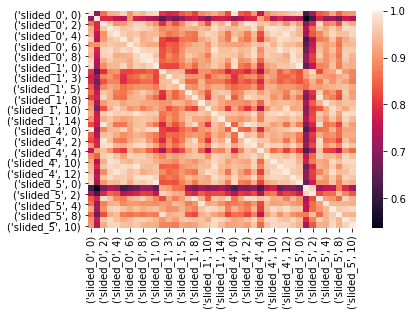

In [105]:
combSpec.plot_consensus_similarity()

It can already be seen that some classes are more similar to each other, than others.

Now the single slide/region clusters are reclustered.

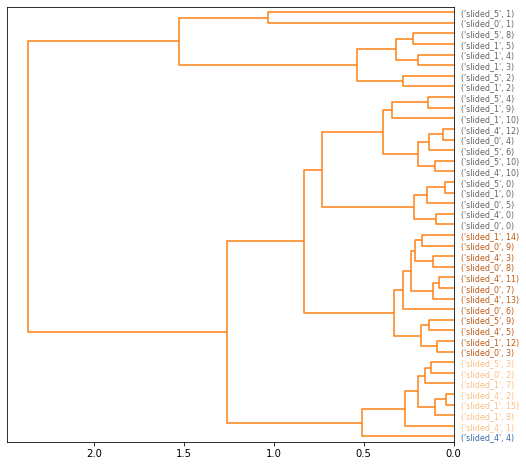

In [106]:
combSpec.cluster_concensus_spectra(number_of_clusters=10)

A detailed print out of the newly assigned cluster for each slide, region.

In [107]:
combSpec.region_cluster2cluster

{('slided_0', 0): 4,
 ('slided_0', 1): 9,
 ('slided_0', 2): 1,
 ('slided_0', 3): 3,
 ('slided_0', 4): 5,
 ('slided_0', 5): 4,
 ('slided_0', 6): 3,
 ('slided_0', 7): 3,
 ('slided_0', 8): 3,
 ('slided_0', 9): 3,
 ('slided_1', 0): 4,
 ('slided_1', 2): 7,
 ('slided_1', 3): 8,
 ('slided_1', 4): 8,
 ('slided_1', 5): 8,
 ('slided_1', 7): 1,
 ('slided_1', 8): 1,
 ('slided_1', 9): 6,
 ('slided_1', 10): 6,
 ('slided_1', 12): 3,
 ('slided_1', 14): 3,
 ('slided_1', 15): 1,
 ('slided_4', 0): 4,
 ('slided_4', 1): 1,
 ('slided_4', 2): 1,
 ('slided_4', 3): 3,
 ('slided_4', 4): 2,
 ('slided_4', 5): 3,
 ('slided_4', 10): 5,
 ('slided_4', 11): 3,
 ('slided_4', 12): 5,
 ('slided_4', 13): 3,
 ('slided_5', 0): 4,
 ('slided_5', 1): 10,
 ('slided_5', 2): 7,
 ('slided_5', 3): 1,
 ('slided_5', 4): 6,
 ('slided_5', 6): 5,
 ('slided_5', 8): 8,
 ('slided_5', 9): 3,
 ('slided_5', 10): 5}

{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4, 5.0: 5, 6.0: 6, 7.0: 7, 8.0: 8, 9.0: 9, 10.0: 10, 11.0: 11, 12.0: 12, 13.0: 13, 14.0: 14, 15.0: 15}


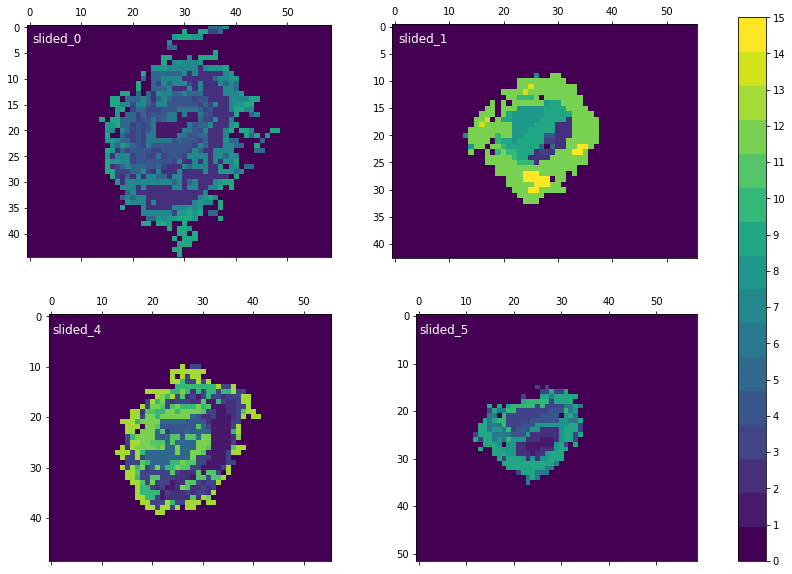

In [108]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_segments()
mpl.rcParams['figure.figsize'] = (6,4)

The new assignment can also be plotted:

{0: 4, 1: 9, 2: 1, 3: 3, 4: 5, 5: 4, 6: 3, 7: 3, 8: 3, 9: 3}
{0: 4, 2: 7, 3: 8, 4: 8, 5: 8, 7: 1, 8: 1, 9: 6, 10: 6, 12: 3, 14: 3, 15: 1}
{0: 4, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3, 10: 5, 11: 3, 12: 5, 13: 3}
{0: 4, 1: 10, 2: 7, 3: 1, 4: 6, 6: 5, 8: 8, 9: 3, 10: 5}
{1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0, 6.0: 6.0, 7.0: 7.0, 8.0: 8.0, 9.0: 9.0, 10.0: 10.0}


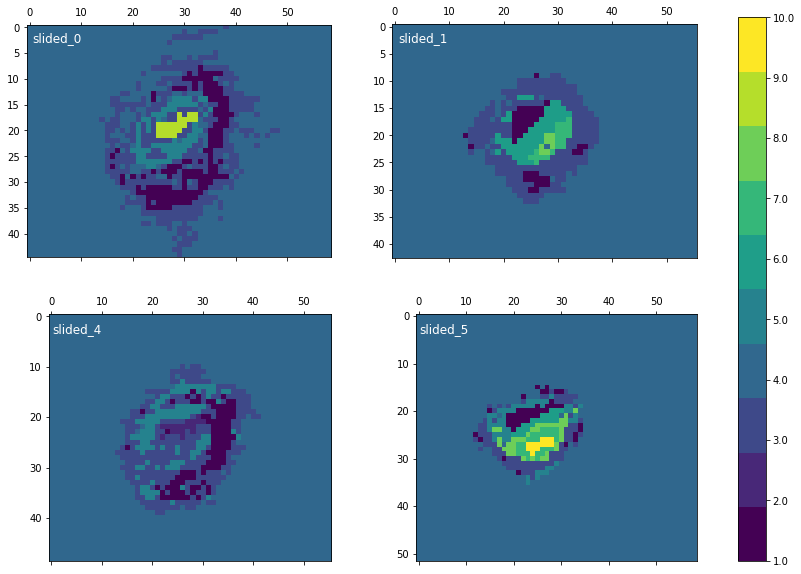

In [109]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_common_segments()
mpl.rcParams['figure.figsize'] = (6,4)

And of course, interpreted.

Slide 1 and Slide 5 appear to be similar, and slide 0 and slide 4.



{0: 4, 1: 9, 2: 1, 3: 3, 4: 5, 5: 4, 6: 3, 7: 3, 8: 3, 9: 3}
{0: 4, 2: 7, 3: 8, 4: 8, 5: 8, 7: 1, 8: 1, 9: 6, 10: 6, 12: 3, 14: 3, 15: 1}
{0: 4, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3, 10: 5, 11: 3, 12: 5, 13: 3}
{0: 4, 1: 10, 2: 7, 3: 1, 4: 6, 6: 5, 8: 8, 9: 3, 10: 5}
{1.0: 1.0, 2.0: 2.0}


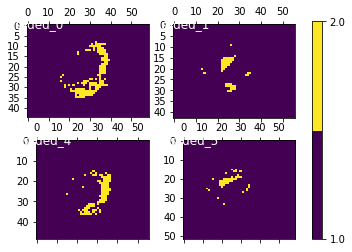

In [111]:
combSpec.plot_common_segments(highlight=(1))

Similar to a normal SpectraRegion, also specific masses can be plotted. Here we can see that mass 14954 is not present in slides 1 and 5!

2020-12-08 13:53:21,201  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2020-12-08 13:53:21,214  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2020-12-08 13:53:21,224  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581
2020-12-08 13:53:21,236  CombinedSpectra  INFO: Processing Mass 14954 with best existing mass 14954.46949644581


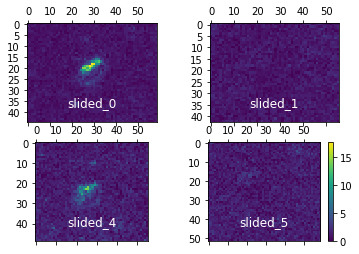

In [112]:
_ = combSpec.mass_heatmap(14954)

2020-12-08 13:54:49,622  CombinedSpectra  INFO: Calculating internormed regions
2020-12-08 13:54:49,630  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 13:54:51,331  SpectraRegion  INFO: Started Log Value: 0.3343200490092554
2020-12-08 13:54:52,082  SpectraRegion  INFO: Started Log Value: 0.32170055385276763
2020-12-08 13:54:52,772  SpectraRegion  INFO: Started Log Value: 0.3312306343086824
2020-12-08 13:54:53,594  SpectraRegion  INFO: Started Log Value: 0.320614515118952
2020-12-08 13:54:54,299  SpectraRegion  INFO: Started Log Value: 0.30915859935138906
2020-12-08 13:54:54,936  SpectraRegion  INFO: Started Log Value: 0.31603122722382837
2020-12-08 13:54:56,298  SpectraRegion  INFO: Started Log Value: 0.3340273363387298
2020-12-08 13:54:57,660  SpectraRegion  INFO: Started Log Value: 0.31153078419172886
2020-12-08 13:54:58,795  SpectraRegion  INFO: Started Log Value: 0.2943068333413746
2020-12-08 13:55:00,220  SpectraRegion  INFO: Started Log Value: 0.2923150758685397
2

['slided_0', 'slided_1', 'slided_4', 'slided_5']


2020-12-08 13:55:02,877  SpectraRegion  INFO: Started Log Value: 0.40915538512151384
2020-12-08 13:55:03,666  SpectraRegion  INFO: Started Log Value: 0.21768317594399453
2020-12-08 13:55:04,434  SpectraRegion  INFO: Started Log Value: 0.40578391776666056
2020-12-08 13:55:05,104  SpectraRegion  INFO: Started Log Value: 0.2680817984881987
2020-12-08 13:55:05,797  SpectraRegion  INFO: Started Log Value: 0.3340190774047601
2020-12-08 13:55:06,431  SpectraRegion  INFO: Started Log Value: 0.3721496187585815
2020-12-08 13:55:07,202  SpectraRegion  INFO: Started Log Value: 0.3819303633590355
2020-12-08 13:55:07,823  SpectraRegion  INFO: Started Log Value: 0.3506949750680124
2020-12-08 13:55:08,646  SpectraRegion  INFO: Started Log Value: 0.2048681579856626
2020-12-08 13:55:09,487  SpectraRegion  INFO: Started Log Value: 0.25678887274050494
2020-12-08 13:55:10,150  SpectraRegion  INFO: Started Log Value: 0.21044518130927384
2020-12-08 13:55:10,796  SpectraRegion  INFO: Started Log Value: 0.3519

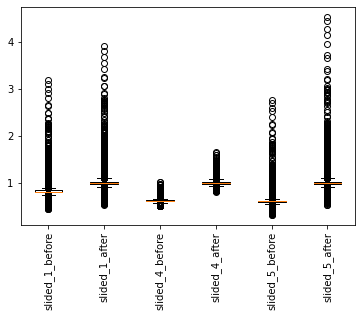

2020-12-08 13:55:51,056  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391
2020-12-08 13:55:51,072  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391
2020-12-08 13:55:51,087  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391
2020-12-08 13:55:51,103  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


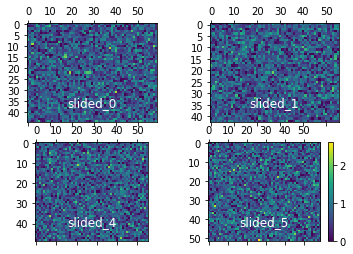

2020-12-08 13:55:51,416  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713
2020-12-08 13:55:51,430  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713
2020-12-08 13:55:51,445  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713
2020-12-08 13:55:51,460  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


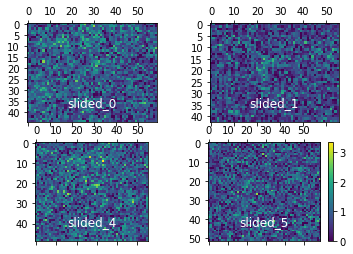

In [114]:
_ = combSpec.mass_heatmap(12476, scaled=True )
_ = combSpec.mass_heatmap(14195, scaled=True )

## A first DE Analysis: Tunica Media

Slide 0 cluster 2 and slide 4 cluster 1 seem to be very similar. We now want to see whether some differences can be observed.

For this, we suspect that slides 0 and 4 are disease-samples, and slides 1 and 5 are corresponding controls.

We now compare the outer regions of both samples:

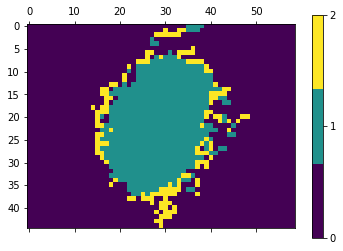

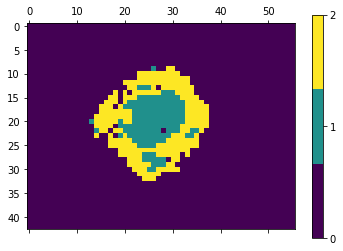

In [115]:
combSpec.regions["slided_0"].plot_segments(highlight=[8,9])
combSpec.regions["slided_1"].plot_segments(highlight=[12,14])

2020-12-08 13:57:09,192  SpectraRegion  INFO: Calculating consensus spectra
2020-12-08 13:57:10,767  SpectraRegion  INFO: Started Log Value: 0.3343200490092554
2020-12-08 13:57:11,313  SpectraRegion  INFO: Started Log Value: 0.32170055385276763
2020-12-08 13:57:11,850  SpectraRegion  INFO: Started Log Value: 0.3312306343086824
2020-12-08 13:57:12,366  SpectraRegion  INFO: Started Log Value: 0.320614515118952
2020-12-08 13:57:12,879  SpectraRegion  INFO: Started Log Value: 0.30915859935138906
2020-12-08 13:57:13,404  SpectraRegion  INFO: Started Log Value: 0.31603122722382837
2020-12-08 13:57:13,908  SpectraRegion  INFO: Started Log Value: 0.3340273363387298
2020-12-08 13:57:14,462  SpectraRegion  INFO: Started Log Value: 0.31153078419172886
2020-12-08 13:57:14,938  SpectraRegion  INFO: Started Log Value: 0.2943068333413746
2020-12-08 13:57:15,463  SpectraRegion  INFO: Started Log Value: 0.2923150758685397
2020-12-08 13:57:15,465  SpectraRegion  INFO: Calculating consensus spectra done


['slided_0', 'slided_1', 'slided_4', 'slided_5']


2020-12-08 13:57:16,991  SpectraRegion  INFO: Started Log Value: 0.40915538512151384
2020-12-08 13:57:17,523  SpectraRegion  INFO: Started Log Value: 0.21768317594399453
2020-12-08 13:57:18,193  SpectraRegion  INFO: Started Log Value: 0.40578391776666056
2020-12-08 13:57:18,842  SpectraRegion  INFO: Started Log Value: 0.2680817984881987
2020-12-08 13:57:19,565  SpectraRegion  INFO: Started Log Value: 0.3340190774047601
2020-12-08 13:57:20,225  SpectraRegion  INFO: Started Log Value: 0.3721496187585815
2020-12-08 13:57:21,401  SpectraRegion  INFO: Started Log Value: 0.3819303633590355
2020-12-08 13:57:22,515  SpectraRegion  INFO: Started Log Value: 0.3506949750680124
2020-12-08 13:57:23,642  SpectraRegion  INFO: Started Log Value: 0.2048681579856626
2020-12-08 13:57:24,737  SpectraRegion  INFO: Started Log Value: 0.25678887274050494
2020-12-08 13:57:25,897  SpectraRegion  INFO: Started Log Value: 0.21044518130927384
2020-12-08 13:57:26,912  SpectraRegion  INFO: Started Log Value: 0.3519

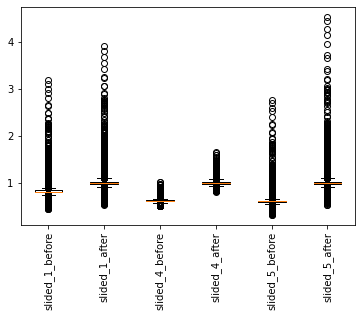

In [116]:
combSpec.get_internormed_regions()

2020-12-08 13:58:44,402  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


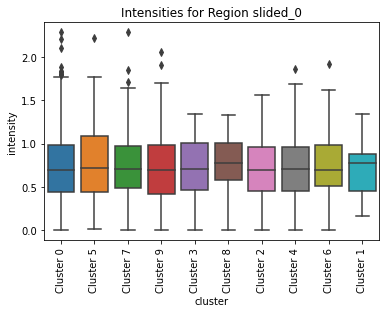

2020-12-08 13:58:44,713  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


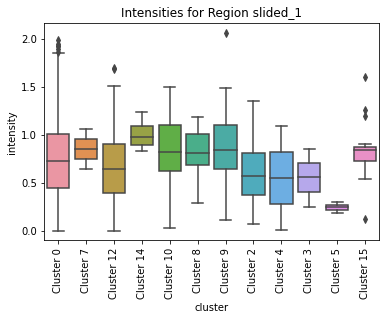

2020-12-08 13:58:44,945  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


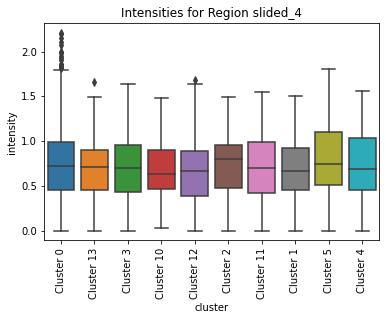

2020-12-08 13:58:45,134  CombinedSpectra  INFO: Processing Mass 12476 with best existing mass 12476.472760167391


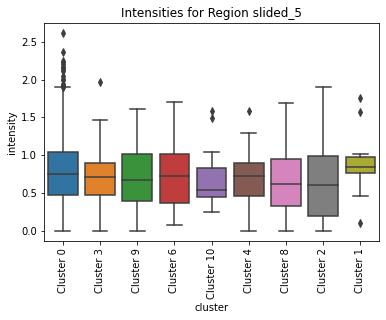

In [118]:
_ = combSpec.mass_intensity(12476, scaled=True )_ = combSpec.mass_intensity(14195, scaled=True )

2020-12-08 13:58:50,107  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


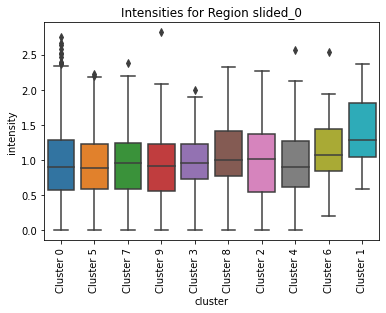

2020-12-08 13:58:50,276  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


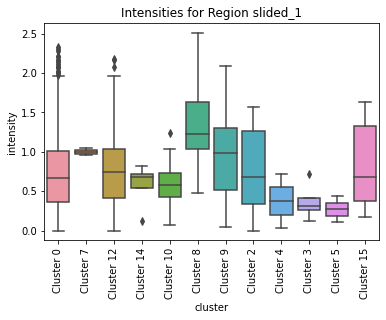

2020-12-08 13:58:50,460  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


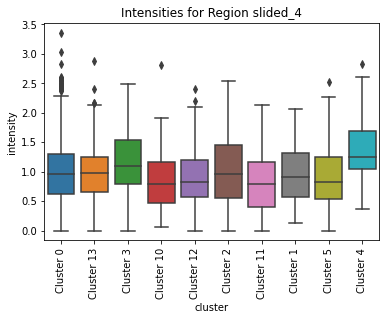

2020-12-08 13:58:50,646  CombinedSpectra  INFO: Processing Mass 14195 with best existing mass 14195.375490143713


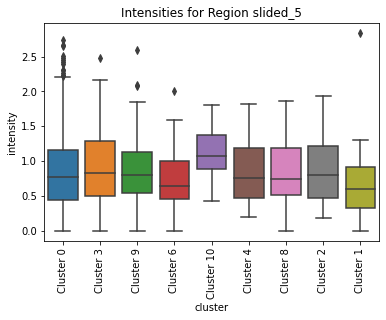

In [119]:
_ = combSpec.mass_intensity(14195, scaled=True )

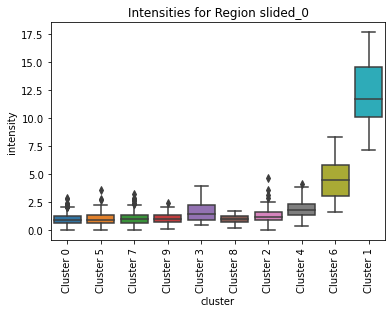

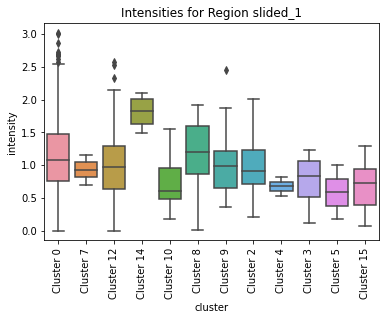

In [159]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=False)

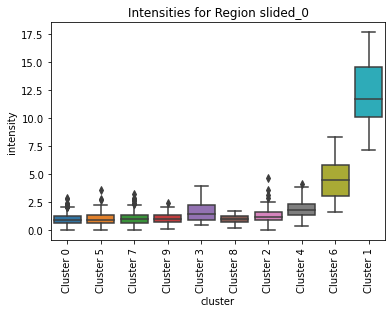

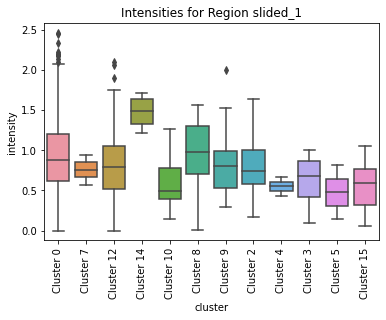

In [160]:
combSpec.mass_intensity(14954, regions=["slided_0", "slided_1"], scaled=True)

In [161]:
resdf, expr, pdata = combSpec.find_markers("slided_0", [8,9], "slided_1", [12,14], pw, scaled=True)

100% |########################################################################|
100% |########################################################################|


Running slided_0 [8, 9] against slided_1 [12, 14]


100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [162]:
combSpec.list_de_results()

[('ttest', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('rank', ('slided_0', (8, 9), 'slided_1', (12, 14)))]

In [163]:
mydf = resdf["ttest"][('slided_0', (8,9,), 'slided_1', (12,14,))]

In order to plot a volcano plot for the differential masses/proteins, the result DF is subset to only have masses displayed that have a mean intensity of at least 2.

In [164]:
from adjustText import adjust_text

In [168]:
pd.set_option('display.max_rows', 200)
mydf.to_csv("slide.d.0.8_9.1.12_14.tsv", sep="\t")
mydf

clusterID               gene_ident     gene_mass     gene  protein_mass  \
0     slided_0  mass_3073_0637079439844   3073.063708     Wbp1     3075.2865   
1     slided_0  mass_3074_5728411573086   3074.572841     Wbp1     3075.2865   
2     slided_0  mass_3159_0843011034667   3159.084301    Apoc1     3160.8824   
3     slided_0   mass_3160_593434316791   3160.593434    Apoc1     3160.8824   
4     slided_0   mass_3204_358297503194   3204.358298  Gm15517     3206.7303   
...        ...                      ...           ...      ...           ...   
1869  slided_0  mass_22500_135563067066  22500.135563   Prokr2    22498.7264   
1870  slided_0   mass_22501_64469628039  22501.644696     Rgs3    22500.8204   
1871  slided_0   mass_22501_64469628039  22501.644696      Ung    22499.4102   
1872  slided_0   mass_22501_64469628039  22501.644696    Rab7b    22501.7148   
1873  slided_0   mass_22501_64469628039  22501.644696   Prokr2    22498.7264   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
0      0.798156  2.632832e-13  144   144  0.868847  0.778237     226      226   
1      0.699253  1.542441e-07  144   140  0.674708  0.515430     226      224   
2      0.941058  9.188135e-16  144   143  0.836511  0.747366     226      225   
3      0.848302  2.901802e-10  144   144  0.629606  0.494921     226      226   
4      0.555092  5.588114e-05  144   141  0.718643  0.681819     226      219   
...         ...           ...  ...   ...       ...       ...     ...      ...   
1869   0.516243  8.714256e-12  144   143  0.598674  0.598796     226      225   
1870   0.501867  3.636873e-11  144   141  0.578787  0.598140     226      225   
1871   0.501867  3.636873e-11  144   141  0.578787  0.598140     226      225   
1872   0.501867  3.636873e-11  144   141  0.578787  0.598140     226      225   
1873   0.501867  3.636873e-11  144   141  0.578787  0.598140     226      225   

       mean_bg  median_bg  
0     1.510819   1.353640  
1     1.095499   0.900905  
2     1.606048   1.453093  
3     1.133530   1.013287  
4     1.055874   0.897762  
...        ...        ...  
1869  0.856240   0.847964  
1870  0.819588   0.829204  
1871  0.819588   0.829204  
1872  0.819588   0.829204  
1873  0.819588   0.829204  

[1874 rows x 15 columns]

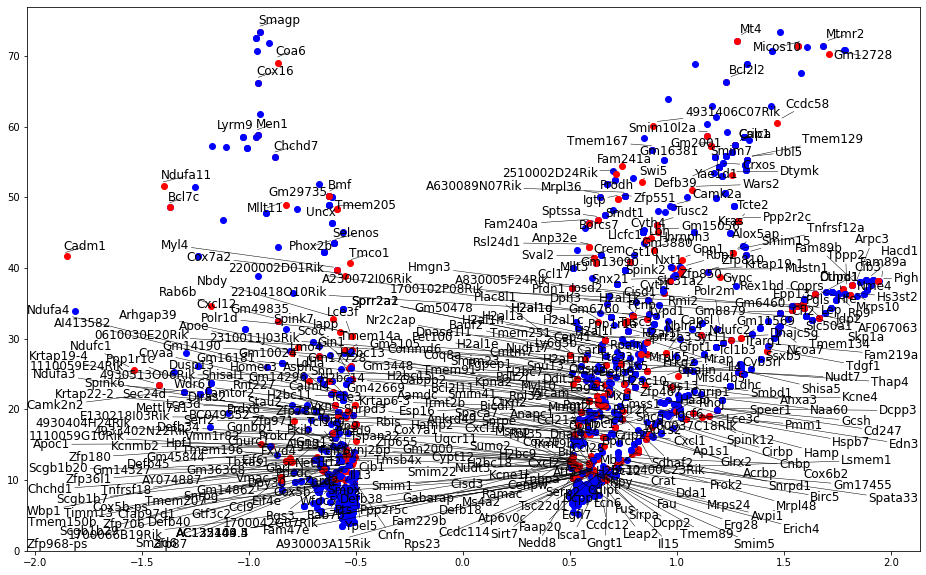

In [166]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf["avg_logFC"]), list(-np.log10(mydf["qvalue"])))]
dotgene = list(mydf["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

![title](https://medicalartlibrary.com/wp-content/uploads/atherosclerosis-renal.jpg)

In this comparison the tunica media of atherosclerotic (slided_0) and control (slided_1) aorta was compared.
It must be noted, that the selected regions are considerably thicker in slided_1 compared to slided_0, but it is a known phenomenon that "The media underlying intimal athero- sclerotic plaque is considerably thinner" (Milutinović, A., Šuput, D., & Zorc-Pleskovič, R. (2020). Pathogenesis of atherosclerosis in the tunica intima, media, and adventitia of coronary arteries: An updated review. In Bosnian Journal of Basic Medical Sciences (Vol. 20, Issue 1, pp. 21–30). Association of Basic Medical Sciences of FBIH. https://doi.org/10.17305/bjbms.2019.4320 ).

However, due to the proximity to the background tissue (liver), for each mass it should be checked whether this mass is not also prevalent in the background tissue and therefore is present in the cluster due to diffusion, bad clustering, or other reasons. The mass_heatmap-function give a good and fast overview!

#### Tmsb4x -
First it is very interesting to see a difference in Tmsb4x between the (suspected) control and disease aortas.
The diseased-aorta-media has significantly less Tmsb4x (-0.5).
This is not surprising, but was already found 5 years ago ( Zaima, N., Sasaki, T., Tanaka, H., Cheng, X. W., Onoue, K., Hayasaka, T., Goto-Inoue, N., Enomoto, H., Unno, N., Kuzuya, M., & Setou, M. (2011). Imaging mass spectrometry-based histopathologic examination of atherosclerotic lesions. Atherosclerosis, 217(2), 427–432. https://doi.org/10.1016/j.atherosclerosis.2011.03.044 ). Indeed, this can be seen as proof-of-concept.

#### Ptges3 + // no

On the contrary, there are other proteins, which are up-regulated in the atherosclerotic aorta.
Among these is Ptges3 (+1.25), which was shown to be involved in the inflammatory response of bovine endometrial epithelial cells.
Almughlliq, F. B., Koh, Y. Q., Peiris, H. N., Vaswani, K., Arachchige, B. J., Reed, S., & Mitchell, M. D. (2018). Eicosanoid pathway expression in bovine endometrial epithelial and stromal cells in response to lipopolysaccharide, interleukin 1 beta, and tumor necrosis factor alpha. Reproductive Biology, 18(4), 390–396. https://doi.org/10.1016/j.repbio.2018.10.001

Further proteins of interest include

#### Chchd4 + // no
Chchd4 was already identified as a biomarker for chronic obstructive pulmonary disease (COPD), a chronic inflammatory disease - in such, maybe? comparable to atherosclerosis.
Chchd4 affects the mitochondrial metabolism, being named in the p53-axis controlling tumor proliferation.

Maghsoudloo, M., Azimzadeh Jamalkandi, S., Najafi, A., & Masoudi-Nejad, A. (2020). An efficient hybrid feature selection method to identify potential biomarkers in common chronic lung inflammatory diseases. Genomics, 112(5), 3284–3293. https://doi.org/10.1016/j.ygeno.2020.06.010

#### Coa6 --

The respiratory metabolism appears to play an important role in atherosclerosis. Many regulated proteins fall into this category.
A Coa6 deficiency is known to be causing many disease phenotypes, including cardiomyopathy, encephalomyopathy, skeletal muscle myopathy, Leigh syndrome, metabolic acidosis and occasional hepatic failure.
In summary: Coa6 deficiency does not contribute to a healthy Aorta.

Ghosh, A., Trivedi, P. P., Timbalia, S. A., Griffin, A. T., Rahn, J. J., Chan, S. S. L., & Gohil, V. M. (2014). Copper supplementation restores cytochrome c oxidase assembly defect in a mitochondrial disease model of COA6 deficiency. Human Molecular Genetics, 23(13), 3596–3606. https://doi.org/10.1093/hmg/ddu069

#### Cst3 +

Serum Cystein3 is associated with subclinical atherosclerosis, which can also be seen in the middle of the IMS aorta. It also does not seem unlikely, that Cst3 is elsewhere upregulated in atherosclerotic aorta.

Chung, Y. K., Lee, Y. J., Kim, K. W., Cho, R. K., Chung, S. M., Moon, J. S., Yoon, J. S., Won, K. C., & Lee, H. W. (2018). Serum cystatin C is associated with subclinical atherosclerosis in patients with type 2 diabetes: A retrospective study. Diabetes and Vascular Disease Research, 15(1), 24–30. https://doi.org/10.1177/1479164117738156

#### Ndufa11 +, Cox7a2 -

This proteins is of interesting, and together with other identified proteins ( like Cox7a2 ), is part of the mitochondria.
Atherosclerosis therefore might have an effect on the energy metabolism, similar to an ischemic stroke: James, R., Searcy, J. L., Le Bihan, T., Martin, S. F., Gliddon, C. M., Povey, J., Deighton, R. F., Kerr, L. E., McCulloch, J., & Horsburgh, K. (2012). Proteomic analysis of mitochondria in APOE transgenic mice and in response to an ischemic challenge. Journal of Cerebral Blood Flow and Metabolism, 32(1), 164–176. https://doi.org/10.1038/jcbfm.2011.120 

#### Ndufb6 +

Ndufb6 was identified to being critical for the development of PM2.5-induced fibrosis in mouse lungs. Therefore it is likely related to inflammatory processes.

Han, X., Liu, H., Zhang, Z., Yang, W., Wu, C., Liu, X., Zhang, F., Sun, B., Zhao, Y., Jiang, G., Yang, Y. G., & Ding, W. (2020). Epitranscriptomic 5-Methylcytosine Profile in PM2.5-induced Mouse Pulmonary Fibrosis. Genomics, Proteomics and Bioinformatics, 18(1), 41–51. https://doi.org/10.1016/j.gpb.2019.11.005



In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Tmsb4x"), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Tmsb4x"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
for gene in np.unique(mydf["gene"]):
    print(gene)
    _ = combSpec.mass_heatmap(pw.protein2mass.get(gene), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Ptges3"), regions=["slided_0", "slided_1"], scaled=True)

In [325]:

slided_0_outer_regions = tuple(sorted([x for x in np.unique(slided_0.segmented) if x > 0 and not x in [1,3,4,6]]))
slided_1_outer_regions = tuple(sorted([x for x in np.unique(slided_1.segmented) if x > 0 and not x in [2,3,7,8,9]]))

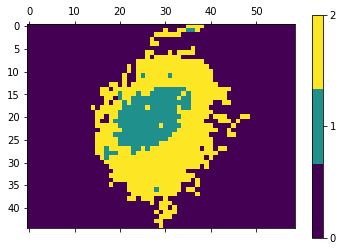

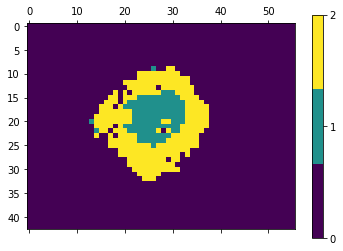

In [326]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_outer_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_outer_regions)

In [327]:
resdf_outer, expr, pdata = combSpec.find_markers("slided_0", slided_0_outer_regions, "slided_1", slided_1_outer_regions, pw, scaled=True)

100% |########################################################################|


Running slided_0 (2, 5, 7, 8, 9) against slided_1 (4, 5, 10, 12, 14, 15)


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [328]:
mydf_outer = resdf_outer["ttest"][('slided_0', slided_0_outer_regions, 'slided_1', slided_1_outer_regions)]
mydf_outer.to_csv("slide.d.0.{}.1.{}.tsv".format("_".join([str(x) for x in slided_0_outer_regions]), "_".join([str(x) for x in slided_1_outer_regions])), sep="\t")
mydf_outer

clusterID               gene_ident     gene_mass    gene  protein_mass  \
0    slided_0  mass_3159_0843011034667   3159.084301   Apoc1     3160.8824   
1    slided_0   mass_3160_593434316791   3160.593434   Apoc1     3160.8824   
2    slided_0  mass_3344_7076863423495   3344.707686   Anxa3     3347.6387   
3    slided_0  mass_3346_2168195556737   3346.216820   Anxa3     3347.6387   
4    slided_0   mass_3347_725952768998   3347.725953   Anxa3     3347.6387   
..        ...                      ...           ...     ...           ...   
640  slided_0   mass_18731_82992939641  18731.829929    Rhoj    18730.1821   
641  slided_0   mass_18731_82992939641  18731.829929   Ap1s1    18732.7742   
642  slided_0  mass_18733_339062609735  18733.339063  Speer1    18733.0994   
643  slided_0  mass_18733_339062609735  18733.339063   Ap1s1    18732.7742   
644  slided_0  mass_18733_339062609735  18733.339063   Glrx2    18736.1575   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
0     0.781821  2.897855e-19  555   545  0.940194  0.799049     260      259   
1     0.721799  8.669578e-13  555   555  0.677479  0.514346     260      260   
2    -0.794451  1.098320e-43  555   554  2.786782  2.702099     260      255   
3    -0.900115  8.388295e-64  555   555  3.576281  3.387264     260      260   
4    -0.788220  1.250035e-54  555   555  3.626491  3.440319     260      260   
..         ...           ...  ...   ...       ...       ...     ...      ...   
640  -0.547629  5.162496e-17  555   546  0.689593  0.628841     260      253   
641  -0.547629  5.162496e-17  555   546  0.689593  0.628841     260      253   
642  -0.524069  2.313169e-15  555   548  0.663450  0.604091     260      250   
643  -0.524069  2.313169e-15  555   548  0.663450  0.604091     260      250   
644  -0.524069  2.313169e-15  555   548  0.663450  0.604091     260      250   

      mean_bg  median_bg  
0    1.616474   1.473668  
1    1.117324   1.000060  
2    1.606754   1.587879  
3    1.916329   1.868496  
4    2.099950   2.056836  
..        ...        ...  
640  0.471780   0.430807  
641  0.471780   0.430807  
642  0.461368   0.424943  
643  0.461368   0.424943  
644  0.461368   0.424943  

[645 rows x 15 columns]

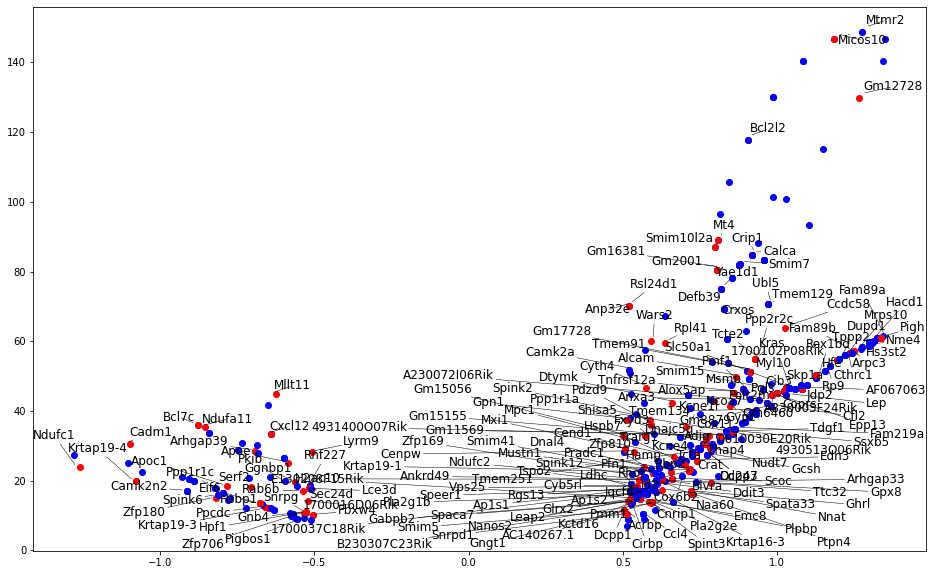

In [329]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_outer["avg_logFC"]), list(-np.log10(mydf_outer["qvalue"])))]
dotgene = list(mydf_outer["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

## Another DE Analysis: whole Aorta

Having spotted several differences between the Tunica media of atherosclerotic and suspected healthy aorta, a full comparison might also be of interest.

For this, all slided_0 and slided_1 regions are compared  - with the exception of the backgrounds.

In [169]:
slided_0_regions = tuple(sorted([x for x in np.unique(slided_0.segmented) if x > 0]))
slided_1_regions = tuple(sorted([x for x in np.unique(slided_1.segmented) if x > 0]))

In [171]:
print(slided_0_regions, slided_1_regions)

(1, 2, 3, 4, 5, 6, 7, 8, 9) (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15)


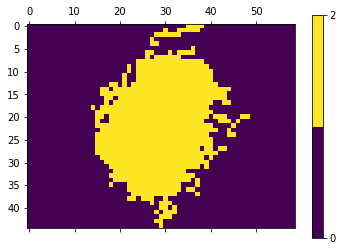

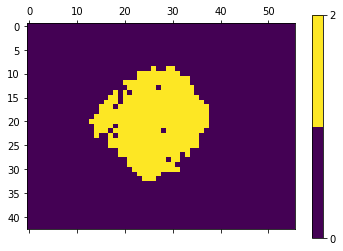

In [172]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_regions)

In [173]:
resdf_all, expr, pdata = combSpec.find_markers("slided_0", slided_0_regions, "slided_1", slided_1_regions, pw, scaled=True)

100% |########################################################################|
100% |########################################################################|


Running slided_0 (1, 2, 3, 4, 5, 6, 7, 8, 9) against slided_1 (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15)


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |##################################

In [174]:
combSpec.list_de_results()

[('ttest', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('ttest',
  ('slided_0',
   (1, 2, 3, 4, 5, 6, 7, 8, 9),
   'slided_1',
   (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15))),
 ('rank', ('slided_0', (8, 9), 'slided_1', (12, 14))),
 ('rank',
  ('slided_0',
   (1, 2, 3, 4, 5, 6, 7, 8, 9),
   'slided_1',
   (2, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15)))]

In [178]:
mydf_all = resdf_all["ttest"][('slided_0', slided_0_regions, 'slided_1', slided_1_regions)]
mydf_all.to_csv("slide.d.0.{}.1.{}.tsv".format("_".join([str(x) for x in slided_0_regions]), "_".join([str(x) for x in slided_1_regions])), sep="\t")
mydf_all

clusterID               gene_ident     gene_mass     gene  protein_mass  \
0    slided_0  mass_3159_0843011034667   3159.084301    Apoc1     3160.8824   
1    slided_0   mass_3160_593434316791   3160.593434    Apoc1     3160.8824   
2    slided_0  mass_3344_7076863423495   3344.707686    Anxa3     3347.6387   
3    slided_0  mass_3346_2168195556737   3346.216820    Anxa3     3347.6387   
4    slided_0   mass_3347_725952768998   3347.725953    Anxa3     3347.6387   
..        ...                      ...           ...      ...           ...   
935  slided_0  mass_18719_756863689814  18719.756864   Trarg1    18718.4288   
936  slided_0  mass_18719_756863689814  18719.756864  Tmem251    18719.6954   
937  slided_0  mass_18719_756863689814  18719.756864  Ppp1r1a    18717.5601   
938  slided_0   mass_18721_26599690314  18721.265997   Trarg1    18718.4288   
939  slided_0   mass_18721_26599690314  18721.265997  Tmem251    18719.6954   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
0     0.680250  8.221092e-21  725   712  0.962409  0.813854     365      364   
1     0.613003  4.988520e-13  725   725  0.698345  0.520187     365      365   
2    -0.913244  2.590133e-71  725   724  3.126189  2.960678     365      360   
3    -1.038861  2.554603e-94  725   725  4.097391  3.762175     365      365   
4    -0.947986  9.730307e-80  725   725  4.186800  3.830994     365      365   
..         ...           ...  ...   ...       ...       ...     ...      ...   
935  -0.572723  9.085630e-24  725   723  0.978356  0.830815     365      359   
936  -0.572723  9.085630e-24  725   723  0.978356  0.830815     365      359   
937  -0.572723  9.085630e-24  725   723  0.978356  0.830815     365      359   
938  -0.531917  1.742333e-21  725   722  0.916710  0.785938     365      359   
939  -0.531917  1.742333e-21  725   722  0.916710  0.785938     365      359   

      mean_bg  median_bg  
0    1.542179   1.447941  
1    1.068078   0.928430  
2    1.659974   1.633037  
3    1.994245   1.928277  
4    2.170251   2.112606  
..        ...        ...  
935  0.657795   0.625140  
936  0.657795   0.625140  
937  0.657795   0.625140  
938  0.634029   0.610270  
939  0.634029   0.610270  

[940 rows x 15 columns]

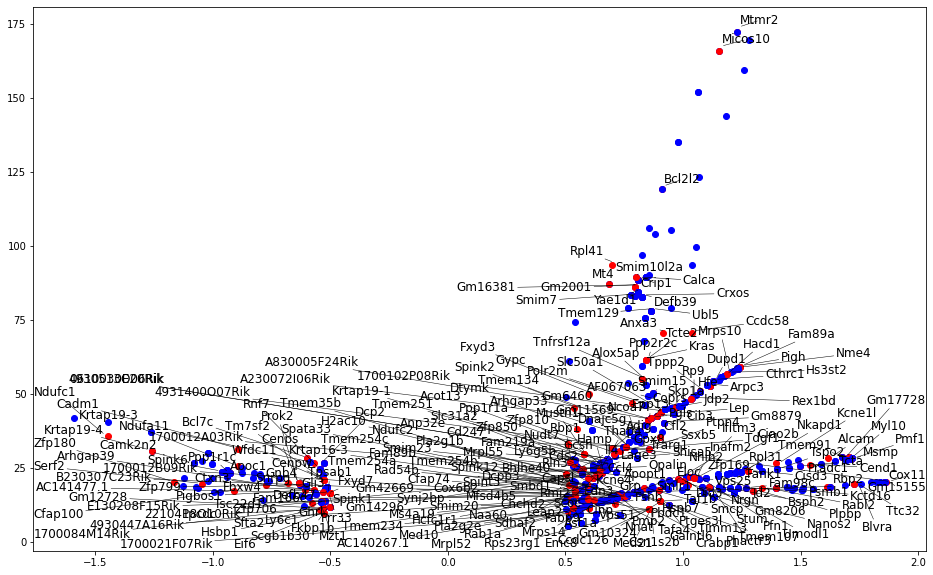

In [179]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_all["avg_logFC"]), list(-np.log10(mydf_all["qvalue"])))]
dotgene = list(mydf_all["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

In [315]:
from collections import Counter

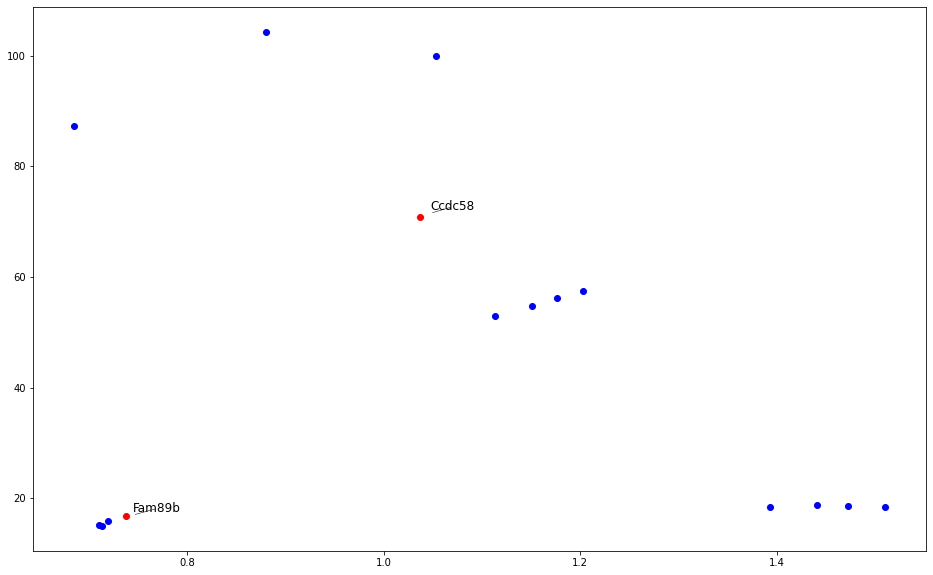

In [321]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_all["avg_logFC"]), list(-np.log10(mydf_all["qvalue"])))]
dotgene = list(mydf_all["gene"])
texts = []
seenProts = set()

ralfrelgenes = [x[0] for x in Counter(mydf_all["gene"].to_list()).most_common(2)]

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in ralfrelgenes:
        continue
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

The comparison of both aorta results again in several differential proteins.

Again, several proteins involved in the respiratory metabolism are listed, like Ndufc2, Ndufa11.

Of interest here are Ifitm3, Ccdc126 and Ubl5, which are all located in the inner part of the aorta.

#### Ifitm3

Known gene involved in the innate immune system (T cells): Yánez, D. C., Ross, S., & Crompton, T. (2020). The IFITM protein family in adaptive immunity. In Immunology (Vol. 159, Issue 4, pp. 365–372). Blackwell Publishing Ltd. https://doi.org/10.1111/imm.13163

Ifitm3 is involved in the plaque uptake in Alzheimer's disease: Hur, J. Y., Frost, G. R., Wu, X., Crump, C., Pan, S. J., Wong, E., Barros, M., Li, T., Nie, P., Zhai, Y., Wang, J. C., Tcw, J., Guo, L., McKenzie, A., Ming, C., Zhou, X., Wang, M., Sagi, Y., Renton, A. E., … Li, Y. M. (2020). The innate immunity protein IFITM3 modulates γ-secretase in Alzheimer’s disease. Nature, 1–6. https://doi.org/10.1038/s41586-020-2681-2


#### Mrps14

Mrps14 effects the mitochondrial translation. 
Hence, again, a disturbation of mitochondrial work can be observed.

Jackson, C. B., Huemer, M., Bolognini, R., Martin, F., Szinnai, G., Donner, B. C., Richter, U., Battersby, B. J., Nuoffer, J. M., Suomalainen, A., & Schaller, A. (2019). A variant in MRPS14 (uS14m) causes perinatal hypertrophic cardiomyopathy with neonatal lactic acidosis, growth retardation, dysmorphic features and neurological involvement. Human Molecular Genetics, 28(4), 639–649. https://doi.org/10.1093/hmg/ddy374

#### Acot13

In chicken it was observed that an Acot13 decreases works as inhibitor during Preadipocytes Differentiation.
Hence, an upregulation of Acot13 leads to an increase in preadipocyte differentiation, which also plays a role in plaque formation.


In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ifitm3"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Mrps14"), scaled=True)
_ = combSpec.mass_heatmap(pw.protein2mass.get("Acot13"), scaled=True)

In [ ]:
for x in set(mydf_all["gene"]):
    print(x)
    _ = combSpec.mass_heatmap(pw.protein2mass.get(x), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Ccdc126"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
combSpec.regions["slided_0"].plot_segments(highlight=1)

In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Ccdc126"), scaled=True)

In [ ]:
combSpec.mass_intensity(pw.protein2mass.get("Hsbp1"), regions=["slided_0", "slided_1"], scaled=True)

In [ ]:
_ = combSpec.mass_heatmap(pw.protein2mass.get("Hsbp1"), scaled=True)

## The core DE

In [180]:
slided_0_inner_regions = tuple([1,3,4,6])
slided_1_inner_regions = tuple([2,3,7,8,9])

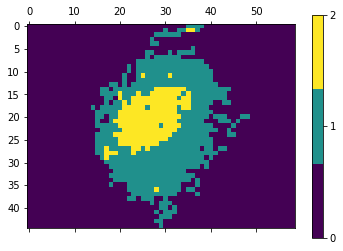

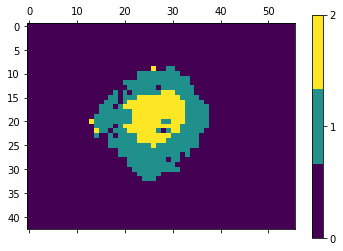

In [181]:
combSpec.regions["slided_0"].plot_segments(highlight=slided_0_inner_regions)
combSpec.regions["slided_1"].plot_segments(highlight=slided_1_inner_regions)

In [182]:
resdf_inner, expr, pdata = combSpec.find_markers("slided_0", slided_0_inner_regions, "slided_1", slided_1_inner_regions, pw, scaled=True)

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


Running slided_0 (1, 3, 4, 6) against slided_1 (2, 3, 7, 8, 9)


100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [183]:
mydf_inner = resdf_inner["ttest"][('slided_0', slided_0_inner_regions, 'slided_1', slided_1_inner_regions)]
mydf_inner.to_csv("slide.d.0.{}.1.{}.tsv".format("_".join([str(x) for x in slided_0_inner_regions]), "_".join([str(x) for x in slided_1_inner_regions])), sep="\t")
mydf_inner

clusterID               gene_ident     gene_mass     gene  protein_mass  \
0     slided_0  mass_3168_1391003834124   3168.139100  Gm37419     3170.2332   
1     slided_0  mass_3344_7076863423495   3344.707686    Anxa3     3347.6387   
2     slided_0  mass_3346_2168195556737   3346.216820    Anxa3     3347.6387   
3     slided_0   mass_3347_725952768998   3347.725953    Anxa3     3347.6387   
4     slided_0  mass_3349_2350859823223   3349.235086    Anxa3     3347.6387   
...        ...                      ...           ...      ...           ...   
1552  slided_0  mass_21789_333819591342  21789.333820    Tex35    21788.9673   
1553  slided_0  mass_21790_842952804665  21790.842953     Cfc1    21791.8199   
1554  slided_0  mass_21790_842952804665  21790.842953    Tex35    21788.9673   
1555  slided_0  mass_21792_352086017992  21792.352086     Cfc1    21791.8199   
1556  slided_0  mass_21792_352086017992  21792.352086  Gm45261    21793.8471   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
0     -0.519265  1.911833e-06  170   170  2.320960  2.251418     105      105   
1     -1.240733  2.543278e-33  170   170  4.234252  3.955380     105      105   
2     -1.406647  1.822066e-39  170   170  5.798659  5.367957     105      105   
3     -1.359639  7.231244e-35  170   170  6.016047  5.479940     105      105   
4     -1.193305  1.436044e-27  170   170  5.216864  4.955850     105      105   
...         ...           ...  ...   ...       ...       ...     ...      ...   
1552  -0.531405  1.300620e-06  170   169  0.622656  0.619492     105      100   
1553  -0.531590  1.018200e-06  170   170  0.633529  0.628219     105      102   
1554  -0.531590  1.018200e-06  170   170  0.633529  0.628219     105      102   
1555  -0.524315  9.146410e-07  170   168  0.653945  0.637684     105      103   
1556  -0.524315  9.146410e-07  170   168  0.653945  0.637684     105      103   

       mean_bg  median_bg  
0     1.619397   1.395893  
1     1.791756   1.713340  
2     2.187179   1.995274  
3     2.344332   2.298958  
4     2.281335   2.083659  
...        ...        ...  
1552  0.430804   0.461318  
1553  0.438271   0.475685  
1554  0.438271   0.475685  
1555  0.454681   0.471876  
1556  0.454681   0.471876  

[1557 rows x 15 columns]

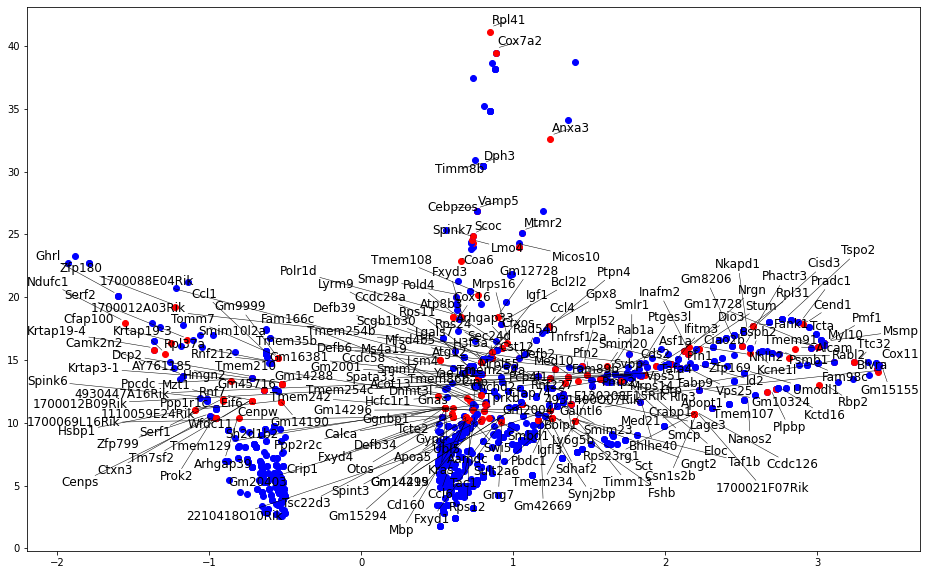

In [184]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-mydf_inner["avg_logFC"]), list(-np.log10(mydf_inner["qvalue"])))]
dotgene = list(mydf_inner["gene"])
texts = []
seenProts = set()

for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()

Again the same candidates as previously shown can be seen.

Mrps14, Ccdc126, Ndufa11 - which mostly relate to mitochondrial activity.


#### Timm8b
Likewise is Timm8b significantly upregulated.

Timm8b is found to be upregulated in colon mucosa cardinogenesis of diabetes type 2 patients, and is associated with mitochondrial dysfunction.
A similar pattern might be observable in atherosclerosis as well.

Del Puerto-Nevado, L., Santiago-Hernandez, A., Solanes-Casado, S., Gonzalez, N., Ricote, M., Corton, M., Prieto, I., Mas, S., Sanz, A. B., Aguilera, O., Gomez-Guerrero, C., Ayuso, C., Ortiz, A., Rojo, F., Egido, J., Garcia-Foncillas, J., Minguez, P., & Alvarez-Llamas, G. (2019). Diabetes-mediated promotion of colon mucosa carcinogenesis is associated with mitochondrial dysfunction. Molecular Oncology, 13(9), 1887–1897. https://doi.org/10.1002/1878-0261.12531

## GO analysis for plaque-DE experiment

In [ ]:
! wget http://ftp.ebi.ac.uk//pub/databases/GO/goa/HUMAN/goa_human.gaf.gz

In [ ]:
! wget 'http://purl.obolibrary.org/obo/go/go-basic.obo'

In [185]:
import gzip
import Bio.UniProt.GOA as GOA
from goatools.go_enrichment import GOEnrichmentStudy
from goatools import obo_parser

goa_human = "goa_human.gaf.gz"

# File is a gunzip file, so we need to open it in this way
with gzip.open(goa_human, 'rt') as arab_gaf_fp:
    human_funcs = {}  # Initialise the dictionary of functions
    
    # Iterate on each function using Bio.UniProt.GOA library.
    for entry in GOA.gafiterator(arab_gaf_fp):
        uniprot_id = entry.pop('DB_Object_Symbol')
        human_funcs[uniprot_id] = entry

        
go = obo_parser.GODag("go-basic.obo")


go-basic.obo: fmt(1.2) rel(2020-09-10) 47,314 GO Terms


In [186]:
for i,x in enumerate(human_funcs):
    if x.startswith("CCL"):
        print(i,x, human_funcs[x])
        break

1149 CCL24 {'DB': 'UniProtKB', 'DB_Object_ID': 'O00175', 'Qualifier': [''], 'GO_ID': 'GO:2000418', 'DB:Reference': ['GO_REF:0000107'], 'Evidence': 'IEA', 'With': ['UniProtKB:Q9JKC0', 'ensembl:ENSMUSP00000004936'], 'Aspect': 'P', 'DB_Object_Name': 'C-C motif chemokine 24', 'Synonym': ['CCL24', 'MPIF2', 'SCYA24'], 'DB_Object_Type': 'protein', 'Taxon_ID': ['taxon:9606'], 'Date': '20200714', 'Assigned_By': 'Ensembl', 'Annotation_Extension': '', 'Gene_Product_Form_ID': ''}


In [189]:

pop = [x.upper() for x in pw_theo.protein2mass]
assoc = {}

for x in human_funcs:
    if x not in assoc:
        assoc[x] = set()
    assoc[x].add(str(human_funcs[x]['GO_ID']))

methods = ["bonferroni", "fdr"]



In [200]:
study = list(set([x.upper() for x in mydf_inner["gene"]])) #mydf_all

In [201]:
len(study)

451

In [202]:
g = GOEnrichmentStudy(pop, assoc, go,
                         propagate_counts=False,
                         alpha=0.05,
                         methods=['bonferroni', 'fdr_bh'])

g_res = g.run_study(study)




Load GOEA Gene Ontology Analysis ...
 69%  5,014 of  7,283 population items found in association

Run GOEA Gene Ontology Analysis: current study set of 451 IDs ... 71%    319 of    451 study items found in association
100%    451 of    451 study items found in population(7283)
Calculating 5,038 uncorrected p-values using fisher
   5,038 GO terms are associated with  5,014 of  7,283 population items
   1,122 GO terms are associated with    319 of    451 study items
  METHOD bonferroni:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): local bonferroni
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)
  METHOD fdr_bh:
       0 GO terms found significant (< 0.05=alpha) (  0 enriched +   0 purified): statsmodels fdr_bh
       0 study items associated with significant GO IDs (enriched)
       0 study items associated with significant GO IDs (purified)


In [203]:
for x in sorted(g_res, key=lambda x: (x.study_count, -x.p_uncorrected), reverse=True):
    if x.study_count > 10:
        print(x.study_count, x)

184 GO:0008150	BP	e	biological_process            	184/451	2651/7283	0.0487	0	184	1	1	AAMDC, ACOT13, AICDA, ALOX5AP, ANAPC13, ANP32E, ANXA3, ARHGAP33, ARHGAP39, ASF1A, ATG12, ATP6V0C, AVPI1, BBIP1, BCL2L2, BCL7B, CACFD1, CALCA, CCDC114, CCK, CCL1, CCL4, CD160, CDS2, CENPW, CFAP100, CFAP74, CHCHD2, CHCHD4, CIAO2B, CINP, CISD3, COA6, COX11, COX16, COX7A2, COX7A2L, COX7C, CRABP1, CRIP1, CTSC, DCP2, DIO3, DPH3, EIF4E, EIF6, FABP9, FAM89B, FBXW4, FXYD1, FXYD3, FXYD4, FXYD7, GGNBP1, GHRL, GNAS, GPX8, GRP, GYPC, HEBP2, HEG1, HMGA2, HMGN2, HRH4, HSBP1, ID1, IFI27, IFITM3, IGF1, IGFL3, IL4, INSL5, KCTD16, KRAS, KRTAP19-3, KRTAP19-4, KRTAP19-5, LAGE3, LGALS7, LMO4, LST1, MAP1LC3B, MBP, MED28, MRLN, MRPL52, MRPL55, MRPS14, MRPS16, MRTFB, MSMP, MT3, MTMR2, MYL10, MYMX, MZT1, NAA50, NANOS2, NDUFA1, NDUFB6, NDUFC1, NECTIN3, NET1, NMB, NRGN, NRXN1, OCIAD2, OGFOD2, OPALIN, OTOS, PBDC1, PCF11, PCNP, PFN1, PFN2, PHACTR3, PIGBOS1, PLA2G1B, PLEKHB1, PMF1, PNKD, POLR2M, POLR3F, PPP1R1C, PPP2R2C, PROK2, PTP

In [204]:
atheroGenes = ['ABCA1', 'APOA1', 'PON1', 'CRP', 'OLR1', 'PLA2G7', 'SCARB1', 'APOB', 'ABCG1', 'PCSK9', 'ADIPOQ', 'LPA', 'CETP', 'CD36', 'CCL2', 'PLTP', 'MPO', 'APOE', 'PON2', 'KLF2', 'CX3CR1', 'LDLR', 'VCAM1', 'NOS3', 'AGER', 'CX3CL1', 'AHSG', 'PPARD', 'FABP4', 'EDN1', 'ICAM1', 'LIPG', 'NR1H3', 'RETN', 'PTX3', 'TLR4', 'HSPD1', 'SELP', 'NR4A3', 'PPARG', 'F3', 'APOM', 'SREBF2', 'TNFRSF11B', 'APOC3', 'LCAT', 'PPARA', 'LPL', 'PAPPA', 'APOA5', 'CD40LG', 'SAA1', 'ALOX15', 'TOR2A', 'LEP', 'GGT1', 'CD40', 'PON3', 'ALOX15B', 'TXN', 'NLRP3', 'GP6', 'NOX1', 'ITGB2', 'CHIT1', 'LRP1', 'PLA2G2A', 'CDH5', 'PHACTR1', 'TFPI', 'NOX4', 'NR1H2', 'PDE4D', 'HMOX1', 'C5', 'USF1', 'CCR2', 'MMP8', 'APOA2', 'ACE2', 'ALOX5', 'ALOX5AP', 'THBD', 'KL', 'SIRT1', 'ITGAM', 'APLN', 'MSR1', 'AGTR2', 'TNF', 'IL6', 'STAT1', 'NR4A1', 'TNFSF4', 'MAPK14', 'CYBA', 'AGT', 'APOA4', 'NAMPT', 'MAPK8', 'LIPC', 'SERPINE1', 'PRKCB', 'MMP9', 'PRKAA1', 'RBP4', 'SELL', 'NFE2L2', 'NR1H4', 'SELE', 'CD14', 'ANGPTL4', 'ITLN1', 'GCKR', 'EDNRA', 'TLR2', 'IL33', 'TNFSF12', 'UCP2', 'SOST', 'PPARGC1A', 'PECAM1', 'FGB', 'CYBB', 'CXCR2', 'MIF', 'CST3', 'NFKB1', 'KLF4', 'NPPB', 'VWF', 'AGTR1', 'NPY', 'HMGB1', 'FGF23', 'CDKN2B', 'CCR7', 'SERPINF1', 'TIMP3', 'CAV1', 'IL18', 'GDF15', 'BSG', 'IL17A', 'DPP4',]

In [218]:
inflammationGenes = ['Abcc1', 'Abcd1', 'Abcd2', 'Abhd12', 'Abr', 'Ace', 'Acer3', 'Ackr1', 'Ackr1', 'Ackr2', 'Ackr2', 'Acod1', 'Acod1', 'Acp5', 'Ada', 'Ada', 'Ada', 'Ada', 'Ada', 'Adam8', 'Adam8', 'Adam8', 'Adam8', 'Adam8', 'Adam17', 'Adamts12', 'Adcy1', 'Adcy7', 'Adcy8', 'Adcyap1', 'Adcyap1', 'Adipoq', 'Adora1', 'Adora1', 'Adora2a', 'Adora2a', 'Adora2b', 'Adora3', 'Adora3', 'Adora3', 'Adora3', 'Adra2a', 'Adrb2', 'Afap1l2', 'Afap1l2', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Ager', 'Agt', 'Agt', 'Agt', 'Agtr1a', 'Agtr1a', 'Agtr1b', 'Agtr1b', 'Agtr2', 'Agtr2', 'Agtr2', 'Ahcy', 'Ahsg', 'Ahsg', 'Aif1', 'Aim2', 'Aimp1', 'Ak7', 'Akna', 'Akt1', 'Aldh2', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5', 'Alox5ap', 'Alox5ap', 'Alox15', 'Ankrd42', 'Ano6', 'Anxa1', 'Anxa1', 'Anxa1', 'Anxa1', 'Aoah', 'Aoah', 'Aoc3', 'Aoc3', 'Ap3b1', 'Apoa1', 'Apod', 'Apoe', 'App', 'App', 'App', 'App', 'Appl1', 'Appl2', 'Arel1', 'Ash1l', 'Ash1l', 'Atm', 'Atrn', 'Axl', 'B4galt1', 'Bap1', 'Bap1', 'Bcl6', 'Bcl6', 'Bcl6', 'Bcl6b', 'Bcr', 'Bdkrb1', 'Bdkrb2', 'Bst1', 'Btk', 'Btk', 'Btk', 'C1qa', 'C1qa', 'C1qtnf3', 'C1qtnf12', 'C2cd4a', 'C2cd4a', 'C2cd4b', 'C2cd4b', 'C3', 'C3', 'C3', 'C3ar1', 'C5ar1', 'C5ar1', 'C5ar1', 'C5ar2', 'Calca', 'Calcrl', 'Camk1d', 'Camk4', 'Camp', 'Casp1', 'Casp1', 'Casp1', 'Casp1', 'Casp4', 'Casp4', 'Casp4', 'Casp6', 'Casp12', 'Ccl1', 'Ccl1', 'Ccl2', 'Ccl2', 'Ccl3', 'Ccl3', 'Ccl4', 'Ccl4', 'Ccl5', 'Ccl5', 'Ccl5', 'Ccl5', 'Ccl6', 'Ccl7', 'Ccl8', 'Ccl9', 'Ccl11', 'Ccl12', 'Ccl12', 'Ccl12', 'Ccl17', 'Ccl19', 'Ccl20', 'Ccl21a', 'Ccl21b', 'Ccl21c', 'Ccl22', 'Ccl24', 'Ccl24', 'Ccl25', 'Ccl26', 'Ccn3', 'Ccn4', 'Ccr1', 'Ccr1', 'Ccr1l1', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr2', 'Ccr3', 'Ccr4', 'Ccr5', 'Ccr5', 'Ccr5', 'Ccr6', 'Ccr7', 'Ccr7', 'Ccr7', 'Ccrl2', 'Ccrl2', 'Cd5l', 'Cd6', 'Cd6', 'Cd14', 'Cd14', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd24a', 'Cd28', 'Cd40', 'Cd40', 'Cd40lg', 'Cd44', 'Cd44', 'Cd44', 'Cd47', 'Cd47', 'Cd47', 'Cd68', 'Cd81', 'Cd96', 'Cd96', 'Cd163', 'Cd163', 'Cd180', 'Cd200', 'Cd200', 'Cd200', 'Cd200r1', 'Cd200r1', 'Cd200r2', 'Cd200r3', 'Cd200r4', 'Cd276', 'Cd300a', 'Cdh5', 'Cdk19', 'Cebpa', 'Cebpb', 'Cebpb', 'Cela1', 'Cers6', 'Cfh', 'Cfh', 'Cfh', 'Chia1', 'Chia1', 'Chid1', 'Chil1', 'Chil3', 'Chil4', 'Chrna7', 'Chrna7', 'Chst1', 'Chst2', 'Chst4', 'Ciita', 'Clcf1', 'Clec10a', 'Clec10a', 'Clock', 'Clu', 'Cma1', 'Cmklr1', 'Cnr1', 'Cnr1', 'Cnr2', 'Cnr2', 'Cntf', 'Cntf', 'Cr2', 'Crh', 'Crh', 'Crhbp', 'Crlf2', 'Crp', 'Csf1', 'Csf1r', 'Cspg4', 'Csrp3', 'Cst7', 'Cst7', 'Ctla2a', 'Ctnnbip1', 'Ctsc', 'Ctss', 'Cuedc2', 'Cuedc2', 'Cx3cl1', 'Cx3cl1', 'Cx3cl1', 'Cx3cl1', 'Cx3cr1', 'Cx3cr1', 'Cx3cr1', 'Cxcl1', 'Cxcl1', 'Cxcl2', 'Cxcl3', 'Cxcl3', 'Cxcl5', 'Cxcl5', 'Cxcl9', 'Cxcl10', 'Cxcl13', 'Cxcl15', 'Cxcl15', 'Cxcl17', 'Cxcl17', 'Cxcr2', 'Cxcr3', 'Cxcr6', 'Cyba', 'Cybb', 'Cyld', 'Cyp19a1', 'Cyp26b1', 'Cysltr1', 'Cysltr1', 'Dab2ip', 'Dagla', 'Daglb', 'Ddt', 'Ddx3x', 'Dhx9', 'Dhx9', 'Dicer1', 'Dnase1', 'Dnase1l3', 'Dpep1', 'Drosha', 'Duoxa1', 'Duoxa2', 'Dusp10', 'Ecm1', 'Ednra', 'Ednrb', 'Egfr', 'Egfr', 'Eif2ak1', 'Elane', 'Elane', 'Elane', 'Elf3', 'Elf3', 'Enpp3', 'Epha2', 'Ephb6', 'Ephx2', 'Ephx2', 'Esr1', 'Ets1', 'Ets1', 'Ext1', 'F2', 'F2', 'F2r', 'F2r', 'F2rl1', 'F3', 'F8', 'F12', 'F12', 'F630003A18Rik', 'Fabp4', 'Fabp4', 'Fanca', 'Fancd2', 'Fcer1a', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcer1g', 'Fcgr1', 'Fcgr1', 'Fcgr1', 'Fcgr1', 'Fcgr2b', 'Fcgr2b', 'Fcgr2b', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fcgr3', 'Fem1a', 'Fem1a', 'Fem1a', 'Fem1al', 'Ffar2', 'Ffar2', 'Ffar2', 'Ffar2', 'Ffar3', 'Ffar3', 'Ffar4', 'Ffar4', 'Fgfr1', 'Fn1', 'Fndc4', 'Fndc4', 'Foxf1', 'Foxp3', 'Foxp3', 'Foxp3', 'Fpr1', 'Fpr2', 'Fpr2', 'Fpr2', 'Fpr2', 'Fpr3', 'Fpr-rs3', 'Fpr-rs4', 'Fpr-rs6', 'Fpr-rs7', 'Fut7', 'Fut7', 'Fut7', 'Gal', 'Gata3', 'Gbp5', 'Gbp5', 'Ggt1', 'Ggt1', 'Ggt5', 'Ggt5', 'Ghrl', 'Ghrl', 'Ghsr', 'Gja1', 'Gm1987', 'Gm5849', 'Gm5849', 'Gper1', 'Gper1', 'Gpr4', 'Gpr17', 'Gpr17', 'Gpr31b', 'Gpr33', 'Gprc5b', 'Gps2', 'Gpsm3', 'Gpsm3', 'Gpsm3', 'Gpx1', 'Gpx2', 'Gpx4', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Grn', 'Gsdmd', 'Gstp1', 'H2-T23', 'H2bc1', 'Hamp', 'Havcr2', 'Hc', 'Hc', 'Hck', 'Hdac5', 'Hdac7', 'Hdac9', 'Hgf', 'Hif1a', 'Hif1a', 'Hk1', 'Hmgb1', 'Hmgb2', 'Hmgb2', 'Hmox1', 'Hnrnpa0', 'Hp', 'Hp', 'Hps1', 'Hrh4', 'Hrh4', 'Hrh4', 'Hspd1', 'Hyal1', 'Hyal2', 'Hyal2', 'Hyal3', 'Icam1', 'Ido1', 'Ido1', 'Ido1', 'Ier3', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifng', 'Ifngr1', 'Ifngr1', 'Ifngr1', 'Ifngr2', 'Igf1', 'Igh-7', 'Igh-7', 'Igh-8', 'Ighg1', 'Ighg1', 'Ighg1', 'Ighg2a', 'Ighg2a', 'Ighg2a', 'Ighg2b', 'Ighg2b', 'Il1a', 'Il1a', 'Il1a', 'Il1a', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1b', 'Il1f5', 'Il1f5', 'Il1f6', 'Il1f6', 'Il1f6', 'Il1f8', 'Il1f8', 'Il1f9', 'Il1f9', 'Il1f10', 'Il1f10', 'Il1r1', 'Il1r1', 'Il1r1', 'Il1r2', 'Il1rap', 'Il1rl1', 'Il1rl2', 'Il1rl2', 'Il1rl2', 'Il1rn', 'Il1rn', 'Il1rn', 'Il1rn', 'Il2', 'Il2ra', 'Il2ra', 'Il2ra', 'Il2ra', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4', 'Il4ra', 'Il5ra', 'Il6', 'Il6', 'Il6', 'Il6', 'Il10', 'Il10', 'Il10', 'Il10', 'Il12b', 'Il13', 'Il13', 'Il13', 'Il16', 'Il17a', 'Il17a', 'Il17a', 'Il17a', 'Il17a', 'Il17b', 'Il17b', 'Il17c', 'Il17c', 'Il17c', 'Il17d', 'Il17d', 'Il17f', 'Il17f', 'Il17f', 'Il17f', 'Il17ra', 'Il17ra', 'Il17ra', 'Il17rb', 'Il17rc', 'Il17rc', 'Il17re', 'Il18', 'Il18', 'Il18r1', 'Il18rap', 'Il20rb', 'Il20rb', 'Il22', 'Il22ra2', 'Il23a', 'Il23r', 'Il25', 'Il25', 'Il25', 'Il25', 'Il27', 'Il31ra', 'Il33', 'Il33', 'Il33', 'Il34', 'Ins2', 'Ins2', 'Ins2', 'Irak2', 'Irf3', 'Irf5', 'Isl1', 'Itga2', 'Itgam', 'Itgam', 'Itgam', 'Itgav', 'Itgb1', 'Itgb2', 'Itgb2l', 'Itgb6', 'Itgb6', 'Itih4', 'Jak2', 'Jak2', 'Jak2', 'Jam3', 'Jun', 'Kars', 'Kdm6b', 'Kit', 'Kl', 'Klk1b1', 'Klkb1', 'Klrh1', 'Kng1', 'Kpna6', 'Krt1', 'Krt1', 'Krt16', 'Lacc1', 'Lacc1', 'Lat', 'Lat', 'Lbp', 'Lbp', 'Lbp', 'Lbp', 'Ldlr', 'Ldlr', 'Ldlr', 'Lep', 'Lgals9', 'Lias', 'Lilra5', 'Lilrb4a', 'Lilrb4a', 'Lipa', 'Loxl3', 'Loxl3', 'Lpcat3', 'Lpl', 'Lrfn5', 'Lrp1', 'Lrrc19', 'Lrrk2', 'Lta', 'Lta', 'Ltb4r1', 'Ltb4r2', 'Lxn', 'Ly86', 'Ly96', 'Lyn', 'Lyn', 'Lyn', 'Macir', 'Macir', 'Macir', 'Macir', 'Map2k3', 'Mapk8', 'Mapk14', 'Mapkapk2', 'Mapkapk2', 'Mas1', 'Mas1', 'Mcph1', 'Mdk', 'Mdk', 'Mdk', 'Mdk', 'Mdk', 'Mecom', 'Mefv', 'Mefv', 'Mefv', 'Mep1b', 'Metrnl', 'Mfhas1', 'Mfhas1', 'Mfhas1', 'Mgll', 'Mif', 'Mif', 'Mir21a', 'Mir147', 'Mir155', 'Mir301', 'Mir324', 'Mir883b', 'Mir883b', 'Mir7116', 'Mir7116', 'Mir7578', 'Mmp8', 'Mmp8', 'Mmp8', 'Mmp8', 'Mmp25', 'Mrgpra3', 'Ms4a2', 'Msmp', 'Muc19', 'Muc19', 'Muc19', 'Muc19', 'Muc19', 'Mvk', 'Myd88', 'Myd88', 'Myd88', 'Myd88', 'Mylk3', 'Naip1', 'Naip2', 'Naip2', 'Naip5', 'Naip5', 'Naip6', 'Naip6', 'Naip7', 'Nampt', 'Napepld', 'Ncf1', 'Ndfip1', 'Ndst1', 'Ndufc2', 'Ndufs4', 'Nfe2l1', 'Nfe2l2', 'Nfkb1', 'Nfkbia', 'Nfkbid', 'Nfkbiz', 'Nfkbiz', 'Nlrc3', 'Nlrc3', 'Nlrc3', 'Nlrc4', 'Nlrc4', 'Nlrp1a', 'Nlrp1b', 'Nlrp1b', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp3', 'Nlrp4a', 'Nlrp4b', 'Nlrp4c', 'Nlrp4e', 'Nlrp4f', 'Nlrp6', 'Nlrp6', 'Nlrp6', 'Nlrp6', 'Nlrp9a', 'Nlrp9b', 'Nlrp9c', 'Nlrp10', 'Nlrp10', 'Nlrp12', 'Nlrp12', 'Nlrx1', 'Nod2', 'Nod2', 'Nod2', 'Nod2', 'Nos2', 'Nos2', 'Nos2', 'Notch1', 'Notch2', 'Nppa', 'Npy5r', 'Npy5r', 'Nr1d1', 'Nr1d1', 'Nr1d1', 'Nr1d1', 'Nr1d2', 'Nr1d2', 'Nr1h3', 'Nr1h3', 'Nr1h4', 'Nr1h4', 'Nr1h4', 'Nrros', 'Nt5e', 'Nupr1', 'Nupr1', 'Odam', 'Olr1', 'Olr1', 'Orm1', 'Orm2', 'Osm', 'Otulin', 'Otulin', 'Otulin', 'P2rx1', 'P2rx7', 'P2rx7', 'Park7', 'Park7', 'Park7', 'Parp4', 'Pbk', 'Pdcd4', 'Pdcd4', 'Pdcd4', 'Pdcd4', 'Pde2a', 'Pde5a', 'Per1', 'Pf4', 'Pglyrp1', 'Pglyrp2', 'Pik3ap1', 'Pik3cd', 'Pik3cg', 'Pik3cg', 'Pja2', 'Pla2g2d', 'Pla2g2d', 'Pla2g2e', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g3', 'Pla2g4a', 'Pla2g5', 'Pla2g7', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Pla2g10', 'Plaa', 'Pld3', 'Pld3', 'Pld4', 'Pld4', 'Plgrkt', 'Plp1', 'Pmp22', 'Pnma1', 'Polb', 'Ppara', 'Ppara', 'Ppara', 'Ppard', 'Ppard', 'Pparg', 'Pparg', 'Pparg', 'Pparg', 'Pparg', 'Ppbp', 'Ppbp', 'Prcp', 'Prdx2', 'Prkca', 'Prkcq', 'Prkcz', 'Prkd1', 'Proc', 'Psen1', 'Psen1', 'Psma1', 'Psma1', 'Psmb4', 'Pstpip1', 'Ptafr', 'Ptgdr', 'Ptgdr', 'Ptger1', 'Ptger2', 'Ptger3', 'Ptger3', 'Ptger3', 'Ptger3', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptger4', 'Ptges', 'Ptges', 'Ptgfr', 'Ptgir', 'Ptgis', 'Ptgs1', 'Ptgs2', 'Ptgs2', 'Ptgs2', 'Ptgs2', 'Ptn', 'Ptpn2', 'Pxk', 'Pycard', 'Pycard', 'Pycard', 'Pycard', 'Rabgef1', 'Rarres2', 'Rarres2', 'Rasgrp1', 'Rb1', 'Rbpj', 'Reg3a', 'Reg3a', 'Reg3b', 'Reg3b', 'Reg3g', 'Reg3g', 'Rel', 'Rela', 'Rela', 'Rela', 'Rela', 'Relb', 'Rhbdd3', 'Rictor', 'Ripk1', 'Ripk1', 'Ripk1', 'Rora', 'Rora', 'Rps6ka4', 'Rps6ka5', 'Rps19', 'Rps19', 'Rtn4', 'S1pr3', 'S100a7a', 'S100a7a', 'S100a8', 'S100a8', 'S100a8', 'S100a8', 'S100a8', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'S100a9', 'Saa1', 'Saa2', 'Saa3', 'Saa4', 'Sbno2', 'Sbno2', 'Sbno2', 'Scgb1a1', 'Scn9a', 'Scyl1', 'Scyl1', 'Scyl3', 'Sdc1', 'Seh1l', 'Sele', 'Selenos', 'Selenos', 'Selp', 'Sema7a', 'Sema7a', 'Sema7a', 'Serpina1b', 'Serpina3n', 'Serpinb1a', 'Serpinb9', 'Serpine1', 'Serpine1', 'Serpinf1', 'Serpinf2', 'Setd6', 'Sgms1', 'Sharpin', 'Shpk', 'Sigirr', 'Siglece', 'Siglecg', 'Siglecg', 'Sirpa', 'Sirpa', 'Sirpa', 'Slamf1', 'Slamf8', 'Slamf8', 'Slc7a2', 'Slc7a2', 'Slc7a2', 'Slc11a1', 'Slit2', 'Smad3', 'Smo', 'Smpdl3b', 'Smpdl3b', 'Snap23', 'Snca', 'Snca', 'Snx4', 'Socs3', 'Socs5', 'Sod1', 'Spata2', 'Sphk1', 'Sphk1', 'Sphk1', 'Sphk1', 'Spn', 'Stab1', 'Stap1', 'Stard7', 'Stard7', 'Stat3', 'Stat3', 'Stat3', 'Stat5a', 'Stat5b', 'Stat5b', 'Sting1', 'Stk39', 'Sucnr1', 'Syk', 'Syt11', 'Tac1', 'Tac1', 'Tac1', 'Tac4', 'Tafa3', 'Tafa3', 'Tafa3', 'Tafa3', 'Tarm1', 'Tbc1d23', 'Tbxa2r', 'Tbxa2r', 'Tcirg1', 'Tff2', 'Tff2', 'Tgfb1', 'Tgfb1', 'Tgfb1', 'Tgm2', 'Thbs1', 'Thbs1', 'Themis2', 'Ticam1', 'Ticam1', 'Ticam1', 'Ticam2', 'Timp1', 'Tirap', 'Tlr1', 'Tlr1', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr2', 'Tlr3', 'Tlr3', 'Tlr3', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr4', 'Tlr5', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr6', 'Tlr7', 'Tlr8', 'Tlr8', 'Tlr9', 'Tlr9', 'Tlr9', 'Tlr9', 'Tlr11', 'Tlr12', 'Tlr13', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnf', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip3', 'Tnfaip6', 'Tnfaip6', 'Tnfaip8l2', 'Tnfaip8l2', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1a', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf1b', 'Tnfrsf4', 'Tnfrsf4', 'Tnfrsf4', 'Tnfrsf11a', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf4', 'Tnfsf11', 'Tnfsf18', 'Tnip1', 'Tnip1', 'Tnip1', 'Tnip2', 'Tollip', 'Tpsb2', 'Tradd', 'Traf3ip2', 'Trem1', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trem2', 'Trex1', 'Trex1', 'Trex1', 'Trex1', 'Tril', 'Trim55', 'Trp73', 'Trpv1', 'Trpv1', 'Trpv4', 'Tslp', 'Tspan2', 'Ttbk1', 'Ttc39aos1', 'Tusc2', 'Tusc2', 'Tyro3', 'Tyrobp', 'Tyrobp', 'Tyrobp', 'Uaca', 'Ulk4', 'Umod', 'Unc13d', 'Usp18', 'Vamp7', 'Vamp8', 'Vnn1', 'Vnn1', 'Vnn1', 'Vps35', 'Wdr83', 'Wdr83', 'Wfdc1', 'Wnt5a', 'Xcl1', 'Xcl1', 'Xcl1', 'Ywhaz', 'Zbp1', 'Zbp1', 'Zc3h12a', 'Zc3h12a', 'Zfp35', 'Zfp36', 'Zfp36', 'Zfp36', 'Zfp580', 'Zp3', 'Zp3']
inflammationGenes = set([str(x).upper() for x in inflammationGenes])

In [259]:
mydf.loc[mydf.gene == "Il13"]

clusterID               gene_ident     gene_mass  gene  protein_mass  \
1101  slided_0  mass_14107_845763770905  14107.845764  Il13     14107.346   
1104  slided_0   mass_14109_35489698423  14109.354897  Il13     14107.346   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1101   0.518043  5.776861e-13  144   142  1.095646  1.050309     226      226   
1104   0.559457  5.962652e-14  144   142  1.053093  0.987267     226      226   

       mean_bg  median_bg  
1101  1.568977   1.539121  
1104  1.551958   1.604592

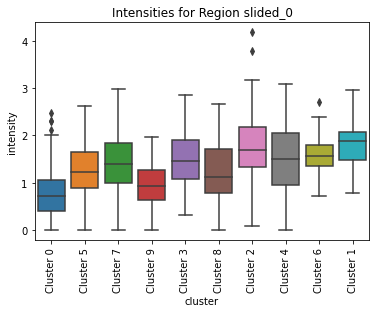

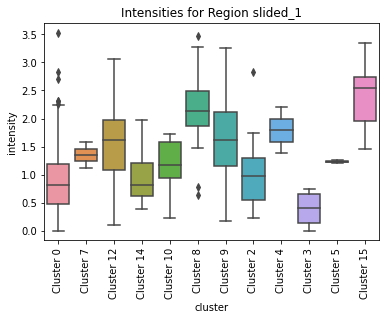

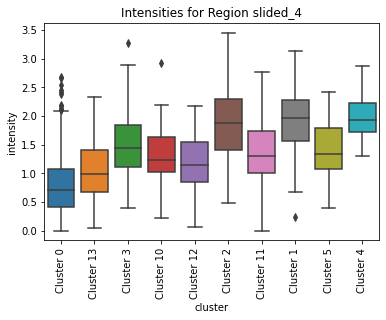

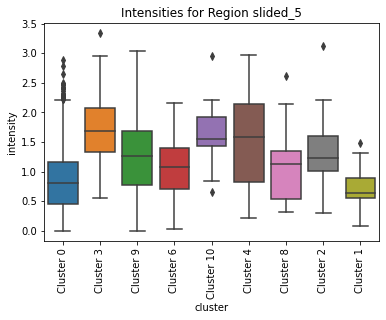

In [262]:
combSpec.mass_intensity(14109, scaled=True)

In [340]:
relgenes = set()
for descr, deGenes in [('outer', myDFGenes_outer), ('all', myDFGenes_all), ('inner', myDFGenes_inner)]:
    
    print(descr, "atheroGenes", deGenes.intersection(atheroGenes))
    print(descr, "inflammationGenes", deGenes.intersection(inflammationGenes))
    
    relgenes = relgenes.union(deGenes.intersection(atheroGenes))
    relgenes = relgenes.union(deGenes.intersection(inflammationGenes))

outer atheroGenes {'ALOX5AP', 'LEP', 'APOE'}
outer inflammationGenes {'LEP', 'NDUFC2', 'APOE', 'MSMP', 'CCL4', 'PLA2G2E', 'GHRL', 'ALOX5AP', 'HAMP', 'CALCA'}
all atheroGenes {'ALOX5AP', 'LEP'}
all inflammationGenes {'LEP', 'NDUFC2', 'IL4', 'MSMP', 'CCL4', 'PLA2G2E', 'GHRL', 'ALOX5AP', 'HAMP', 'CALCA'}
inner atheroGenes {'ALOX5AP', 'APOC3', 'APOA5'}
inner inflammationGenes {'CCL6', 'CCL9', 'IGF1', 'CD24A', 'IL4', 'CCL1', 'CTSC', 'MSMP', 'HRH4', 'CCL4', 'PLA2G2E', 'TAC1', 'GHRL', 'ALOX5AP', 'CALCA'}


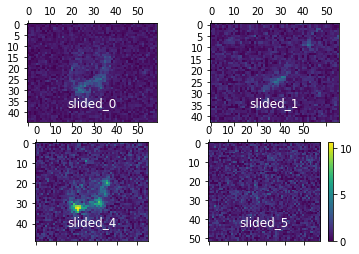

In [251]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl6"))

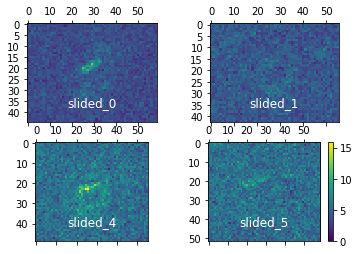

In [253]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Igf1"))

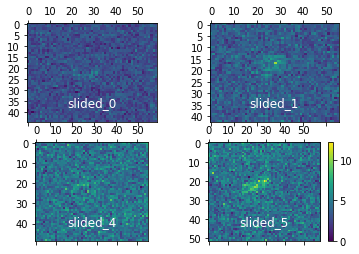

In [254]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl1"))

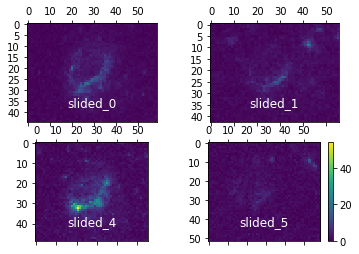

In [255]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl4"))

In [ ]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl25"))

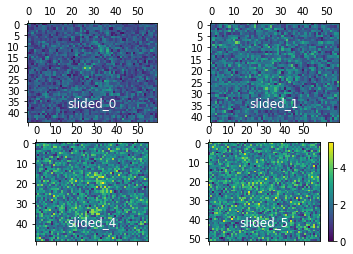

In [243]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl25"))

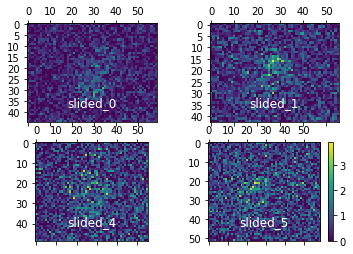

In [249]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Ccl9"))

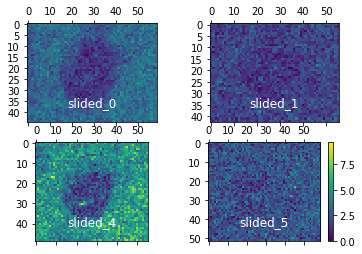

In [250]:
_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein("Alox5ap"))

ALOX5AP


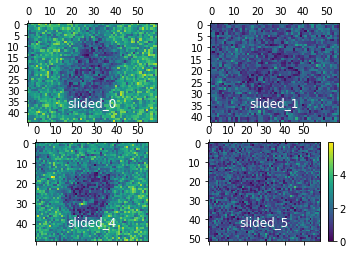

outer     clusterID              gene_ident    gene_mass     gene  protein_mass  \
387  slided_0  mass_8584_418203004148  8584.418203  Alox5ap     8587.0573   
389  slided_0  mass_8585_927336217472  8585.927336  Alox5ap     8587.0573   
391  slided_0  mass_8587_436469430797  8587.436469  Alox5ap     8587.0573   
394  slided_0  mass_8588_945602644122  8588.945603  Alox5ap     8587.0573   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
387  -1.264126  6.506938e-43  144   144  2.339953  2.316269     226      217   
389  -1.306904  8.663216e-44  144   144  2.167519  2.109372     226      224   
391  -1.316710  1.002728e-43  144   144  2.043376  2.000331     226      215   
394  -1.322773  1.283208e-42  144   144  1.910559  1.866453     226      215   

      mean_bg  median_bg  
387  0.974243   0.934020  
389  0.876084   0.840054  
391  0.820312   0.807191  
394  0.763776   0.713790  
inner     clusterID              gene_ident    gene_mass     gene  prote

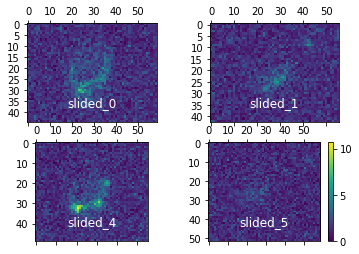

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner     clusterID               gene_ident     gene_mass   gene  protein_mass  \
689  slided_0  mass_12975_995853777718  12975.995854  Apoa5    12977.6348   
694  slided_0  mass_12977_504986991042  12977.504987  Apoa5    12977.6348   
697  slided_0  mass_12979_014120204367  12979.014120  Apoa5    12977.6348   
699  slided_0   mass_12980_52325341769  12980.523253  Apoa5    12977.6348   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
689  -0.688913  1.127627e-10  170   170  1.522289  1.289111     105      104   
694  -0.685220  1.310783e-10  170   170  1.490492  1.282755     105      104   
697  -0.682145  1.224063e-10  170   170  1.457372  1.338783     105      105   
699  -0.690951  3.809076e-11  170   170  1.390619  1.295350     105      103   

      mean_bg  median_bg  
689

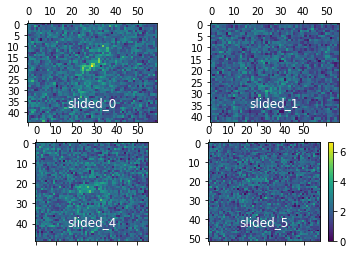

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass   gene  protein_mass  \
1050  slided_0  mass_15161_220746671233  15161.220747  Apoc3    15162.8542   
1054  slided_0  mass_15162_729879884557  15162.729880  Apoc3    15162.8542   
1057  slided_0  mass_15164_239013097882  15164.239013  Apoc3    15162.8542   
1059  slided_0  mass_15165_748146311205  15165.748146  Apoc3    15162.8542   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1050  -0.554369  3.426229e-09  170   170  1.743144  1.555694     105      104   
1054  -0.546391  1.014404e-08  170   170  1.750429  1.577329     105      105   
1057  -0.531809  2.020764e-08  170   170  1.776105  1.556437     105      105   
1059  -0.516555  4.007192e-08  170   170  1.799177  1.603383     105      105   

       mean_bg  medi

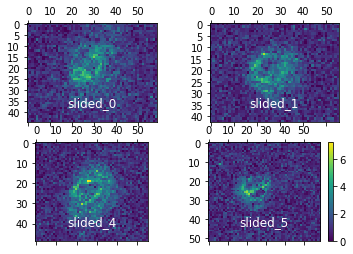

outer     clusterID              gene_ident    gene_mass  gene  protein_mass  \
248  slided_0  mass_8320_319890672405  8320.319891  Apoe     8322.2202   
249  slided_0   mass_8321_82902388573  8321.829024  Apoe     8322.2202   
250  slided_0  mass_8323_338157099053  8323.338157  Apoe     8322.2202   
251  slided_0  mass_8324_847290312377  8324.847290  Apoe     8322.2202   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
248   0.796871  9.367610e-29  144   143  1.168134  1.106316     226      226   
249   0.956483  1.174877e-39  144   144  1.294582  1.272676     226      226   
250   1.120973  1.484730e-47  144   142  1.379993  1.355328     226      226   
251   1.248783  3.386248e-52  144   144  1.389944  1.276985     226      226   

      mean_bg  median_bg  
248  2.029433   1.967156  
249  2.512231   2.455951  
250  3.001397   2.883319  
251  3.303076   3.084786  
inner Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, a

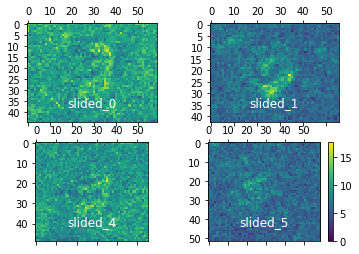

outer     clusterID              gene_ident    gene_mass   gene  protein_mass  \
334  slided_0  mass_8548_199005884366  8548.199006  Calca     8549.8001   
339  slided_0  mass_8549_708139097691  8549.708139  Calca     8549.8001   
341  slided_0  mass_8551_217272311014  8551.217272  Calca     8549.8001   
344  slided_0   mass_8552_72640552434  8552.726406  Calca     8549.8001   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
334  -1.273282  4.097453e-58  144   144  3.804649  3.666708     226      226   
339  -1.231817  1.507235e-56  144   144  3.978130  3.898052     226      226   
341  -1.217445  1.502573e-55  144   144  4.069568  4.003571     226      226   
344  -1.259619  3.813024e-57  144   144  4.175975  4.111205     226      226   

      mean_bg  median_bg  
334  1.574049   1.487674  
339  1.693811   1.653862  
341  1.750092   1.669279  
344  1.744114   1.664831  
inner     clusterID              gene_ident    gene_mass   gene  protein_mass  \
3

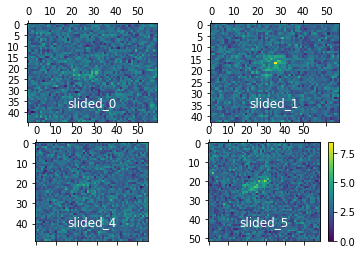

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner     clusterID               gene_ident     gene_mass  gene  protein_mass  \
633  slided_0  mass_10274_647401927308  10274.647402  Ccl1    10276.2139   
638  slided_0  mass_10276_156535140633  10276.156535  Ccl1    10276.2139   
642  slided_0  mass_10277_665668353959  10277.665668  Ccl1    10276.2139   
643  slided_0  mass_10279_174801567282  10279.174802  Ccl1    10276.2139   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
633   0.625654  3.157646e-16  170   170  1.642036  1.621348     105      105   
638   0.626838  1.818902e-16  170   170  1.621333  1.603961     105      105   
642   0.619899  5.866359e-16  170   170  1.561570  1.559694     105      105   
643   0.607263  1.900390e-15  170   170  1.481347  1.536484     105      105   

      mean_bg  median_bg  
633  2.5

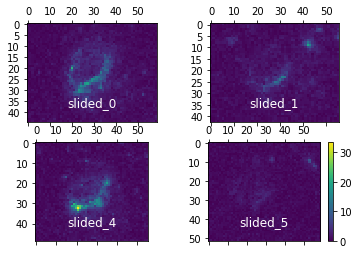

outer     clusterID               gene_ident     gene_mass  gene  protein_mass  \
745  slided_0   mass_10169_00807699461  10169.008077  Ccl4    10167.7164   
748  slided_0  mass_10170_517210207936  10170.517210  Ccl4    10167.7164   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
745   0.511604  8.335756e-07  144   144  1.830176  1.759693     226      226   
748   0.535208  4.847055e-08  144   144  1.574439  1.542799     226      226   

      mean_bg  median_bg  
745  2.609163   2.025145  
748  2.281600   1.812508  
inner     clusterID               gene_ident     gene_mass  gene  protein_mass  \
596  slided_0  mass_10165_989810567964  10165.989811  Ccl4    10167.7164   
600  slided_0  mass_10167_498943781287  10167.498944  Ccl4    10167.7164   
604  slided_0   mass_10169_00807699461  10169.008077  Ccl4    10167.7164   
607  slided_0  mass_10170_517210207936  10170.517210  Ccl4    10167.7164   

     avg_logFC        qvalue  num  anum      mean    med

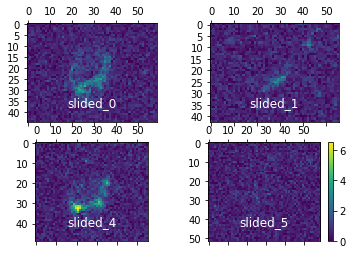

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner     clusterID               gene_ident     gene_mass  gene  protein_mass  \
701  slided_0  mass_12982_032386631015  12982.032387  Ccl6     12983.868   
704  slided_0  mass_12983_541519844339  12983.541520  Ccl6     12983.868   
707  slided_0  mass_12985_050653057664  12985.050653  Ccl6     12983.868   
710  slided_0  mass_12986_559786270987  12986.559786  Ccl6     12983.868   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
701  -0.685562  3.604728e-11  170   170  1.318364  1.245011     105      102   
704  -0.655948  1.198657e-10  170   170  1.281670  1.194758     105      103   
707  -0.616208  1.300493e-09  170   170  1.235710  1.129089     105      104   
710  -0.563968  4.124520e-08  170   169  1.160621  1.083548     105      104   

      mean_bg  median_bg  
701  0.8

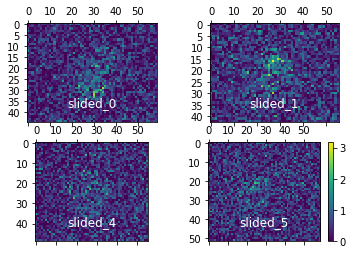

outer      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1022  slided_0   mass_13867_89358285235  13867.893583  Ccl9    13870.7528   
1024  slided_0  mass_13869_402716065675  13869.402716  Ccl9    13870.7528   
1026  slided_0  mass_13870_911849278998  13870.911849  Ccl9    13870.7528   
1028  slided_0  mass_13872_420982492324  13872.420982  Ccl9    13870.7528   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1022   0.754773  1.217692e-10  144   129  0.533836  0.497594     226      213   
1024   0.846901  8.342802e-11  144   128  0.442122  0.428585     226      208   
1026   0.843742  2.334464e-09  144   122  0.388656  0.312468     226      206   
1028   0.739392  4.844713e-07  144   124  0.368965  0.280957     226      207   

       mean_bg  median_bg  
1022  0.900777   0.829128  
1024  0.795216   0.687533  
1026  0.697521   0.582658  
1028  0.615977   0.500408  
inner     clusterID               gene_ident     gene_mass  ge

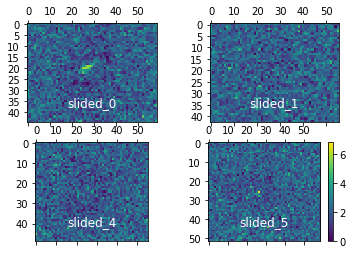

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner     clusterID              gene_ident    gene_mass   gene  protein_mass  \
181  slided_0  mass_7799_668932075538  7799.668932  Cd24a     7797.0207   

     avg_logFC    qvalue  num  anum      mean    median  num_bg  anum_bg  \
181  -0.563144  0.000353  170   168  1.575967  1.266537     105       97   

      mean_bg  median_bg  
181  1.066655   0.975583  
all Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
CTSC


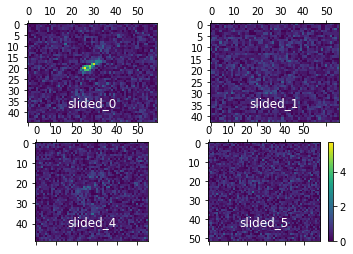

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1154  slided_0   mass_15561_14104820216  15561.141048  Ctsc    15561.8383   
1160  slided_0  mass_15562_650181415484  15562.650181  Ctsc    15561.8383   
1166  slided_0  mass_15564_159314628809  15564.159315  Ctsc    15561.8383   

      avg_logFC    qvalue  num  anum      mean    median  num_bg  anum_bg  \
1154  -0.518305  0.016815  170   159  0.904039  0.573887     105      104   
1160  -0.613834  0.003770  170   162  0.951948  0.603191     105      103   
1166  -0.736359  0.000596  170   161  0.995506  0.612978     105      102   

       mean_bg  median_bg  
1154  0.631193   0.610850  
1160  0.622058   0.604939  
1166  0.597555   0.591120  
all Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg

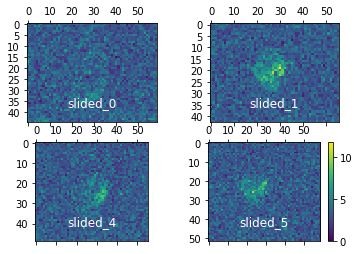

outer     clusterID              gene_ident    gene_mass  gene  protein_mass  \
406  slided_0  mass_8613_091734057309  8613.091734  Ghrl     8614.9029   
409  slided_0  mass_8614_600867270634  8614.600867  Ghrl     8614.9029   
411  slided_0  mass_8616_110000483957  8616.110000  Ghrl     8614.9029   
412  slided_0   mass_8617_61913369728  8617.619134  Ghrl     8614.9029   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
406   0.543307  8.491044e-07  144   139  0.731615  0.641949     226      221   
409   0.824511  1.823595e-13  144   140  0.742099  0.663679     226      224   
411   1.097812  2.786588e-20  144   137  0.732711  0.656705     226      224   
412   1.346932  5.727107e-26  144   137  0.691370  0.633926     226      224   

      mean_bg  median_bg  
406  1.066189   0.927904  
409  1.314209   1.162337  
411  1.568221   1.358182  
412  1.758642   1.482160  
inner     clusterID              gene_ident    gene_mass  gene  protein_mass  \
83   sl

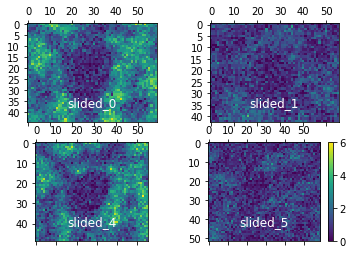

outer     clusterID              gene_ident    gene_mass  gene  protein_mass  \
564  slided_0  mass_9349_548742159543  9349.548742  Hamp     9351.9534   
566  slided_0  mass_9351_057875372868  9351.057875  Hamp     9351.9534   
569  slided_0  mass_9352_567008586193  9352.567009  Hamp     9351.9534   
572  slided_0  mass_9354_076141799516  9354.076142  Hamp     9351.9534   

     avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
564  -1.043491  2.362862e-19  144   144  1.758266  1.685693     226      222   
566  -1.077648  3.761369e-20  144   144  1.840906  1.750992     226      224   
569  -1.019985  1.346495e-19  144   143  1.897128  1.776262     226      226   
572  -0.924149  1.909008e-17  144   144  1.867894  1.720382     226      223   

      mean_bg  median_bg  
564  0.853026   0.794075  
566  0.872222   0.788041  
569  0.935514   0.848285  
572  0.984364   0.906984  
inner Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, a

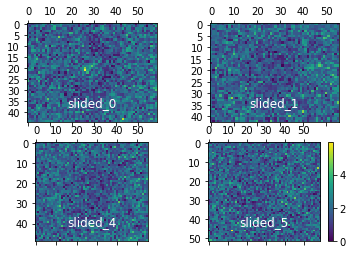

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1375  slided_0    mass_15781_4744973475  15781.474497  Hrh4    15783.1757   
1379  slided_0  mass_15782_983630560824  15782.983631  Hrh4    15783.1757   
1383  slided_0   mass_15784_49276377415  15784.492764  Hrh4    15783.1757   
1387  slided_0  mass_15786_001896987473  15786.001897  Hrh4    15783.1757   

      avg_logFC    qvalue  num  anum      mean    median  num_bg  anum_bg  \
1375  -0.761657  0.000003  170   168  0.761512  0.598501     105       96   
1379  -0.801534  0.000002  170   164  0.759867  0.593980     105       97   
1383  -0.752126  0.000008  170   159  0.760279  0.607209     105       97   
1387  -0.683298  0.000030  170   157  0.736947  0.610385     105      101   

       mean_bg  median_bg  
1375  0.449154   

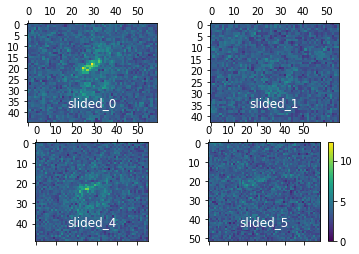

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1095  slided_0  mass_15194_421677364367  15194.421677  Igf1    15196.5068   
1100  slided_0   mass_15195_93081057769  15195.930811  Igf1    15196.5068   
1104  slided_0  mass_15197_439943791014  15197.439944  Igf1    15196.5068   
1108  slided_0   mass_15198_94907700434  15198.949077  Igf1    15196.5068   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1095  -0.857234  2.499994e-16  170   170  3.136527  2.555633     105      104   
1100  -0.786968  1.476567e-15  170   170  3.097523  2.569574     105      104   
1104  -0.732650  2.927230e-15  170   170  3.114684  2.586379     105      105   
1108  -0.712086  2.942744e-15  170   170  3.138162  2.618913     105      105   

       mean_bg  median_bg

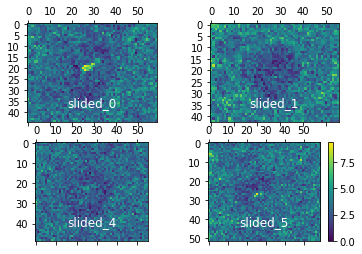

outer      clusterID               gene_ident     gene_mass gene  protein_mass  \
1360  slided_0  mass_15831_275893387201  15831.275893  Il4    15833.3743   
1363  slided_0  mass_15832_785026600524  15832.785027  Il4    15833.3743   
1367  slided_0   mass_15834_29415981385  15834.294160  Il4    15833.3743   
1371  slided_0  mass_15835_803293027173  15835.803293  Il4    15833.3743   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1360  -0.859694  3.352517e-30  144   144  2.104716  2.012963     226      225   
1363  -0.877297  8.664506e-32  144   144  2.228297  2.121577     226      225   
1367  -0.892751  6.968801e-33  144   144  2.332847  2.224490     226      225   
1371  -0.902129  5.806051e-34  144   144  2.441703  2.346080     226      225   

       mean_bg  median_bg  
1360  1.159845   1.148549  
1363  1.213054   1.204778  
1367  1.256439   1.268735  
1371  1.306547   1.284734  
inner      clusterID               gene_ident     gene_mass gene  p

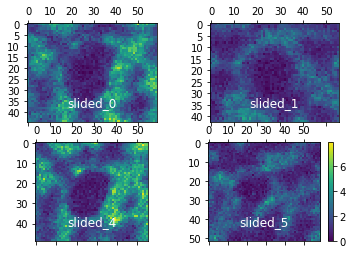

outer      clusterID               gene_ident     gene_mass gene  protein_mass  \
1680  slided_0  mass_18706_174664769896  18706.174665  Lep    18708.4055   
1684  slided_0   mass_18707_68379798322  18707.683798  Lep    18708.4055   
1688  slided_0  mass_18709_192931196547  18709.192931  Lep    18708.4055   
1691  slided_0   mass_18710_70206440987  18710.702064  Lep    18708.4055   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1680  -1.539416  2.094822e-35  144   144  2.921796  2.774181     226      226   
1684  -1.481874  2.651772e-34  144   144  2.797599  2.672751     226      225   
1688  -1.427271  2.692942e-33  144   144  2.659702  2.477178     226      224   
1691  -1.387460  2.886085e-32  144   144  2.499544  2.300837     226      223   

       mean_bg  median_bg  
1680  1.005171   0.913760  
1684  1.001606   0.913279  
1688  0.988967   0.906331  
1691  0.955419   0.900971  
inner Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, g

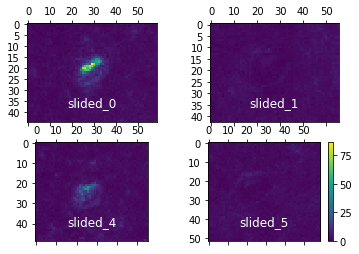

outer      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1250  slided_0  mass_14978_615627858999  14978.615628  Msmp    14981.0579   
1253  slided_0  mass_14980_124761072322  14980.124761  Msmp    14981.0579   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1250  -0.600081  5.925703e-20  144   144  3.313025  3.155271     226      226   
1253  -0.531925  2.965505e-16  144   144  3.356317  3.227828     226      226   

       mean_bg  median_bg  
1250  2.185659   2.016197  
1253  2.321333   2.116522  
inner     clusterID               gene_ident     gene_mass  gene  protein_mass  \
915  slided_0  mass_14978_615627858999  14978.615628  Msmp    14981.0579   
918  slided_0  mass_14980_124761072322  14980.124761  Msmp    14981.0579   
921  slided_0  mass_14981_633894285647  14981.633894  Msmp    14981.0579   
923  slided_0   mass_14983_14302749897  14983.143027  Msmp    14981.0579   

     avg_logFC        qvalue  num  anum       m

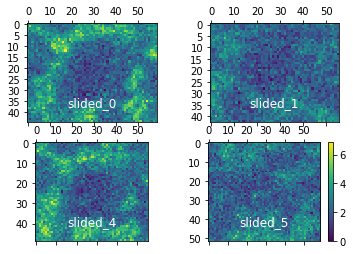

outer      clusterID               gene_ident     gene_mass    gene  protein_mass  \
1131  slided_0  mass_14160_665426237254  14160.665426  Ndufc2     14163.511   
1133  slided_0   mass_14162_17455945058  14162.174559  Ndufc2     14163.511   
1135  slided_0  mass_14163_683692663903  14163.683693  Ndufc2     14163.511   
1136  slided_0  mass_14165_192825877228  14165.192826  Ndufc2     14163.511   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1131  -1.114072  3.148815e-31  144   144  2.126684  1.986769     226      220   
1133  -1.115971  5.181907e-33  144   144  2.400263  2.314656     226      220   
1135  -1.073054  3.644495e-32  144   144  2.502398  2.427581     226      223   
1136  -1.016134  1.153412e-30  144   144  2.530405  2.474334     226      223   

       mean_bg  median_bg  
1131  0.982503   0.972060  
1133  1.107435   1.098001  
1135  1.189419   1.209072  
1136  1.251132   1.274362  
inner Empty DataFrame
Columns: [clusterID, gene_iden

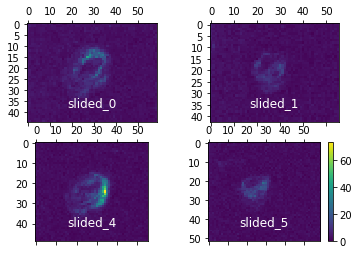

outer     clusterID              gene_ident    gene_mass     gene  protein_mass  \
262  slided_0  mass_8424_450082391777  8424.450082  Pla2g2e     8426.7026   

     avg_logFC    qvalue  num  anum      mean   median  num_bg  anum_bg  \
262   0.552448  0.000002  144   144  2.295329  2.14626     226      225   

      mean_bg  median_bg  
262  3.366265   2.475907  
inner     clusterID              gene_ident    gene_mass     gene  protein_mass  \
263  slided_0  mass_8424_450082391777  8424.450082  Pla2g2e     8426.7026   
265  slided_0  mass_8425_959215605102  8425.959216  Pla2g2e     8426.7026   
268  slided_0  mass_8427_468348818427  8427.468349  Pla2g2e     8426.7026   
271  slided_0   mass_8428_97748203175  8428.977482  Pla2g2e     8426.7026   

     avg_logFC        qvalue  num  anum       mean    median  num_bg  anum_bg  \
263  -0.586311  2.290212e-05  170   170  11.327798  8.797023     105      105   
265  -0.598616  1.357089e-05  170   170   9.356941  7.167438     105      105   

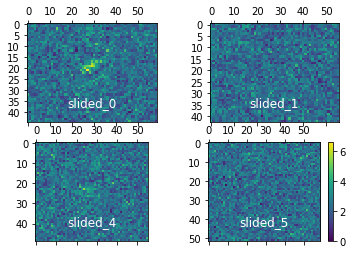

outer Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, protein_mass, avg_logFC, qvalue, num, anum, mean, median, num_bg, anum_bg, mean_bg, median_bg]
Index: []
inner      clusterID               gene_ident     gene_mass  gene  protein_mass  \
1016  slided_0  mass_15043_508356031942  15043.508356  Tac1    15045.0157   
1018  slided_0  mass_15045_017489245265  15045.017489  Tac1    15045.0157   
1020  slided_0   mass_15046_52662245859  15046.526622  Tac1    15045.0157   

      avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
1016  -0.741525  3.261137e-11  170   170  1.434702  1.204358     105      105   
1018  -0.664057  5.351463e-10  170   170  1.428148  1.216188     105      105   
1020  -0.574275  1.601943e-08  170   170  1.421035  1.214097     105      104   

       mean_bg  median_bg  
1016  0.858105   0.800741  
1018  0.901306   0.875430  
1020  0.954401   1.018198  
all Empty DataFrame
Columns: [clusterID, gene_ident, gene_mass, gene, p

In [344]:
for gene in sorted(relgenes):
    
    print(gene)
    #_ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein(gene.capitalize()), scaled=False)
    _ = combSpec.mass_heatmap(pw_theo.get_masses_for_protein(gene.capitalize()), scaled=True)
    
    for rde, rdf in [('outer', mydf), ("inner", mydf_inner), ("all", mydf_all)]:
        print(rde, rdf.loc[rdf.gene == gene.capitalize()])

In [309]:
mydf_all.loc[mydf_all.gene_ident == 'mass_8427_468348818427']

clusterID              gene_ident    gene_mass        gene  protein_mass  \
87  slided_0  mass_8427_468348818427  8427.468349  AC140267.1     8428.7164   
88  slided_0  mass_8427_468348818427  8427.468349        Emc8     8429.9975   
89  slided_0  mass_8427_468348818427  8427.468349     Pla2g2e     8426.7026   

    avg_logFC        qvalue  num  anum      mean    median  num_bg  anum_bg  \
87  -0.511214  2.830754e-11  725   725  5.338555  3.925932     365      362   
88  -0.511214  2.830754e-11  725   725  5.338555  3.925932     365      362   
89  -0.511214  2.830754e-11  725   725  5.338555  3.925932     365      362   

     mean_bg  median_bg  
87  3.745702   2.776078  
88  3.745702   2.776078  
89  3.745702   2.776078

In [334]:
"CCL4" in atheroGenes

False

In [337]:
myDFGenes_outer = set([str(x).upper() for x in mydf_outer["gene"]])

In [338]:
mydf_outer_athero = myDFGenes_outer.intersection(atheroGenes)

In [339]:
len(mydf_outer_athero)
mydf_outer_athero

{'ALOX5AP', 'APOE', 'LEP'}

In [336]:
myDFGenes = set([str(x).upper() for x in mydf["gene"]])

In [230]:
mydf_athero = myDFGenes.intersection(atheroGenes)

In [231]:
len(mydf_athero)

5

In [232]:
myDFGenes_inner = set([str(x).upper() for x in mydf_inner["gene"]])

In [233]:
mydf_inner_athero = myDFGenes_inner.intersection(atheroGenes)

In [234]:
len(mydf_inner_athero)

3

In [209]:
myDFGenes_all = set([str(x).upper() for x in mydf_all["gene"]])

In [235]:
mydf_all_athero = myDFGenes.intersection(atheroGenes)

In [236]:
len(mydf_all_athero)

5

In [238]:
mydf_athero.union(mydf_inner_athero).union(mydf_all_athero)

{'ALOX5AP', 'APOA5', 'APOC3', 'APOE', 'CST3', 'LEP', 'NPY'}